In [1]:
import gymnasium as gym
from gymnasium.wrappers import TimeLimit
import mani_skill.envs
from stable_baselines3 import DQN
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_checker import check_env
from mani_skill.utils import gym_utils
from mani_skill.utils.wrappers.record import RecordEpisode
from mani_skill.vector.wrappers.sb3 import ManiSkillSB3VectorEnv
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio
import time

SEED = 17
NUM_ENVS = 8
total_timesteps = 200000

In [2]:
env = gym.make("CartPole-v1", render_mode = "rgb_array")
states, _ = env.reset()
check_env(env, warn = True)
eval_env = gym.make("CartPole-v1", render_mode = "rgb_array")

In [3]:
# function for running the dqn network

# dqn_model = DQN(policy = "MlpPolicy", buffer_size = 10000, tau = 1.0, target_update_interval = 1000, env = env, learning_rate = 1e-3, 
# batch_size = 64, gamma = .99, exploration_fraction = .1, learning_starts = 1000, verbose = 1, exploration_final_eps = .01)
# dqn_model.learn(total_timesteps = total_timesteps, progress_bar = True)
# dqn_model.save("dqn_cartpole")

def run_dqn(policy = "MlpPolicy", env = None, learning_rate = 1e-3, gamma = .99, save_file_name = "", iterations = 10):
    dqn_model = DQN(policy = policy, buffer_size = 10000, tau = 1.0, target_update_interval = 1000, env = env, learning_rate = learning_rate, 
    batch_size = 64, gamma = gamma, exploration_fraction = .1, learning_starts = 1000, verbose = 1, exploration_final_eps = .01)

    start_time = time.time()
    dqn_model.learn(total_timesteps = iterations, progress_bar = True)
    end_time = time.time()

    dqn_model.save(save_file_name)
    elapsed_time = end_time - start_time

    return elapsed_time

In [4]:
def get_total_reward(model_name, eval_env, iterations = 10):

    model = DQN.load(model_name)
    total_rewards_list = []

    for _ in range(iterations):
        obs, _ = eval_env.reset()
        done = False
        total_reward = 0
        truncated = False

        while not done:
            action, _states = model.predict(obs, deterministic = True)
            obs, reward, done, truncated, info = eval_env.step(action)
            total_reward += reward
            
            if truncated:
                break

        total_rewards_list.append(total_reward/500)
        print(f"Iteration: {_}\nTotal Rewards {total_reward}")
    
    return total_rewards_list

In [5]:
def record_video(model = None, env = None, video_name = None):
    print("Recording a video...")
    video_frames = []
    obs, _ = env.reset()
    done = False

    while not done:
        frame = eval_env.render()
        video_frames.append(frame)
        action, _ = model.predict(obs, deterministic = True)
        obs, reward, done, truncated, info = env.step(action)
        if truncated:
            break

    env.close()

    # save the video
    os.makedirs("videos", exist_ok = True)
    video_path = os.path.join("videos", f"{video_name}.mp4")
    imageio.mimsave(video_path, video_frames, fps = 30)
    print(f"Video saved to {video_path}")

In [6]:
####################################
# Run the Tests
####################################

iterations = [100000, 200000]
learning_rate = [1e-2, 1e-3, 1e-4]
gamma = [.99]

# time_0_0 = run_dqn(env = env, learning_rate = learning_rate[0], gamma = .99, save_file_name = "dqn_0_0", iterations = iterations[0])
time_0_1 = run_dqn(env = env, learning_rate = learning_rate[0], gamma = .99, save_file_name = "dqn_0_1", iterations = iterations[1])
# time_1_0 = run_dqn(env = env, learning_rate = learning_rate[1], gamma = .99, save_file_name = "dqn_1_0", iterations = iterations[0])
# time_1_1 = run_dqn(env = env, learning_rate = learning_rate[1], gamma = .99, save_file_name = "dqn_1_1", iterations = iterations[1])
# time_2_0 = run_dqn(env = env, learning_rate = learning_rate[2], gamma = .99, save_file_name = "dqn_2_0", iterations = iterations[0])
time_2_1 = run_dqn(env = env, learning_rate = learning_rate[2], gamma = .99, save_file_name = "dqn_2_1", iterations = iterations[1])

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Output()

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.2     |
|    ep_rew_mean      | 35.2     |
|    exploration_rate | 0.993    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4493     |
|    time_elapsed     | 0        |
|    total_timesteps  | 141      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 26.4     |
|    exploration_rate | 0.99     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5544     |
|    time_elapsed     | 0        |
|    total_timesteps  | 211      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.2     |
|    ep_rew_mean      | 25.2     |
|    exploration_rate | 0.985    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.948    |
| time/               |          |
|    episodes         | 48       |
|    fps              | 567      |
|    time_elapsed     | 1        |
|    total_timesteps  | 1059     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0472   |
|    n_updates        | 14       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.94     |
| time/               |          |
|    episodes         | 52       |
|    fps              | 616      |
|    time_elapsed     | 1        |
|    total_timesteps  | 1203     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00188  |
|    n_updates        | 50       |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.936    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 646      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1294     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0005   |
|    n_updates        | 73       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.932    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 668      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1369     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000732 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.929    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 688      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1436     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000145 |
|    n_updates        | 108      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.925    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 709      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1508     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000266 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 759      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1695     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000459 |
|    n_updates        | 173      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.912    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 768      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1772     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000337 |
|    n_updates        | 192      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.909    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 778      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1831     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000265 |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.904    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 802      |
|    time_elapsed     | 2        |
|    total_timesteps  | 1946     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.000343 |
|    n_updates        | 236      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.9      |
| time/               |          |
|    episodes         | 96       |
|    fps              | 819      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2026     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0424   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.891    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 855      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2209     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0166   |
|    n_updates        | 302      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.886    |
| time/               |          |
|    episodes         | 104      |
|    fps              | 872      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2303     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00915  |
|    n_updates        | 325      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.881    |
| time/               |          |
|    episodes         | 108      |
|    fps              | 892      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2407     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00865  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.876    |
| time/               |          |
|    episodes         | 112      |
|    fps              | 907      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2499     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0101   |
|    n_updates        | 374      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.871    |
| time/               |          |
|    episodes         | 116      |
|    fps              | 924      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2596     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0219   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.868    |
| time/               |          |
|    episodes         | 120      |
|    fps              | 934      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2666     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0291   |
|    n_updates        | 416      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.865    |
| time/               |          |
|    episodes         | 124      |
|    fps              | 943      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2718     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00899  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.862    |
| time/               |          |
|    episodes         | 128      |
|    fps              | 953      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2791     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00553  |
|    n_updates        | 447      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.857    |
| time/               |          |
|    episodes         | 132      |
|    fps              | 968      |
|    time_elapsed     | 2        |
|    total_timesteps  | 2889     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0136   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes         | 136      |
|    fps              | 988      |
|    time_elapsed     | 3        |
|    total_timesteps  | 3028     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0242   |
|    n_updates        | 506      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.847    |
| time/               |          |
|    episodes         | 140      |
|    fps              | 994      |
|    time_elapsed     | 3        |
|    total_timesteps  | 3082     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0144   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.844    |
| time/               |          |
|    episodes         | 144      |
|    fps              | 1003     |
|    time_elapsed     | 3        |
|    total_timesteps  | 3155     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0323   |
|    n_updates        | 538      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.835    |
| time/               |          |
|    episodes         | 148      |
|    fps              | 1024     |
|    time_elapsed     | 3        |
|    total_timesteps  | 3324     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0279   |
|    n_updates        | 580      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.829    |
| time/               |          |
|    episodes         | 152      |
|    fps              | 1039     |
|    time_elapsed     | 3        |
|    total_timesteps  | 3457     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0241   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.824    |
| time/               |          |
|    episodes         | 156      |
|    fps              | 1049     |
|    time_elapsed     | 3        |
|    total_timesteps  | 3553     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00987  |
|    n_updates        | 638      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.819    |
| time/               |          |
|    episodes         | 160      |
|    fps              | 1060     |
|    time_elapsed     | 3        |
|    total_timesteps  | 3656     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0316   |
|    n_updates        | 663      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.816    |
| time/               |          |
|    episodes         | 164      |
|    fps              | 1067     |
|    time_elapsed     | 3        |
|    total_timesteps  | 3723     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0248   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.807    |
| time/               |          |
|    episodes         | 172      |
|    fps              | 1083     |
|    time_elapsed     | 3        |
|    total_timesteps  | 3894     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0235   |
|    n_updates        | 723      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.802    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 1093     |
|    time_elapsed     | 3        |
|    total_timesteps  | 4003     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.475    |
|    n_updates        | 750      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.799    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 1098     |
|    time_elapsed     | 3        |
|    total_timesteps  | 4062     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0307   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.793    |
| time/               |          |
|    episodes         | 188      |
|    fps              | 1107     |
|    time_elapsed     | 3        |
|    total_timesteps  | 4174     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0775   |
|    n_updates        | 793      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.786    |
| time/               |          |
|    episodes         | 192      |
|    fps              | 1120     |
|    time_elapsed     | 3        |
|    total_timesteps  | 4319     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.015    |
|    n_updates        | 829      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.1     |
|    ep_rew_mean      | 24.1     |
|    exploration_rate | 0.78     |
| time/               |          |
|    episodes         | 196      |
|    fps              | 1130     |
|    time_elapsed     | 3        |
|    total_timesteps  | 4440     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0415   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23       |
|    ep_rew_mean      | 23       |
|    exploration_rate | 0.777    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 1133     |
|    time_elapsed     | 3        |
|    total_timesteps  | 4509     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00707  |
|    n_updates        | 877      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.772    |
| time/               |          |
|    episodes         | 204      |
|    fps              | 1141     |
|    time_elapsed     | 4        |
|    total_timesteps  | 4608     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0101   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.767    |
| time/               |          |
|    episodes         | 208      |
|    fps              | 1148     |
|    time_elapsed     | 4        |
|    total_timesteps  | 4717     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0143   |
|    n_updates        | 929      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.761    |
| time/               |          |
|    episodes         | 212      |
|    fps              | 1156     |
|    time_elapsed     | 4        |
|    total_timesteps  | 4824     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0474   |
|    n_updates        | 955      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 1162     |
|    time_elapsed     | 4        |
|    total_timesteps  | 4919     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0144   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.752    |
| time/               |          |
|    episodes         | 220      |
|    fps              | 1130     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5015     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.306    |
|    n_updates        | 1003     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.8     |
|    ep_rew_mean      | 24.8     |
|    exploration_rate | 0.743    |
| time/               |          |
|    episodes         | 224      |
|    fps              | 1142     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5198     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0383   |
|    n_updates        | 1049     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | 25       |
|    exploration_rate | 0.738    |
| time/               |          |
|    episodes         | 228      |
|    fps              | 1147     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5289     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0156   |
|    n_updates        | 1072     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.1     |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes         | 232      |
|    fps              | 1155     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5402     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0214   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.5     |
|    ep_rew_mean      | 24.5     |
|    exploration_rate | 0.729    |
| time/               |          |
|    episodes         | 236      |
|    fps              | 1159     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5482     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0121   |
|    n_updates        | 1120     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.4     |
|    ep_rew_mean      | 25.4     |
|    exploration_rate | 0.722    |
| time/               |          |
|    episodes         | 240      |
|    fps              | 1167     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5620     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00482  |
|    n_updates        | 1154     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.6     |
|    ep_rew_mean      | 25.6     |
|    exploration_rate | 0.717    |
| time/               |          |
|    episodes         | 244      |
|    fps              | 1172     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5711     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0217   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.712    |
| time/               |          |
|    episodes         | 248      |
|    fps              | 1177     |
|    time_elapsed     | 4        |
|    total_timesteps  | 5819     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00485  |
|    n_updates        | 1204     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.7     |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.707    |
| time/               |          |
|    episodes         | 252      |
|    fps              | 1182     |
|    time_elapsed     | 5        |
|    total_timesteps  | 5923     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.025    |
|    n_updates        | 1230     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | 25       |
|    exploration_rate | 0.7      |
| time/               |          |
|    episodes         | 256      |
|    fps              | 1189     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6051     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.122    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | 25       |
|    exploration_rate | 0.695    |
| time/               |          |
|    episodes         | 260      |
|    fps              | 1193     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6157     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0115   |
|    n_updates        | 1289     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.8     |
|    ep_rew_mean      | 25.8     |
|    exploration_rate | 0.688    |
| time/               |          |
|    episodes         | 264      |
|    fps              | 1200     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6299     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0688   |
|    n_updates        | 1324     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.683    |
| time/               |          |
|    episodes         | 268      |
|    fps              | 1204     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6409     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0486   |
|    n_updates        | 1352     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.3     |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.677    |
| time/               |          |
|    episodes         | 272      |
|    fps              | 1197     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6520     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0698   |
|    n_updates        | 1379     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.2     |
|    ep_rew_mean      | 26.2     |
|    exploration_rate | 0.672    |
| time/               |          |
|    episodes         | 276      |
|    fps              | 1201     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6619     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0271   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.3     |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.669    |
| time/               |          |
|    episodes         | 280      |
|    fps              | 1203     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6688     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.014    |
|    n_updates        | 1421     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.3     |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.666    |
| time/               |          |
|    episodes         | 284      |
|    fps              | 1206     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6752     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00982  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.659    |
| time/               |          |
|    episodes         | 288      |
|    fps              | 1210     |
|    time_elapsed     | 5        |
|    total_timesteps  | 6891     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0253   |
|    n_updates        | 1472     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.9     |
|    ep_rew_mean      | 26.9     |
|    exploration_rate | 0.653    |
| time/               |          |
|    episodes         | 292      |
|    fps              | 1214     |
|    time_elapsed     | 5        |
|    total_timesteps  | 7010     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.107    |
|    n_updates        | 1502     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.8     |
|    ep_rew_mean      | 26.8     |
|    exploration_rate | 0.648    |
| time/               |          |
|    episodes         | 296      |
|    fps              | 1218     |
|    time_elapsed     | 5        |
|    total_timesteps  | 7118     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0915   |
|    n_updates        | 1529     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.642    |
| time/               |          |
|    episodes         | 300      |
|    fps              | 1222     |
|    time_elapsed     | 5        |
|    total_timesteps  | 7225     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0909   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.635    |
| time/               |          |
|    episodes         | 304      |
|    fps              | 1226     |
|    time_elapsed     | 6        |
|    total_timesteps  | 7364     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.102    |
|    n_updates        | 1590     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.9     |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.628    |
| time/               |          |
|    episodes         | 308      |
|    fps              | 1231     |
|    time_elapsed     | 6        |
|    total_timesteps  | 7509     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0163   |
|    n_updates        | 1627     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes         | 312      |
|    fps              | 1232     |
|    time_elapsed     | 6        |
|    total_timesteps  | 7593     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0188   |
|    n_updates        | 1648     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.62     |
| time/               |          |
|    episodes         | 316      |
|    fps              | 1235     |
|    time_elapsed     | 6        |
|    total_timesteps  | 7685     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0375   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.614    |
| time/               |          |
|    episodes         | 320      |
|    fps              | 1232     |
|    time_elapsed     | 6        |
|    total_timesteps  | 7789     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00749  |
|    n_updates        | 1697     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.609    |
| time/               |          |
|    episodes         | 324      |
|    fps              | 1221     |
|    time_elapsed     | 6        |
|    total_timesteps  | 7908     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0277   |
|    n_updates        | 1726     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.9     |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.6      |
| time/               |          |
|    episodes         | 328      |
|    fps              | 1220     |
|    time_elapsed     | 6        |
|    total_timesteps  | 8077     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.263    |
|    n_updates        | 1769     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.596    |
| time/               |          |
|    episodes         | 332      |
|    fps              | 1215     |
|    time_elapsed     | 6        |
|    total_timesteps  | 8168     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0567   |
|    n_updates        | 1791     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.9     |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.59     |
| time/               |          |
|    episodes         | 336      |
|    fps              | 1218     |
|    time_elapsed     | 6        |
|    total_timesteps  | 8274     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0159   |
|    n_updates        | 1818     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.585    |
| time/               |          |
|    episodes         | 340      |
|    fps              | 1220     |
|    time_elapsed     | 6        |
|    total_timesteps  | 8387     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.027    |
|    n_updates        | 1846     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28       |
|    ep_rew_mean      | 28       |
|    exploration_rate | 0.579    |
| time/               |          |
|    episodes         | 344      |
|    fps              | 1224     |
|    time_elapsed     | 6        |
|    total_timesteps  | 8507     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0267   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.575    |
| time/               |          |
|    episodes         | 348      |
|    fps              | 1225     |
|    time_elapsed     | 7        |
|    total_timesteps  | 8584     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0184   |
|    n_updates        | 1895     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.9     |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.569    |
| time/               |          |
|    episodes         | 352      |
|    fps              | 1228     |
|    time_elapsed     | 7        |
|    total_timesteps  | 8715     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0212   |
|    n_updates        | 1928     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.561    |
| time/               |          |
|    episodes         | 356      |
|    fps              | 1231     |
|    time_elapsed     | 7        |
|    total_timesteps  | 8864     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0288   |
|    n_updates        | 1965     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.5     |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.554    |
| time/               |          |
|    episodes         | 360      |
|    fps              | 1234     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9007     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.157    |
|    n_updates        | 2001     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.1     |
|    ep_rew_mean      | 29.1     |
|    exploration_rate | 0.544    |
| time/               |          |
|    episodes         | 364      |
|    fps              | 1232     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9204     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0448   |
|    n_updates        | 2050     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29       |
|    ep_rew_mean      | 29       |
|    exploration_rate | 0.539    |
| time/               |          |
|    episodes         | 368      |
|    fps              | 1233     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9312     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.124    |
|    n_updates        | 2077     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.1     |
|    ep_rew_mean      | 29.1     |
|    exploration_rate | 0.533    |
| time/               |          |
|    episodes         | 372      |
|    fps              | 1235     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9425     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0191   |
|    n_updates        | 2106     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.8     |
|    ep_rew_mean      | 28.8     |
|    exploration_rate | 0.53     |
| time/               |          |
|    episodes         | 376      |
|    fps              | 1237     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9498     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0357   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.9     |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.526    |
| time/               |          |
|    episodes         | 380      |
|    fps              | 1238     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9573     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0203   |
|    n_updates        | 2143     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.1     |
|    ep_rew_mean      | 29.1     |
|    exploration_rate | 0.522    |
| time/               |          |
|    episodes         | 384      |
|    fps              | 1239     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9657     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0179   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.4     |
|    ep_rew_mean      | 28.4     |
|    exploration_rate | 0.518    |
| time/               |          |
|    episodes         | 388      |
|    fps              | 1241     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9728     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.116    |
|    n_updates        | 2181     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.2     |
|    ep_rew_mean      | 28.2     |
|    exploration_rate | 0.513    |
| time/               |          |
|    episodes         | 392      |
|    fps              | 1242     |
|    time_elapsed     | 7        |
|    total_timesteps  | 9835     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0622   |
|    n_updates        | 2208     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.6     |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.506    |
| time/               |          |
|    episodes         | 396      |
|    fps              | 1245     |
|    time_elapsed     | 8        |
|    total_timesteps  | 9975     |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0569   |
|    n_updates        | 2243     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.502    |
| time/               |          |
|    episodes         | 400      |
|    fps              | 1246     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10054    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.119    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.496    |
| time/               |          |
|    episodes         | 404      |
|    fps              | 1248     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10191    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.137    |
|    n_updates        | 2297     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.5     |
|    ep_rew_mean      | 27.5     |
|    exploration_rate | 0.492    |
| time/               |          |
|    episodes         | 408      |
|    fps              | 1249     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10262    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0452   |
|    n_updates        | 2315     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.487    |
| time/               |          |
|    episodes         | 412      |
|    fps              | 1251     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10354    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.107    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.48     |
| time/               |          |
|    episodes         | 416      |
|    fps              | 1252     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10513    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.052    |
|    n_updates        | 2378     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.475    |
| time/               |          |
|    episodes         | 420      |
|    fps              | 1254     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10604    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0441   |
|    n_updates        | 2400     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.4     |
|    ep_rew_mean      | 28.4     |
|    exploration_rate | 0.468    |
| time/               |          |
|    episodes         | 424      |
|    fps              | 1255     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10749    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.134    |
|    n_updates        | 2437     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.463    |
| time/               |          |
|    episodes         | 428      |
|    fps              | 1257     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10842    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0262   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28       |
|    ep_rew_mean      | 28       |
|    exploration_rate | 0.457    |
| time/               |          |
|    episodes         | 432      |
|    fps              | 1259     |
|    time_elapsed     | 8        |
|    total_timesteps  | 10972    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.019    |
|    n_updates        | 2492     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.8     |
|    ep_rew_mean      | 27.8     |
|    exploration_rate | 0.453    |
| time/               |          |
|    episodes         | 436      |
|    fps              | 1260     |
|    time_elapsed     | 8        |
|    total_timesteps  | 11052    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0669   |
|    n_updates        | 2512     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.445    |
| time/               |          |
|    episodes         | 440      |
|    fps              | 1262     |
|    time_elapsed     | 8        |
|    total_timesteps  | 11218    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.214    |
|    n_updates        | 2554     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.7     |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.437    |
| time/               |          |
|    episodes         | 444      |
|    fps              | 1264     |
|    time_elapsed     | 8        |
|    total_timesteps  | 11374    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0252   |
|    n_updates        | 2593     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.1     |
|    ep_rew_mean      | 29.1     |
|    exploration_rate | 0.431    |
| time/               |          |
|    episodes         | 448      |
|    fps              | 1265     |
|    time_elapsed     | 9        |
|    total_timesteps  | 11495    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.125    |
|    n_updates        | 2623     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.6     |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.427    |
| time/               |          |
|    episodes         | 452      |
|    fps              | 1266     |
|    time_elapsed     | 9        |
|    total_timesteps  | 11573    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0403   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.9     |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.418    |
| time/               |          |
|    episodes         | 456      |
|    fps              | 1268     |
|    time_elapsed     | 9        |
|    total_timesteps  | 11756    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0621   |
|    n_updates        | 2688     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.7     |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.412    |
| time/               |          |
|    episodes         | 460      |
|    fps              | 1269     |
|    time_elapsed     | 9        |
|    total_timesteps  | 11878    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0476   |
|    n_updates        | 2719     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.2     |
|    ep_rew_mean      | 28.2     |
|    exploration_rate | 0.405    |
| time/               |          |
|    episodes         | 464      |
|    fps              | 1269     |
|    time_elapsed     | 9        |
|    total_timesteps  | 12027    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.428    |
|    n_updates        | 2756     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.4      |
| time/               |          |
|    episodes         | 468      |
|    fps              | 1270     |
|    time_elapsed     | 9        |
|    total_timesteps  | 12122    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0735   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.5     |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.392    |
| time/               |          |
|    episodes         | 472      |
|    fps              | 1272     |
|    time_elapsed     | 9        |
|    total_timesteps  | 12279    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0265   |
|    n_updates        | 2819     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.1     |
|    ep_rew_mean      | 29.1     |
|    exploration_rate | 0.386    |
| time/               |          |
|    episodes         | 476      |
|    fps              | 1272     |
|    time_elapsed     | 9        |
|    total_timesteps  | 12410    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0533   |
|    n_updates        | 2852     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.7     |
|    ep_rew_mean      | 29.7     |
|    exploration_rate | 0.379    |
| time/               |          |
|    episodes         | 480      |
|    fps              | 1273     |
|    time_elapsed     | 9        |
|    total_timesteps  | 12539    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0511   |
|    n_updates        | 2884     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.9     |
|    ep_rew_mean      | 29.9     |
|    exploration_rate | 0.374    |
| time/               |          |
|    episodes         | 484      |
|    fps              | 1273     |
|    time_elapsed     | 9        |
|    total_timesteps  | 12649    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0933   |
|    n_updates        | 2912     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30       |
|    ep_rew_mean      | 30       |
|    exploration_rate | 0.37     |
| time/               |          |
|    episodes         | 488      |
|    fps              | 1274     |
|    time_elapsed     | 9        |
|    total_timesteps  | 12731    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0357   |
|    n_updates        | 2932     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.4     |
|    ep_rew_mean      | 30.4     |
|    exploration_rate | 0.363    |
| time/               |          |
|    episodes         | 492      |
|    fps              | 1274     |
|    time_elapsed     | 10       |
|    total_timesteps  | 12875    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.126    |
|    n_updates        | 2968     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.8     |
|    ep_rew_mean      | 30.8     |
|    exploration_rate | 0.354    |
| time/               |          |
|    episodes         | 496      |
|    fps              | 1275     |
|    time_elapsed     | 10       |
|    total_timesteps  | 13057    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0783   |
|    n_updates        | 3014     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.2     |
|    ep_rew_mean      | 31.2     |
|    exploration_rate | 0.348    |
| time/               |          |
|    episodes         | 500      |
|    fps              | 1276     |
|    time_elapsed     | 10       |
|    total_timesteps  | 13175    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0379   |
|    n_updates        | 3043     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.9     |
|    ep_rew_mean      | 31.9     |
|    exploration_rate | 0.338    |
| time/               |          |
|    episodes         | 504      |
|    fps              | 1276     |
|    time_elapsed     | 10       |
|    total_timesteps  | 13377    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0756   |
|    n_updates        | 3094     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.4     |
|    ep_rew_mean      | 32.4     |
|    exploration_rate | 0.332    |
| time/               |          |
|    episodes         | 508      |
|    fps              | 1276     |
|    time_elapsed     | 10       |
|    total_timesteps  | 13504    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0473   |
|    n_updates        | 3125     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.9     |
|    ep_rew_mean      | 33.9     |
|    exploration_rate | 0.32     |
| time/               |          |
|    episodes         | 512      |
|    fps              | 1277     |
|    time_elapsed     | 10       |
|    total_timesteps  | 13742    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.244    |
|    n_updates        | 3185     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.6     |
|    ep_rew_mean      | 33.6     |
|    exploration_rate | 0.313    |
| time/               |          |
|    episodes         | 516      |
|    fps              | 1277     |
|    time_elapsed     | 10       |
|    total_timesteps  | 13869    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0837   |
|    n_updates        | 3217     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.8     |
|    ep_rew_mean      | 33.8     |
|    exploration_rate | 0.308    |
| time/               |          |
|    episodes         | 520      |
|    fps              | 1278     |
|    time_elapsed     | 10       |
|    total_timesteps  | 13984    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0357   |
|    n_updates        | 3245     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.9     |
|    ep_rew_mean      | 32.9     |
|    exploration_rate | 0.305    |
| time/               |          |
|    episodes         | 524      |
|    fps              | 1278     |
|    time_elapsed     | 10       |
|    total_timesteps  | 14041    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.202    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.1     |
|    ep_rew_mean      | 34.1     |
|    exploration_rate | 0.295    |
| time/               |          |
|    episodes         | 528      |
|    fps              | 1278     |
|    time_elapsed     | 11       |
|    total_timesteps  | 14251    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0299   |
|    n_updates        | 3312     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.1     |
|    ep_rew_mean      | 34.1     |
|    exploration_rate | 0.288    |
| time/               |          |
|    episodes         | 532      |
|    fps              | 1278     |
|    time_elapsed     | 11       |
|    total_timesteps  | 14381    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0878   |
|    n_updates        | 3345     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.1     |
|    ep_rew_mean      | 35.1     |
|    exploration_rate | 0.279    |
| time/               |          |
|    episodes         | 536      |
|    fps              | 1279     |
|    time_elapsed     | 11       |
|    total_timesteps  | 14561    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0229   |
|    n_updates        | 3390     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.3     |
|    ep_rew_mean      | 35.3     |
|    exploration_rate | 0.27     |
| time/               |          |
|    episodes         | 540      |
|    fps              | 1279     |
|    time_elapsed     | 11       |
|    total_timesteps  | 14752    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.175    |
|    n_updates        | 3437     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.1     |
|    ep_rew_mean      | 36.1     |
|    exploration_rate | 0.258    |
| time/               |          |
|    episodes         | 544      |
|    fps              | 1279     |
|    time_elapsed     | 11       |
|    total_timesteps  | 14987    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.232    |
|    n_updates        | 3496     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.4     |
|    ep_rew_mean      | 37.4     |
|    exploration_rate | 0.246    |
| time/               |          |
|    episodes         | 548      |
|    fps              | 1279     |
|    time_elapsed     | 11       |
|    total_timesteps  | 15232    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0537   |
|    n_updates        | 3557     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.7     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.241    |
| time/               |          |
|    episodes         | 552      |
|    fps              | 1280     |
|    time_elapsed     | 11       |
|    total_timesteps  | 15342    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.244    |
|    n_updates        | 3585     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.1     |
|    ep_rew_mean      | 38.1     |
|    exploration_rate | 0.229    |
| time/               |          |
|    episodes         | 556      |
|    fps              | 1280     |
|    time_elapsed     | 12       |
|    total_timesteps  | 15570    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0355   |
|    n_updates        | 3642     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.222    |
| time/               |          |
|    episodes         | 560      |
|    fps              | 1280     |
|    time_elapsed     | 12       |
|    total_timesteps  | 15727    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0232   |
|    n_updates        | 3681     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.9     |
|    ep_rew_mean      | 38.9     |
|    exploration_rate | 0.212    |
| time/               |          |
|    episodes         | 564      |
|    fps              | 1280     |
|    time_elapsed     | 12       |
|    total_timesteps  | 15921    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.534    |
|    n_updates        | 3730     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.4     |
|    ep_rew_mean      | 39.4     |
|    exploration_rate | 0.205    |
| time/               |          |
|    episodes         | 568      |
|    fps              | 1280     |
|    time_elapsed     | 12       |
|    total_timesteps  | 16061    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.667    |
|    n_updates        | 3765     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 40       |
|    exploration_rate | 0.194    |
| time/               |          |
|    episodes         | 572      |
|    fps              | 1279     |
|    time_elapsed     | 12       |
|    total_timesteps  | 16279    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0443   |
|    n_updates        | 3819     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.1     |
|    ep_rew_mean      | 41.1     |
|    exploration_rate | 0.182    |
| time/               |          |
|    episodes         | 576      |
|    fps              | 1279     |
|    time_elapsed     | 12       |
|    total_timesteps  | 16520    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.318    |
|    n_updates        | 3879     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.2     |
|    ep_rew_mean      | 43.2     |
|    exploration_rate | 0.165    |
| time/               |          |
|    episodes         | 580      |
|    fps              | 1278     |
|    time_elapsed     | 13       |
|    total_timesteps  | 16859    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0255   |
|    n_updates        | 3964     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.7     |
|    ep_rew_mean      | 43.7     |
|    exploration_rate | 0.157    |
| time/               |          |
|    episodes         | 584      |
|    fps              | 1278     |
|    time_elapsed     | 13       |
|    total_timesteps  | 17023    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0627   |
|    n_updates        | 4005     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.4     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.14     |
| time/               |          |
|    episodes         | 588      |
|    fps              | 1277     |
|    time_elapsed     | 13       |
|    total_timesteps  | 17372    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.171    |
|    n_updates        | 4092     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.6     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.132    |
| time/               |          |
|    episodes         | 592      |
|    fps              | 1277     |
|    time_elapsed     | 13       |
|    total_timesteps  | 17539    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.245    |
|    n_updates        | 4134     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.111    |
| time/               |          |
|    episodes         | 596      |
|    fps              | 1276     |
|    time_elapsed     | 14       |
|    total_timesteps  | 17954    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.283    |
|    n_updates        | 4238     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.4     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.103    |
| time/               |          |
|    episodes         | 600      |
|    fps              | 1276     |
|    time_elapsed     | 14       |
|    total_timesteps  | 18115    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0593   |
|    n_updates        | 4278     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.9     |
|    ep_rew_mean      | 51.9     |
|    exploration_rate | 0.0807   |
| time/               |          |
|    episodes         | 604      |
|    fps              | 1275     |
|    time_elapsed     | 14       |
|    total_timesteps  | 18571    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.359    |
|    n_updates        | 4392     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.9     |
|    ep_rew_mean      | 53.9     |
|    exploration_rate | 0.0646   |
| time/               |          |
|    episodes         | 608      |
|    fps              | 1273     |
|    time_elapsed     | 14       |
|    total_timesteps  | 18896    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.117    |
|    n_updates        | 4473     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.3     |
|    ep_rew_mean      | 56.3     |
|    exploration_rate | 0.041    |
| time/               |          |
|    episodes         | 612      |
|    fps              | 1271     |
|    time_elapsed     | 15       |
|    total_timesteps  | 19373    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.451    |
|    n_updates        | 4593     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.5     |
|    ep_rew_mean      | 58.5     |
|    exploration_rate | 0.024    |
| time/               |          |
|    episodes         | 616      |
|    fps              | 1270     |
|    time_elapsed     | 15       |
|    total_timesteps  | 19718    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.236    |
|    n_updates        | 4679     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.2     |
|    ep_rew_mean      | 62.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 620      |
|    fps              | 1268     |
|    time_elapsed     | 15       |
|    total_timesteps  | 20209    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0811   |
|    n_updates        | 4802     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.9     |
|    ep_rew_mean      | 65.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 624      |
|    fps              | 1266     |
|    time_elapsed     | 16       |
|    total_timesteps  | 20634    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.297    |
|    n_updates        | 4908     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.4     |
|    ep_rew_mean      | 68.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 628      |
|    fps              | 1264     |
|    time_elapsed     | 16       |
|    total_timesteps  | 21091    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.402    |
|    n_updates        | 5022     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.7     |
|    ep_rew_mean      | 69.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 632      |
|    fps              | 1263     |
|    time_elapsed     | 16       |
|    total_timesteps  | 21351    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0643   |
|    n_updates        | 5087     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.5     |
|    ep_rew_mean      | 71.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 636      |
|    fps              | 1261     |
|    time_elapsed     | 17       |
|    total_timesteps  | 21707    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.157    |
|    n_updates        | 5176     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.1     |
|    ep_rew_mean      | 74.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 640      |
|    fps              | 1260     |
|    time_elapsed     | 17       |
|    total_timesteps  | 22162    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0141   |
|    n_updates        | 5290     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77       |
|    ep_rew_mean      | 77       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 644      |
|    fps              | 1258     |
|    time_elapsed     | 18       |
|    total_timesteps  | 22690    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.354    |
|    n_updates        | 5422     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.2     |
|    ep_rew_mean      | 80.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 1256     |
|    time_elapsed     | 18       |
|    total_timesteps  | 23250    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0207   |
|    n_updates        | 5562     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81       |
|    ep_rew_mean      | 81       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 652      |
|    fps              | 1256     |
|    time_elapsed     | 18       |
|    total_timesteps  | 23440    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0712   |
|    n_updates        | 5609     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.9     |
|    ep_rew_mean      | 85.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 656      |
|    fps              | 1253     |
|    time_elapsed     | 19       |
|    total_timesteps  | 24160    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0363   |
|    n_updates        | 5789     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.7     |
|    ep_rew_mean      | 87.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 660      |
|    fps              | 1251     |
|    time_elapsed     | 19       |
|    total_timesteps  | 24492    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.222    |
|    n_updates        | 5872     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.6     |
|    ep_rew_mean      | 88.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 664      |
|    fps              | 1244     |
|    time_elapsed     | 19       |
|    total_timesteps  | 24781    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0511   |
|    n_updates        | 5945     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | 91.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 668      |
|    fps              | 1240     |
|    time_elapsed     | 20       |
|    total_timesteps  | 25252    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.401    |
|    n_updates        | 6062     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92       |
|    ep_rew_mean      | 92       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 672      |
|    fps              | 1240     |
|    time_elapsed     | 20       |
|    total_timesteps  | 25484    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.747    |
|    n_updates        | 6120     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.7     |
|    ep_rew_mean      | 94.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 676      |
|    fps              | 1238     |
|    time_elapsed     | 20       |
|    total_timesteps  | 25994    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.416    |
|    n_updates        | 6248     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | 91.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 680      |
|    fps              | 1238     |
|    time_elapsed     | 21       |
|    total_timesteps  | 26052    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.104    |
|    n_updates        | 6262     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.9     |
|    ep_rew_mean      | 90.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 684      |
|    fps              | 1238     |
|    time_elapsed     | 21       |
|    total_timesteps  | 26109    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0761   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.3     |
|    ep_rew_mean      | 88.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 688      |
|    fps              | 1238     |
|    time_elapsed     | 21       |
|    total_timesteps  | 26205    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.879    |
|    n_updates        | 6301     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.6     |
|    ep_rew_mean      | 88.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 692      |
|    fps              | 1237     |
|    time_elapsed     | 21       |
|    total_timesteps  | 26397    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.118    |
|    n_updates        | 6349     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.1     |
|    ep_rew_mean      | 86.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 696      |
|    fps              | 1237     |
|    time_elapsed     | 21       |
|    total_timesteps  | 26560    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0169   |
|    n_updates        | 6389     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.4     |
|    ep_rew_mean      | 86.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 700      |
|    fps              | 1237     |
|    time_elapsed     | 21       |
|    total_timesteps  | 26751    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.865    |
|    n_updates        | 6437     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.6     |
|    ep_rew_mean      | 83.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 1236     |
|    time_elapsed     | 21       |
|    total_timesteps  | 26932    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.379    |
|    n_updates        | 6482     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.2     |
|    ep_rew_mean      | 81.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 708      |
|    fps              | 1236     |
|    time_elapsed     | 21       |
|    total_timesteps  | 27012    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.269    |
|    n_updates        | 6502     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.4     |
|    ep_rew_mean      | 80.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 712      |
|    fps              | 1234     |
|    time_elapsed     | 22       |
|    total_timesteps  | 27409    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.984    |
|    n_updates        | 6602     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80       |
|    ep_rew_mean      | 80       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 716      |
|    fps              | 1234     |
|    time_elapsed     | 22       |
|    total_timesteps  | 27719    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.11     |
|    n_updates        | 6679     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.1     |
|    ep_rew_mean      | 76.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 720      |
|    fps              | 1234     |
|    time_elapsed     | 22       |
|    total_timesteps  | 27815    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.394    |
|    n_updates        | 6703     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.5     |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 724      |
|    fps              | 1233     |
|    time_elapsed     | 22       |
|    total_timesteps  | 27979    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0176   |
|    n_updates        | 6744     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.9     |
|    ep_rew_mean      | 69.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 728      |
|    fps              | 1233     |
|    time_elapsed     | 22       |
|    total_timesteps  | 28080    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.459    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.5     |
|    ep_rew_mean      | 72.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 732      |
|    fps              | 1232     |
|    time_elapsed     | 23       |
|    total_timesteps  | 28602    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.398    |
|    n_updates        | 6900     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.9     |
|    ep_rew_mean      | 70.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 736      |
|    fps              | 1232     |
|    time_elapsed     | 23       |
|    total_timesteps  | 28799    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0148   |
|    n_updates        | 6949     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.9     |
|    ep_rew_mean      | 67.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 740      |
|    fps              | 1231     |
|    time_elapsed     | 23       |
|    total_timesteps  | 28950    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.768    |
|    n_updates        | 6987     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.7     |
|    ep_rew_mean      | 63.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 744      |
|    fps              | 1231     |
|    time_elapsed     | 23       |
|    total_timesteps  | 29056    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.479    |
|    n_updates        | 7013     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59.2     |
|    ep_rew_mean      | 59.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 748      |
|    fps              | 1231     |
|    time_elapsed     | 23       |
|    total_timesteps  | 29167    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0269   |
|    n_updates        | 7041     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.2     |
|    ep_rew_mean      | 58.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 752      |
|    fps              | 1231     |
|    time_elapsed     | 23       |
|    total_timesteps  | 29264    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.779    |
|    n_updates        | 7065     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52       |
|    ep_rew_mean      | 52       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 756      |
|    fps              | 1230     |
|    time_elapsed     | 23       |
|    total_timesteps  | 29357    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00597  |
|    n_updates        | 7089     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.4     |
|    ep_rew_mean      | 49.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 760      |
|    fps              | 1230     |
|    time_elapsed     | 23       |
|    total_timesteps  | 29429    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.801    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.2     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 764      |
|    fps              | 1230     |
|    time_elapsed     | 23       |
|    total_timesteps  | 29500    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00735  |
|    n_updates        | 7124     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.6     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 768      |
|    fps              | 1230     |
|    time_elapsed     | 24       |
|    total_timesteps  | 29617    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.395    |
|    n_updates        | 7154     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.1     |
|    ep_rew_mean      | 42.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 772      |
|    fps              | 1230     |
|    time_elapsed     | 24       |
|    total_timesteps  | 29691    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.809    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.1     |
|    ep_rew_mean      | 38.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 776      |
|    fps              | 1230     |
|    time_elapsed     | 24       |
|    total_timesteps  | 29803    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0485   |
|    n_updates        | 7200     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.4     |
|    ep_rew_mean      | 38.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 780      |
|    fps              | 1229     |
|    time_elapsed     | 24       |
|    total_timesteps  | 29894    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.397    |
|    n_updates        | 7223     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 784      |
|    fps              | 1229     |
|    time_elapsed     | 24       |
|    total_timesteps  | 29962    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0302   |
|    n_updates        | 7240     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.4     |
|    ep_rew_mean      | 38.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 788      |
|    fps              | 1229     |
|    time_elapsed     | 24       |
|    total_timesteps  | 30045    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.481    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.6     |
|    ep_rew_mean      | 37.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 792      |
|    fps              | 1229     |
|    time_elapsed     | 24       |
|    total_timesteps  | 30153    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.92     |
|    n_updates        | 7288     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.1     |
|    ep_rew_mean      | 37.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 796      |
|    fps              | 1229     |
|    time_elapsed     | 24       |
|    total_timesteps  | 30272    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.102    |
|    n_updates        | 7317     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.4     |
|    ep_rew_mean      | 36.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 800      |
|    fps              | 1229     |
|    time_elapsed     | 24       |
|    total_timesteps  | 30391    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.2      |
|    n_updates        | 7347     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.6     |
|    ep_rew_mean      | 35.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 804      |
|    fps              | 1228     |
|    time_elapsed     | 24       |
|    total_timesteps  | 30493    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0176   |
|    n_updates        | 7373     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.4     |
|    ep_rew_mean      | 35.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 808      |
|    fps              | 1228     |
|    time_elapsed     | 24       |
|    total_timesteps  | 30549    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.411    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.2     |
|    ep_rew_mean      | 32.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 812      |
|    fps              | 1228     |
|    time_elapsed     | 24       |
|    total_timesteps  | 30633    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0207   |
|    n_updates        | 7408     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.5     |
|    ep_rew_mean      | 31.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 816      |
|    fps              | 1228     |
|    time_elapsed     | 25       |
|    total_timesteps  | 30873    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.899    |
|    n_updates        | 7468     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.1     |
|    ep_rew_mean      | 34.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 820      |
|    fps              | 1227     |
|    time_elapsed     | 25       |
|    total_timesteps  | 31224    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.133    |
|    n_updates        | 7555     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.9     |
|    ep_rew_mean      | 32.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 824      |
|    fps              | 1227     |
|    time_elapsed     | 25       |
|    total_timesteps  | 31273    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.161    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.5     |
|    ep_rew_mean      | 34.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 828      |
|    fps              | 1227     |
|    time_elapsed     | 25       |
|    total_timesteps  | 31528    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.812    |
|    n_updates        | 7631     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.1     |
|    ep_rew_mean      | 31.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 832      |
|    fps              | 1226     |
|    time_elapsed     | 25       |
|    total_timesteps  | 31715    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.312    |
|    n_updates        | 7678     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.8     |
|    ep_rew_mean      | 33.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 836      |
|    fps              | 1226     |
|    time_elapsed     | 26       |
|    total_timesteps  | 32181    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0257   |
|    n_updates        | 7795     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.1     |
|    ep_rew_mean      | 34.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 840      |
|    fps              | 1225     |
|    time_elapsed     | 26       |
|    total_timesteps  | 32357    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.73     |
|    n_updates        | 7839     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.7     |
|    ep_rew_mean      | 35.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 844      |
|    fps              | 1225     |
|    time_elapsed     | 26       |
|    total_timesteps  | 32623    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.87     |
|    n_updates        | 7905     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.2     |
|    ep_rew_mean      | 36.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 848      |
|    fps              | 1225     |
|    time_elapsed     | 26       |
|    total_timesteps  | 32784    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0582   |
|    n_updates        | 7945     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.6     |
|    ep_rew_mean      | 36.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 852      |
|    fps              | 1224     |
|    time_elapsed     | 26       |
|    total_timesteps  | 32927    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.83     |
|    n_updates        | 7981     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.3     |
|    ep_rew_mean      | 38.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 856      |
|    fps              | 1224     |
|    time_elapsed     | 27       |
|    total_timesteps  | 33190    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0934   |
|    n_updates        | 8047     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.5     |
|    ep_rew_mean      | 40.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 1224     |
|    time_elapsed     | 27       |
|    total_timesteps  | 33482    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.323    |
|    n_updates        | 8120     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.3     |
|    ep_rew_mean      | 43.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 1223     |
|    time_elapsed     | 27       |
|    total_timesteps  | 33831    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0953   |
|    n_updates        | 8207     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.4     |
|    ep_rew_mean      | 45.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 868      |
|    fps              | 1223     |
|    time_elapsed     | 27       |
|    total_timesteps  | 34161    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.88     |
|    n_updates        | 8290     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52       |
|    ep_rew_mean      | 52       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 872      |
|    fps              | 1222     |
|    time_elapsed     | 28       |
|    total_timesteps  | 34893    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.57     |
|    n_updates        | 8473     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.7     |
|    ep_rew_mean      | 53.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 876      |
|    fps              | 1221     |
|    time_elapsed     | 28       |
|    total_timesteps  | 35171    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.117    |
|    n_updates        | 8542     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.2     |
|    ep_rew_mean      | 54.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 880      |
|    fps              | 1221     |
|    time_elapsed     | 28       |
|    total_timesteps  | 35313    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.594    |
|    n_updates        | 8578     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61       |
|    ep_rew_mean      | 61       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 884      |
|    fps              | 1220     |
|    time_elapsed     | 29       |
|    total_timesteps  | 36058    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.36     |
|    n_updates        | 8764     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.1     |
|    ep_rew_mean      | 64.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 888      |
|    fps              | 1220     |
|    time_elapsed     | 29       |
|    total_timesteps  | 36459    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.965    |
|    n_updates        | 8864     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.9     |
|    ep_rew_mean      | 71.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 892      |
|    fps              | 1219     |
|    time_elapsed     | 30       |
|    total_timesteps  | 37343    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.152    |
|    n_updates        | 9085     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.1     |
|    ep_rew_mean      | 73.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 896      |
|    fps              | 1219     |
|    time_elapsed     | 30       |
|    total_timesteps  | 37578    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0105   |
|    n_updates        | 9144     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.6     |
|    ep_rew_mean      | 74.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 900      |
|    fps              | 1218     |
|    time_elapsed     | 31       |
|    total_timesteps  | 37848    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.44     |
|    n_updates        | 9211     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77       |
|    ep_rew_mean      | 77       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 904      |
|    fps              | 1218     |
|    time_elapsed     | 31       |
|    total_timesteps  | 38198    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.06     |
|    n_updates        | 9299     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.9     |
|    ep_rew_mean      | 77.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 908      |
|    fps              | 1218     |
|    time_elapsed     | 31       |
|    total_timesteps  | 38340    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.544    |
|    n_updates        | 9334     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80       |
|    ep_rew_mean      | 80       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 912      |
|    fps              | 1218     |
|    time_elapsed     | 31       |
|    total_timesteps  | 38634    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.539    |
|    n_updates        | 9408     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79       |
|    ep_rew_mean      | 79       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 916      |
|    fps              | 1217     |
|    time_elapsed     | 31       |
|    total_timesteps  | 38777    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.463    |
|    n_updates        | 9444     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78       |
|    ep_rew_mean      | 78       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 920      |
|    fps              | 1217     |
|    time_elapsed     | 32       |
|    total_timesteps  | 39020    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.871    |
|    n_updates        | 9504     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.5     |
|    ep_rew_mean      | 78.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 924      |
|    fps              | 1217     |
|    time_elapsed     | 32       |
|    total_timesteps  | 39125    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0754   |
|    n_updates        | 9531     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77       |
|    ep_rew_mean      | 77       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 928      |
|    fps              | 1217     |
|    time_elapsed     | 32       |
|    total_timesteps  | 39231    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0155   |
|    n_updates        | 9557     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.2     |
|    ep_rew_mean      | 76.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 932      |
|    fps              | 1217     |
|    time_elapsed     | 32       |
|    total_timesteps  | 39333    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.928    |
|    n_updates        | 9583     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.3     |
|    ep_rew_mean      | 72.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 936      |
|    fps              | 1217     |
|    time_elapsed     | 32       |
|    total_timesteps  | 39409    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.03     |
|    n_updates        | 9602     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.7     |
|    ep_rew_mean      | 71.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 940      |
|    fps              | 1217     |
|    time_elapsed     | 32       |
|    total_timesteps  | 39528    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.12     |
|    n_updates        | 9631     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72       |
|    ep_rew_mean      | 72       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 944      |
|    fps              | 1215     |
|    time_elapsed     | 32       |
|    total_timesteps  | 39820    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0608   |
|    n_updates        | 9704     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.7     |
|    ep_rew_mean      | 71.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 948      |
|    fps              | 1207     |
|    time_elapsed     | 33       |
|    total_timesteps  | 39950    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.592    |
|    n_updates        | 9737     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.2     |
|    ep_rew_mean      | 71.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 952      |
|    fps              | 1206     |
|    time_elapsed     | 33       |
|    total_timesteps  | 40043    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0853   |
|    n_updates        | 9760     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.6     |
|    ep_rew_mean      | 70.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 956      |
|    fps              | 1205     |
|    time_elapsed     | 33       |
|    total_timesteps  | 40246    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0689   |
|    n_updates        | 9811     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.2     |
|    ep_rew_mean      | 69.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 960      |
|    fps              | 1204     |
|    time_elapsed     | 33       |
|    total_timesteps  | 40406    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.535    |
|    n_updates        | 9851     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.8     |
|    ep_rew_mean      | 67.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 964      |
|    fps              | 1204     |
|    time_elapsed     | 33       |
|    total_timesteps  | 40614    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0987   |
|    n_updates        | 9903     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.2     |
|    ep_rew_mean      | 67.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 968      |
|    fps              | 1204     |
|    time_elapsed     | 33       |
|    total_timesteps  | 40878    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.537    |
|    n_updates        | 9969     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.9     |
|    ep_rew_mean      | 60.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 1204     |
|    time_elapsed     | 34       |
|    total_timesteps  | 40986    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0507   |
|    n_updates        | 9996     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.1     |
|    ep_rew_mean      | 62.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 976      |
|    fps              | 1204     |
|    time_elapsed     | 34       |
|    total_timesteps  | 41382    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.581    |
|    n_updates        | 10095    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.5     |
|    ep_rew_mean      | 62.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 980      |
|    fps              | 1204     |
|    time_elapsed     | 34       |
|    total_timesteps  | 41568    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.016    |
|    n_updates        | 10141    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.6     |
|    ep_rew_mean      | 56.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 984      |
|    fps              | 1204     |
|    time_elapsed     | 34       |
|    total_timesteps  | 41714    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.521    |
|    n_updates        | 10178    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.2     |
|    ep_rew_mean      | 54.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 988      |
|    fps              | 1203     |
|    time_elapsed     | 34       |
|    total_timesteps  | 41884    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0726   |
|    n_updates        | 10220    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47       |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 992      |
|    fps              | 1203     |
|    time_elapsed     | 34       |
|    total_timesteps  | 42038    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0281   |
|    n_updates        | 10259    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.4     |
|    ep_rew_mean      | 50.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 996      |
|    fps              | 1203     |
|    time_elapsed     | 35       |
|    total_timesteps  | 42619    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.53     |
|    n_updates        | 10404    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.6     |
|    ep_rew_mean      | 53.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 1203     |
|    time_elapsed     | 35       |
|    total_timesteps  | 43206    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.53     |
|    n_updates        | 10551    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.7     |
|    ep_rew_mean      | 56.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1004     |
|    fps              | 1202     |
|    time_elapsed     | 36       |
|    total_timesteps  | 43869    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.574    |
|    n_updates        | 10717    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.2     |
|    ep_rew_mean      | 58.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1008     |
|    fps              | 1202     |
|    time_elapsed     | 36       |
|    total_timesteps  | 44157    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0301   |
|    n_updates        | 10789    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.5     |
|    ep_rew_mean      | 60.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1012     |
|    fps              | 1202     |
|    time_elapsed     | 37       |
|    total_timesteps  | 44687    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0327   |
|    n_updates        | 10921    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.2     |
|    ep_rew_mean      | 63.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1016     |
|    fps              | 1202     |
|    time_elapsed     | 37       |
|    total_timesteps  | 45096    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.551    |
|    n_updates        | 11023    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.6     |
|    ep_rew_mean      | 66.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1020     |
|    fps              | 1202     |
|    time_elapsed     | 37       |
|    total_timesteps  | 45682    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.12     |
|    n_updates        | 11170    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.4     |
|    ep_rew_mean      | 71.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1024     |
|    fps              | 1202     |
|    time_elapsed     | 38       |
|    total_timesteps  | 46266    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0433   |
|    n_updates        | 11316    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.7     |
|    ep_rew_mean      | 74.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1028     |
|    fps              | 1202     |
|    time_elapsed     | 38       |
|    total_timesteps  | 46696    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.06     |
|    n_updates        | 11423    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.6     |
|    ep_rew_mean      | 76.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1032     |
|    fps              | 1202     |
|    time_elapsed     | 39       |
|    total_timesteps  | 46990    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0742   |
|    n_updates        | 11497    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.3     |
|    ep_rew_mean      | 77.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1036     |
|    fps              | 1202     |
|    time_elapsed     | 39       |
|    total_timesteps  | 47140    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.88     |
|    n_updates        | 11534    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.9     |
|    ep_rew_mean      | 77.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1040     |
|    fps              | 1202     |
|    time_elapsed     | 39       |
|    total_timesteps  | 47321    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.496    |
|    n_updates        | 11580    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79       |
|    ep_rew_mean      | 79       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1044     |
|    fps              | 1202     |
|    time_elapsed     | 39       |
|    total_timesteps  | 47715    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0325   |
|    n_updates        | 11678    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.5     |
|    ep_rew_mean      | 80.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1048     |
|    fps              | 1202     |
|    time_elapsed     | 39       |
|    total_timesteps  | 48001    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.293    |
|    n_updates        | 11750    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.8     |
|    ep_rew_mean      | 82.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1052     |
|    fps              | 1201     |
|    time_elapsed     | 40       |
|    total_timesteps  | 48318    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.99     |
|    n_updates        | 11829    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.4     |
|    ep_rew_mean      | 85.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1056     |
|    fps              | 1201     |
|    time_elapsed     | 40       |
|    total_timesteps  | 48787    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.12     |
|    n_updates        | 11946    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.6     |
|    ep_rew_mean      | 87.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 1201     |
|    time_elapsed     | 40       |
|    total_timesteps  | 49169    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.527    |
|    n_updates        | 12042    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.8     |
|    ep_rew_mean      | 87.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1064     |
|    fps              | 1201     |
|    time_elapsed     | 41       |
|    total_timesteps  | 49395    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.13     |
|    n_updates        | 12098    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89       |
|    ep_rew_mean      | 89       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1068     |
|    fps              | 1201     |
|    time_elapsed     | 41       |
|    total_timesteps  | 49773    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.574    |
|    n_updates        | 12193    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.4     |
|    ep_rew_mean      | 90.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1072     |
|    fps              | 1201     |
|    time_elapsed     | 41       |
|    total_timesteps  | 50027    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.114    |
|    n_updates        | 12256    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.5     |
|    ep_rew_mean      | 89.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1076     |
|    fps              | 1201     |
|    time_elapsed     | 41       |
|    total_timesteps  | 50335    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.712    |
|    n_updates        | 12333    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.1     |
|    ep_rew_mean      | 90.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1080     |
|    fps              | 1201     |
|    time_elapsed     | 42       |
|    total_timesteps  | 50581    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0709   |
|    n_updates        | 12395    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92       |
|    ep_rew_mean      | 92       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1084     |
|    fps              | 1201     |
|    time_elapsed     | 42       |
|    total_timesteps  | 50914    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0421   |
|    n_updates        | 12478    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.9     |
|    ep_rew_mean      | 92.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1088     |
|    fps              | 1201     |
|    time_elapsed     | 42       |
|    total_timesteps  | 51170    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.563    |
|    n_updates        | 12542    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.4     |
|    ep_rew_mean      | 92.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1092     |
|    fps              | 1201     |
|    time_elapsed     | 42       |
|    total_timesteps  | 51276    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.049    |
|    n_updates        | 12568    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.5     |
|    ep_rew_mean      | 87.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1096     |
|    fps              | 1201     |
|    time_elapsed     | 42       |
|    total_timesteps  | 51369    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.6     |
|    ep_rew_mean      | 83.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1100     |
|    fps              | 1200     |
|    time_elapsed     | 42       |
|    total_timesteps  | 51562    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.37     |
|    n_updates        | 12640    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78       |
|    ep_rew_mean      | 78       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1104     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 51668    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.615    |
|    n_updates        | 12666    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.8     |
|    ep_rew_mean      | 75.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1108     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 51739    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.649    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.2     |
|    ep_rew_mean      | 73.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1112     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52007    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.661    |
|    n_updates        | 12751    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.2     |
|    ep_rew_mean      | 70.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1116     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52115    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.695    |
|    n_updates        | 12778    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.9     |
|    ep_rew_mean      | 65.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1120     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52271    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00707  |
|    n_updates        | 12817    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.9     |
|    ep_rew_mean      | 60.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1124     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52354    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.67     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.9     |
|    ep_rew_mean      | 57.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1128     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52486    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0173   |
|    n_updates        | 12871    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.8     |
|    ep_rew_mean      | 55.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1132     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52565    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00638  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.1     |
|    ep_rew_mean      | 55.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1136     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52654    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0185   |
|    n_updates        | 12913    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.6     |
|    ep_rew_mean      | 54.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1140     |
|    fps              | 1200     |
|    time_elapsed     | 43       |
|    total_timesteps  | 52778    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0149   |
|    n_updates        | 12944    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.4     |
|    ep_rew_mean      | 52.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1144     |
|    fps              | 1200     |
|    time_elapsed     | 44       |
|    total_timesteps  | 52954    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0735   |
|    n_updates        | 12988    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.6     |
|    ep_rew_mean      | 51.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1148     |
|    fps              | 1200     |
|    time_elapsed     | 44       |
|    total_timesteps  | 53165    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.632    |
|    n_updates        | 13041    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.6     |
|    ep_rew_mean      | 52.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1152     |
|    fps              | 1200     |
|    time_elapsed     | 44       |
|    total_timesteps  | 53580    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.215    |
|    n_updates        | 13144    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.7     |
|    ep_rew_mean      | 51.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1156     |
|    fps              | 1200     |
|    time_elapsed     | 44       |
|    total_timesteps  | 53961    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.665    |
|    n_updates        | 13240    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.6     |
|    ep_rew_mean      | 49.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1160     |
|    fps              | 1200     |
|    time_elapsed     | 45       |
|    total_timesteps  | 54127    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.4      |
|    n_updates        | 13281    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.3     |
|    ep_rew_mean      | 54.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1164     |
|    fps              | 1200     |
|    time_elapsed     | 45       |
|    total_timesteps  | 54825    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.722    |
|    n_updates        | 13456    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.9     |
|    ep_rew_mean      | 57.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1168     |
|    fps              | 1195     |
|    time_elapsed     | 46       |
|    total_timesteps  | 55559    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.49     |
|    n_updates        | 13639    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.8     |
|    ep_rew_mean      | 60.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1172     |
|    fps              | 1195     |
|    time_elapsed     | 46       |
|    total_timesteps  | 56106    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.11     |
|    n_updates        | 13776    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.8     |
|    ep_rew_mean      | 62.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1176     |
|    fps              | 1195     |
|    time_elapsed     | 47       |
|    total_timesteps  | 56614    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.88     |
|    n_updates        | 13903    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64       |
|    ep_rew_mean      | 64       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1180     |
|    fps              | 1195     |
|    time_elapsed     | 47       |
|    total_timesteps  | 56976    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.103    |
|    n_updates        | 13993    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.6     |
|    ep_rew_mean      | 64.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1184     |
|    fps              | 1195     |
|    time_elapsed     | 47       |
|    total_timesteps  | 57373    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.715    |
|    n_updates        | 14093    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.1     |
|    ep_rew_mean      | 66.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1188     |
|    fps              | 1195     |
|    time_elapsed     | 48       |
|    total_timesteps  | 57782    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0919   |
|    n_updates        | 14195    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.3     |
|    ep_rew_mean      | 71.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1192     |
|    fps              | 1195     |
|    time_elapsed     | 48       |
|    total_timesteps  | 58411    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.964    |
|    n_updates        | 14352    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77       |
|    ep_rew_mean      | 77       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1196     |
|    fps              | 1195     |
|    time_elapsed     | 49       |
|    total_timesteps  | 59066    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.087    |
|    n_updates        | 14516    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.2     |
|    ep_rew_mean      | 81.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1200     |
|    fps              | 1195     |
|    time_elapsed     | 49       |
|    total_timesteps  | 59687    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.652    |
|    n_updates        | 14671    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.4     |
|    ep_rew_mean      | 84.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1204     |
|    fps              | 1195     |
|    time_elapsed     | 50       |
|    total_timesteps  | 60108    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.69     |
|    n_updates        | 14776    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91       |
|    ep_rew_mean      | 91       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1208     |
|    fps              | 1195     |
|    time_elapsed     | 50       |
|    total_timesteps  | 60837    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.11     |
|    n_updates        | 14959    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.2     |
|    ep_rew_mean      | 93.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1212     |
|    fps              | 1195     |
|    time_elapsed     | 51       |
|    total_timesteps  | 61326    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0798   |
|    n_updates        | 15081    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.5     |
|    ep_rew_mean      | 97.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1216     |
|    fps              | 1195     |
|    time_elapsed     | 51       |
|    total_timesteps  | 61870    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.931    |
|    n_updates        | 15217    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1220     |
|    fps              | 1195     |
|    time_elapsed     | 52       |
|    total_timesteps  | 62268    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0253   |
|    n_updates        | 15316    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1224     |
|    fps              | 1194     |
|    time_elapsed     | 52       |
|    total_timesteps  | 62846    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0182   |
|    n_updates        | 15461    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 112      |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1228     |
|    fps              | 1194     |
|    time_elapsed     | 53       |
|    total_timesteps  | 63685    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00211  |
|    n_updates        | 15671    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1232     |
|    fps              | 1194     |
|    time_elapsed     | 53       |
|    total_timesteps  | 64121    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0246   |
|    n_updates        | 15780    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 120      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1236     |
|    fps              | 1194     |
|    time_elapsed     | 54       |
|    total_timesteps  | 64644    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0131   |
|    n_updates        | 15910    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 123      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1240     |
|    fps              | 1194     |
|    time_elapsed     | 54       |
|    total_timesteps  | 65105    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00659  |
|    n_updates        | 16026    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 124      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1244     |
|    fps              | 1194     |
|    time_elapsed     | 54       |
|    total_timesteps  | 65374    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.942    |
|    n_updates        | 16093    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 126      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1248     |
|    fps              | 1194     |
|    time_elapsed     | 55       |
|    total_timesteps  | 65763    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00595  |
|    n_updates        | 16190    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 126      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1252     |
|    fps              | 1194     |
|    time_elapsed     | 55       |
|    total_timesteps  | 66172    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.197    |
|    n_updates        | 16292    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 125      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1256     |
|    fps              | 1194     |
|    time_elapsed     | 55       |
|    total_timesteps  | 66459    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0086   |
|    n_updates        | 16364    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 125      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1260     |
|    fps              | 1194     |
|    time_elapsed     | 55       |
|    total_timesteps  | 66606    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0258   |
|    n_updates        | 16401    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 121      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1264     |
|    fps              | 1194     |
|    time_elapsed     | 56       |
|    total_timesteps  | 66971    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00951  |
|    n_updates        | 16492    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1268     |
|    fps              | 1194     |
|    time_elapsed     | 56       |
|    total_timesteps  | 67246    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00945  |
|    n_updates        | 16561    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 119      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1272     |
|    fps              | 1194     |
|    time_elapsed     | 56       |
|    total_timesteps  | 68040    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0943   |
|    n_updates        | 16759    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 118      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1276     |
|    fps              | 1194     |
|    time_elapsed     | 57       |
|    total_timesteps  | 68397    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.72     |
|    n_updates        | 16849    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 118      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1280     |
|    fps              | 1194     |
|    time_elapsed     | 57       |
|    total_timesteps  | 68805    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.886    |
|    n_updates        | 16951    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1284     |
|    fps              | 1194     |
|    time_elapsed     | 57       |
|    total_timesteps  | 69099    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0459   |
|    n_updates        | 17024    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1288     |
|    fps              | 1194     |
|    time_elapsed     | 58       |
|    total_timesteps  | 69308    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.849    |
|    n_updates        | 17076    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1292     |
|    fps              | 1193     |
|    time_elapsed     | 58       |
|    total_timesteps  | 69479    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00383  |
|    n_updates        | 17119    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1296     |
|    fps              | 1194     |
|    time_elapsed     | 58       |
|    total_timesteps  | 69560    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1300     |
|    fps              | 1193     |
|    time_elapsed     | 58       |
|    total_timesteps  | 69793    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.89     |
|    n_updates        | 17198    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1304     |
|    fps              | 1193     |
|    time_elapsed     | 58       |
|    total_timesteps  | 70171    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.73     |
|    n_updates        | 17292    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.8     |
|    ep_rew_mean      | 96.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1308     |
|    fps              | 1191     |
|    time_elapsed     | 59       |
|    total_timesteps  | 70522    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.877    |
|    n_updates        | 17380    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.8     |
|    ep_rew_mean      | 95.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1312     |
|    fps              | 1190     |
|    time_elapsed     | 59       |
|    total_timesteps  | 70907    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00504  |
|    n_updates        | 17476    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.8     |
|    ep_rew_mean      | 92.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1316     |
|    fps              | 1190     |
|    time_elapsed     | 59       |
|    total_timesteps  | 71155    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0534   |
|    n_updates        | 17538    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.1     |
|    ep_rew_mean      | 92.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1320     |
|    fps              | 1190     |
|    time_elapsed     | 60       |
|    total_timesteps  | 71478    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.27     |
|    n_updates        | 17619    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.2     |
|    ep_rew_mean      | 90.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1324     |
|    fps              | 1190     |
|    time_elapsed     | 60       |
|    total_timesteps  | 71864    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.872    |
|    n_updates        | 17715    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85       |
|    ep_rew_mean      | 85       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1328     |
|    fps              | 1190     |
|    time_elapsed     | 60       |
|    total_timesteps  | 72182    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.934    |
|    n_updates        | 17795    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.2     |
|    ep_rew_mean      | 84.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1332     |
|    fps              | 1190     |
|    time_elapsed     | 60       |
|    total_timesteps  | 72538    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.01     |
|    n_updates        | 17884    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.5     |
|    ep_rew_mean      | 82.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1336     |
|    fps              | 1190     |
|    time_elapsed     | 61       |
|    total_timesteps  | 72889    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0147   |
|    n_updates        | 17972    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.2     |
|    ep_rew_mean      | 81.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1340     |
|    fps              | 1190     |
|    time_elapsed     | 61       |
|    total_timesteps  | 73224    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0638   |
|    n_updates        | 18055    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81       |
|    ep_rew_mean      | 81       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1344     |
|    fps              | 1190     |
|    time_elapsed     | 61       |
|    total_timesteps  | 73472    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.947    |
|    n_updates        | 18117    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.4     |
|    ep_rew_mean      | 79.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1348     |
|    fps              | 1190     |
|    time_elapsed     | 61       |
|    total_timesteps  | 73700    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.991    |
|    n_updates        | 18174    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.6     |
|    ep_rew_mean      | 78.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1352     |
|    fps              | 1190     |
|    time_elapsed     | 62       |
|    total_timesteps  | 74028    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0601   |
|    n_updates        | 18256    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.6     |
|    ep_rew_mean      | 79.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1356     |
|    fps              | 1190     |
|    time_elapsed     | 62       |
|    total_timesteps  | 74422    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.066    |
|    n_updates        | 18355    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.2     |
|    ep_rew_mean      | 82.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1360     |
|    fps              | 1190     |
|    time_elapsed     | 62       |
|    total_timesteps  | 74821    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0208   |
|    n_updates        | 18455    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.2     |
|    ep_rew_mean      | 82.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1364     |
|    fps              | 1190     |
|    time_elapsed     | 63       |
|    total_timesteps  | 75196    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00276  |
|    n_updates        | 18548    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.1     |
|    ep_rew_mean      | 82.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1368     |
|    fps              | 1190     |
|    time_elapsed     | 63       |
|    total_timesteps  | 75459    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00986  |
|    n_updates        | 18614    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.2     |
|    ep_rew_mean      | 77.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1372     |
|    fps              | 1190     |
|    time_elapsed     | 63       |
|    total_timesteps  | 75755    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.936    |
|    n_updates        | 18688    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.1     |
|    ep_rew_mean      | 76.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1376     |
|    fps              | 1190     |
|    time_elapsed     | 63       |
|    total_timesteps  | 76010    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0657   |
|    n_updates        | 18752    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.7     |
|    ep_rew_mean      | 74.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1380     |
|    fps              | 1190     |
|    time_elapsed     | 64       |
|    total_timesteps  | 76272    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.81     |
|    n_updates        | 18817    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.7     |
|    ep_rew_mean      | 74.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1384     |
|    fps              | 1190     |
|    time_elapsed     | 64       |
|    total_timesteps  | 76568    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.68     |
|    n_updates        | 18891    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.9     |
|    ep_rew_mean      | 75.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1388     |
|    fps              | 1190     |
|    time_elapsed     | 64       |
|    total_timesteps  | 76900    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0449   |
|    n_updates        | 18974    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.3     |
|    ep_rew_mean      | 75.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1392     |
|    fps              | 1190     |
|    time_elapsed     | 64       |
|    total_timesteps  | 77010    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.16     |
|    n_updates        | 19002    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.1     |
|    ep_rew_mean      | 78.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1396     |
|    fps              | 1190     |
|    time_elapsed     | 65       |
|    total_timesteps  | 77370    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0132   |
|    n_updates        | 19092    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.4     |
|    ep_rew_mean      | 80.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1400     |
|    fps              | 1190     |
|    time_elapsed     | 65       |
|    total_timesteps  | 77832    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0161   |
|    n_updates        | 19207    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.2     |
|    ep_rew_mean      | 79.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1404     |
|    fps              | 1190     |
|    time_elapsed     | 65       |
|    total_timesteps  | 78091    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0215   |
|    n_updates        | 19272    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.1     |
|    ep_rew_mean      | 78.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1408     |
|    fps              | 1190     |
|    time_elapsed     | 65       |
|    total_timesteps  | 78332    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.978    |
|    n_updates        | 19332    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.7     |
|    ep_rew_mean      | 75.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1412     |
|    fps              | 1189     |
|    time_elapsed     | 65       |
|    total_timesteps  | 78475    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.79     |
|    n_updates        | 19368    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.1     |
|    ep_rew_mean      | 75.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1416     |
|    fps              | 1189     |
|    time_elapsed     | 66       |
|    total_timesteps  | 78661    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0293   |
|    n_updates        | 19415    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.5     |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1420     |
|    fps              | 1189     |
|    time_elapsed     | 66       |
|    total_timesteps  | 78824    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.012    |
|    n_updates        | 19455    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.8     |
|    ep_rew_mean      | 70.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1424     |
|    fps              | 1189     |
|    time_elapsed     | 66       |
|    total_timesteps  | 78940    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00661  |
|    n_updates        | 19484    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.1     |
|    ep_rew_mean      | 70.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1428     |
|    fps              | 1189     |
|    time_elapsed     | 66       |
|    total_timesteps  | 79196    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.984    |
|    n_updates        | 19548    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.4     |
|    ep_rew_mean      | 68.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1432     |
|    fps              | 1189     |
|    time_elapsed     | 66       |
|    total_timesteps  | 79382    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0162   |
|    n_updates        | 19595    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66       |
|    ep_rew_mean      | 66       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 1189     |
|    time_elapsed     | 66       |
|    total_timesteps  | 79493    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.89     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.1     |
|    ep_rew_mean      | 65.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1440     |
|    fps              | 1189     |
|    time_elapsed     | 67       |
|    total_timesteps  | 79731    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.925    |
|    n_updates        | 19682    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.7     |
|    ep_rew_mean      | 63.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1444     |
|    fps              | 1189     |
|    time_elapsed     | 67       |
|    total_timesteps  | 79842    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0836   |
|    n_updates        | 19710    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.2     |
|    ep_rew_mean      | 65.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1448     |
|    fps              | 1189     |
|    time_elapsed     | 67       |
|    total_timesteps  | 80216    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.955    |
|    n_updates        | 19803    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.6     |
|    ep_rew_mean      | 65.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1452     |
|    fps              | 1189     |
|    time_elapsed     | 67       |
|    total_timesteps  | 80587    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00889  |
|    n_updates        | 19896    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.2     |
|    ep_rew_mean      | 63.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1456     |
|    fps              | 1189     |
|    time_elapsed     | 67       |
|    total_timesteps  | 80746    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.86     |
|    n_updates        | 19936    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.6     |
|    ep_rew_mean      | 61.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1460     |
|    fps              | 1189     |
|    time_elapsed     | 68       |
|    total_timesteps  | 80983    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0434   |
|    n_updates        | 19995    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.7     |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1464     |
|    fps              | 1189     |
|    time_elapsed     | 68       |
|    total_timesteps  | 81367    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0265   |
|    n_updates        | 20091    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.9     |
|    ep_rew_mean      | 63.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1468     |
|    fps              | 1189     |
|    time_elapsed     | 68       |
|    total_timesteps  | 81853    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0124   |
|    n_updates        | 20213    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.1     |
|    ep_rew_mean      | 66.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1472     |
|    fps              | 1189     |
|    time_elapsed     | 69       |
|    total_timesteps  | 82363    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0697   |
|    n_updates        | 20340    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69.3     |
|    ep_rew_mean      | 69.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1476     |
|    fps              | 1189     |
|    time_elapsed     | 69       |
|    total_timesteps  | 82943    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.47     |
|    n_updates        | 20485    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.6     |
|    ep_rew_mean      | 71.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1480     |
|    fps              | 1189     |
|    time_elapsed     | 70       |
|    total_timesteps  | 83435    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00879  |
|    n_updates        | 20608    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.9     |
|    ep_rew_mean      | 74.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1484     |
|    fps              | 1189     |
|    time_elapsed     | 70       |
|    total_timesteps  | 84057    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.964    |
|    n_updates        | 20764    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.6     |
|    ep_rew_mean      | 74.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1488     |
|    fps              | 1189     |
|    time_elapsed     | 70       |
|    total_timesteps  | 84363    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.933    |
|    n_updates        | 20840    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.6     |
|    ep_rew_mean      | 76.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1492     |
|    fps              | 1189     |
|    time_elapsed     | 71       |
|    total_timesteps  | 84672    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0206   |
|    n_updates        | 20917    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.4     |
|    ep_rew_mean      | 76.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1496     |
|    fps              | 1189     |
|    time_elapsed     | 71       |
|    total_timesteps  | 85013    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.128    |
|    n_updates        | 21003    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75       |
|    ep_rew_mean      | 75       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 1185     |
|    time_elapsed     | 71       |
|    total_timesteps  | 85337    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.98     |
|    n_updates        | 21084    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.7     |
|    ep_rew_mean      | 74.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 1184     |
|    time_elapsed     | 72       |
|    total_timesteps  | 85560    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.04     |
|    n_updates        | 21139    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.6     |
|    ep_rew_mean      | 74.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1508     |
|    fps              | 1184     |
|    time_elapsed     | 72       |
|    total_timesteps  | 85796    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.29     |
|    n_updates        | 21198    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.6     |
|    ep_rew_mean      | 75.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1512     |
|    fps              | 1184     |
|    time_elapsed     | 72       |
|    total_timesteps  | 86036    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0931   |
|    n_updates        | 21258    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76       |
|    ep_rew_mean      | 76       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1516     |
|    fps              | 1184     |
|    time_elapsed     | 72       |
|    total_timesteps  | 86258    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.96     |
|    n_updates        | 21314    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.3     |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1520     |
|    fps              | 1184     |
|    time_elapsed     | 72       |
|    total_timesteps  | 86458    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.007    |
|    n_updates        | 21364    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.6     |
|    ep_rew_mean      | 77.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1524     |
|    fps              | 1184     |
|    time_elapsed     | 73       |
|    total_timesteps  | 86701    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.97     |
|    n_updates        | 21425    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.8     |
|    ep_rew_mean      | 76.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1528     |
|    fps              | 1184     |
|    time_elapsed     | 73       |
|    total_timesteps  | 86879    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.98     |
|    n_updates        | 21469    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.3     |
|    ep_rew_mean      | 78.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1532     |
|    fps              | 1184     |
|    time_elapsed     | 73       |
|    total_timesteps  | 87211    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0327   |
|    n_updates        | 21552    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.9     |
|    ep_rew_mean      | 82.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1536     |
|    fps              | 1184     |
|    time_elapsed     | 74       |
|    total_timesteps  | 87784    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0867   |
|    n_updates        | 21695    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.4     |
|    ep_rew_mean      | 84.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1540     |
|    fps              | 1181     |
|    time_elapsed     | 74       |
|    total_timesteps  | 88170    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.16     |
|    n_updates        | 21792    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.4     |
|    ep_rew_mean      | 85.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1544     |
|    fps              | 1181     |
|    time_elapsed     | 74       |
|    total_timesteps  | 88386    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.262    |
|    n_updates        | 21846    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.6     |
|    ep_rew_mean      | 84.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1548     |
|    fps              | 1181     |
|    time_elapsed     | 75       |
|    total_timesteps  | 88677    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0745   |
|    n_updates        | 21919    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.7     |
|    ep_rew_mean      | 83.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1552     |
|    fps              | 1181     |
|    time_elapsed     | 75       |
|    total_timesteps  | 88959    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.37     |
|    n_updates        | 21989    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.9     |
|    ep_rew_mean      | 89.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1556     |
|    fps              | 1181     |
|    time_elapsed     | 75       |
|    total_timesteps  | 89733    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0449   |
|    n_updates        | 22183    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.2     |
|    ep_rew_mean      | 94.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1560     |
|    fps              | 1181     |
|    time_elapsed     | 76       |
|    total_timesteps  | 90400    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.17     |
|    n_updates        | 22349    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.1     |
|    ep_rew_mean      | 97.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1564     |
|    fps              | 1181     |
|    time_elapsed     | 77       |
|    total_timesteps  | 91073    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.07     |
|    n_updates        | 22518    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1568     |
|    fps              | 1181     |
|    time_elapsed     | 77       |
|    total_timesteps  | 92073    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.21     |
|    n_updates        | 22768    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.4     |
|    ep_rew_mean      | 98.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1572     |
|    fps              | 1181     |
|    time_elapsed     | 78       |
|    total_timesteps  | 92204    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.04     |
|    n_updates        | 22800    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.9     |
|    ep_rew_mean      | 94.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1576     |
|    fps              | 1181     |
|    time_elapsed     | 78       |
|    total_timesteps  | 92434    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.02     |
|    n_updates        | 22858    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.8     |
|    ep_rew_mean      | 92.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1580     |
|    fps              | 1181     |
|    time_elapsed     | 78       |
|    total_timesteps  | 92715    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.03     |
|    n_updates        | 22928    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.3     |
|    ep_rew_mean      | 88.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1584     |
|    fps              | 1181     |
|    time_elapsed     | 78       |
|    total_timesteps  | 92888    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0116   |
|    n_updates        | 22971    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.6     |
|    ep_rew_mean      | 86.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 1181     |
|    time_elapsed     | 78       |
|    total_timesteps  | 93021    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0177   |
|    n_updates        | 23005    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.1     |
|    ep_rew_mean      | 85.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 1181     |
|    time_elapsed     | 78       |
|    total_timesteps  | 93178    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1        |
|    n_updates        | 23044    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.4     |
|    ep_rew_mean      | 83.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1596     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 93355    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00415  |
|    n_updates        | 23088    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.8     |
|    ep_rew_mean      | 81.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1600     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 93517    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.9      |
|    n_updates        | 23129    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.4     |
|    ep_rew_mean      | 81.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1604     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 93703    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.08     |
|    n_updates        | 23175    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.7     |
|    ep_rew_mean      | 80.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1608     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 93861    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.03     |
|    n_updates        | 23215    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.3     |
|    ep_rew_mean      | 79.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1612     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 93965    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.02     |
|    n_updates        | 23241    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.5     |
|    ep_rew_mean      | 78.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1616     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 94107    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0843   |
|    n_updates        | 23276    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.2     |
|    ep_rew_mean      | 77.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1620     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 94181    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.08     |
|    n_updates        | 23295    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.8     |
|    ep_rew_mean      | 75.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1624     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 94278    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.8     |
|    ep_rew_mean      | 74.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1628     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 94364    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.04     |
|    n_updates        | 23340    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.2     |
|    ep_rew_mean      | 72.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1632     |
|    fps              | 1181     |
|    time_elapsed     | 79       |
|    total_timesteps  | 94430    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0395   |
|    n_updates        | 23357    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.9     |
|    ep_rew_mean      | 67.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1636     |
|    fps              | 1181     |
|    time_elapsed     | 80       |
|    total_timesteps  | 94575    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0504   |
|    n_updates        | 23393    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.2     |
|    ep_rew_mean      | 65.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1640     |
|    fps              | 1181     |
|    time_elapsed     | 80       |
|    total_timesteps  | 94689    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0624   |
|    n_updates        | 23422    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.6     |
|    ep_rew_mean      | 64.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1644     |
|    fps              | 1181     |
|    time_elapsed     | 80       |
|    total_timesteps  | 94849    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 23462    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.9     |
|    ep_rew_mean      | 62.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1648     |
|    fps              | 1181     |
|    time_elapsed     | 80       |
|    total_timesteps  | 94971    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00705  |
|    n_updates        | 23492    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.1     |
|    ep_rew_mean      | 62.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1652     |
|    fps              | 1181     |
|    time_elapsed     | 80       |
|    total_timesteps  | 95168    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0622   |
|    n_updates        | 23541    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.8     |
|    ep_rew_mean      | 55.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1656     |
|    fps              | 1181     |
|    time_elapsed     | 80       |
|    total_timesteps  | 95317    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0589   |
|    n_updates        | 23579    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.4     |
|    ep_rew_mean      | 52.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1660     |
|    fps              | 1181     |
|    time_elapsed     | 80       |
|    total_timesteps  | 95635    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0495   |
|    n_updates        | 23658    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.4     |
|    ep_rew_mean      | 51.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1664     |
|    fps              | 1180     |
|    time_elapsed     | 81       |
|    total_timesteps  | 96213    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.01     |
|    n_updates        | 23803    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.9     |
|    ep_rew_mean      | 45.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1668     |
|    fps              | 1180     |
|    time_elapsed     | 81       |
|    total_timesteps  | 96663    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.211    |
|    n_updates        | 23915    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47       |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1672     |
|    fps              | 1180     |
|    time_elapsed     | 82       |
|    total_timesteps  | 96903    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.36     |
|    n_updates        | 23975    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.8     |
|    ep_rew_mean      | 50.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1676     |
|    fps              | 1180     |
|    time_elapsed     | 82       |
|    total_timesteps  | 97509    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.45     |
|    n_updates        | 24127    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.6     |
|    ep_rew_mean      | 55.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1680     |
|    fps              | 1180     |
|    time_elapsed     | 83       |
|    total_timesteps  | 98272    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.227    |
|    n_updates        | 24317    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58       |
|    ep_rew_mean      | 58       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1684     |
|    fps              | 1180     |
|    time_elapsed     | 83       |
|    total_timesteps  | 98685    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.23     |
|    n_updates        | 24421    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.9     |
|    ep_rew_mean      | 67.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1688     |
|    fps              | 1180     |
|    time_elapsed     | 84       |
|    total_timesteps  | 99810    |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0927   |
|    n_updates        | 24702    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.3     |
|    ep_rew_mean      | 86.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 1178     |
|    time_elapsed     | 86       |
|    total_timesteps  | 101810   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.24     |
|    n_updates        | 25202    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.8     |
|    ep_rew_mean      | 90.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 1178     |
|    time_elapsed     | 86       |
|    total_timesteps  | 102434   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.2      |
|    n_updates        | 25358    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.9     |
|    ep_rew_mean      | 93.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1700     |
|    fps              | 1178     |
|    time_elapsed     | 87       |
|    total_timesteps  | 102903   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.235    |
|    n_updates        | 25475    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.1     |
|    ep_rew_mean      | 95.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1704     |
|    fps              | 1178     |
|    time_elapsed     | 87       |
|    total_timesteps  | 103216   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.1      |
|    n_updates        | 25553    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.1     |
|    ep_rew_mean      | 97.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1708     |
|    fps              | 1178     |
|    time_elapsed     | 87       |
|    total_timesteps  | 103567   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00545  |
|    n_updates        | 25641    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.1     |
|    ep_rew_mean      | 98.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1712     |
|    fps              | 1178     |
|    time_elapsed     | 88       |
|    total_timesteps  | 103771   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0468   |
|    n_updates        | 25692    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1716     |
|    fps              | 1178     |
|    time_elapsed     | 88       |
|    total_timesteps  | 104104   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0111   |
|    n_updates        | 25775    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1720     |
|    fps              | 1177     |
|    time_elapsed     | 88       |
|    total_timesteps  | 104439   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.13     |
|    n_updates        | 25859    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1724     |
|    fps              | 1177     |
|    time_elapsed     | 88       |
|    total_timesteps  | 104797   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.11     |
|    n_updates        | 25949    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1728     |
|    fps              | 1177     |
|    time_elapsed     | 89       |
|    total_timesteps  | 105094   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0213   |
|    n_updates        | 26023    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 109      |
|    ep_rew_mean      | 109      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1732     |
|    fps              | 1177     |
|    time_elapsed     | 89       |
|    total_timesteps  | 105324   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0274   |
|    n_updates        | 26080    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 109      |
|    ep_rew_mean      | 109      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1736     |
|    fps              | 1177     |
|    time_elapsed     | 89       |
|    total_timesteps  | 105481   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0293   |
|    n_updates        | 26120    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | 110      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1740     |
|    fps              | 1177     |
|    time_elapsed     | 89       |
|    total_timesteps  | 105703   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.04     |
|    n_updates        | 26175    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1744     |
|    fps              | 1177     |
|    time_elapsed     | 89       |
|    total_timesteps  | 105996   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0117   |
|    n_updates        | 26248    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 112      |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1748     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 106138   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00529  |
|    n_updates        | 26284    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1752     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 106297   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.11     |
|    n_updates        | 26324    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1756     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 106418   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00161  |
|    n_updates        | 26354    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 109      |
|    ep_rew_mean      | 109      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1760     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 106544   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.1      |
|    n_updates        | 26385    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 106629   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.13     |
|    n_updates        | 26407    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1768     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 106760   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0111   |
|    n_updates        | 26439    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.9     |
|    ep_rew_mean      | 99.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1772     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 106897   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.12     |
|    n_updates        | 26474    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95       |
|    ep_rew_mean      | 95       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1776     |
|    fps              | 1177     |
|    time_elapsed     | 90       |
|    total_timesteps  | 107006   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.157    |
|    n_updates        | 26501    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.4     |
|    ep_rew_mean      | 89.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1780     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107208   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.11     |
|    n_updates        | 26551    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.1     |
|    ep_rew_mean      | 86.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1784     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107291   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0148   |
|    n_updates        | 26572    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.1     |
|    ep_rew_mean      | 76.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1788     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107417   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.03     |
|    n_updates        | 26604    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.1     |
|    ep_rew_mean      | 57.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1792     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107517   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.2      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.3     |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1796     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107665   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.1      |
|    n_updates        | 26666    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.7     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107777   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0137   |
|    n_updates        | 26694    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.6     |
|    ep_rew_mean      | 46.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1804     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107881   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.13     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.2     |
|    ep_rew_mean      | 44.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1808     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 107987   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00872  |
|    n_updates        | 26746    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45       |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1812     |
|    fps              | 1177     |
|    time_elapsed     | 91       |
|    total_timesteps  | 108269   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.17     |
|    n_updates        | 26817    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45       |
|    ep_rew_mean      | 45       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1816     |
|    fps              | 1177     |
|    time_elapsed     | 92       |
|    total_timesteps  | 108601   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.24     |
|    n_updates        | 26900    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.9     |
|    ep_rew_mean      | 44.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1820     |
|    fps              | 1177     |
|    time_elapsed     | 92       |
|    total_timesteps  | 108925   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0082   |
|    n_updates        | 26981    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44       |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1824     |
|    fps              | 1177     |
|    time_elapsed     | 92       |
|    total_timesteps  | 109194   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.16     |
|    n_updates        | 27048    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42       |
|    ep_rew_mean      | 42       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1828     |
|    fps              | 1177     |
|    time_elapsed     | 92       |
|    total_timesteps  | 109292   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.15     |
|    n_updates        | 27072    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.4     |
|    ep_rew_mean      | 42.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1832     |
|    fps              | 1177     |
|    time_elapsed     | 93       |
|    total_timesteps  | 109562   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00675  |
|    n_updates        | 27140    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.7     |
|    ep_rew_mean      | 42.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1836     |
|    fps              | 1177     |
|    time_elapsed     | 93       |
|    total_timesteps  | 109748   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.16     |
|    n_updates        | 27186    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.4     |
|    ep_rew_mean      | 42.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1840     |
|    fps              | 1177     |
|    time_elapsed     | 93       |
|    total_timesteps  | 109939   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0639   |
|    n_updates        | 27234    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.8     |
|    ep_rew_mean      | 41.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1844     |
|    fps              | 1177     |
|    time_elapsed     | 93       |
|    total_timesteps  | 110174   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.26     |
|    n_updates        | 27293    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.1     |
|    ep_rew_mean      | 42.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1848     |
|    fps              | 1177     |
|    time_elapsed     | 93       |
|    total_timesteps  | 110346   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.23     |
|    n_updates        | 27336    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.3     |
|    ep_rew_mean      | 42.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1852     |
|    fps              | 1177     |
|    time_elapsed     | 93       |
|    total_timesteps  | 110525   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.31     |
|    n_updates        | 27381    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.2     |
|    ep_rew_mean      | 42.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1856     |
|    fps              | 1177     |
|    time_elapsed     | 93       |
|    total_timesteps  | 110643   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0221   |
|    n_updates        | 27410    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.5     |
|    ep_rew_mean      | 42.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1860     |
|    fps              | 1177     |
|    time_elapsed     | 94       |
|    total_timesteps  | 110794   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0748   |
|    n_updates        | 27448    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.2     |
|    ep_rew_mean      | 43.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1864     |
|    fps              | 1177     |
|    time_elapsed     | 94       |
|    total_timesteps  | 110953   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00623  |
|    n_updates        | 27488    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.1     |
|    ep_rew_mean      | 45.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1868     |
|    fps              | 1177     |
|    time_elapsed     | 94       |
|    total_timesteps  | 111271   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.013    |
|    n_updates        | 27567    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.1     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1872     |
|    fps              | 1177     |
|    time_elapsed     | 94       |
|    total_timesteps  | 111603   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0808   |
|    n_updates        | 27650    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.9     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1876     |
|    fps              | 1177     |
|    time_elapsed     | 94       |
|    total_timesteps  | 111691   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.28     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.4     |
|    ep_rew_mean      | 46.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 1177     |
|    time_elapsed     | 94       |
|    total_timesteps  | 111848   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.12     |
|    n_updates        | 27711    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.2     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1884     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112008   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.15     |
|    n_updates        | 27751    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.7     |
|    ep_rew_mean      | 46.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1888     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112089   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0253   |
|    n_updates        | 27772    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.5     |
|    ep_rew_mean      | 46.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1892     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112170   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.37     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.8     |
|    ep_rew_mean      | 45.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1896     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112244   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.39     |
|    n_updates        | 27810    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.5     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112323   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.25     |
|    n_updates        | 27830    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.3     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1904     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112415   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.14     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.5     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1908     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112541   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.26     |
|    n_updates        | 27885    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.3     |
|    ep_rew_mean      | 43.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1912     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112603   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.13     |
|    n_updates        | 27900    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.8     |
|    ep_rew_mean      | 40.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1916     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112676   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 7.9      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.4     |
|    ep_rew_mean      | 38.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1920     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112760   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.28     |
|    n_updates        | 27939    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.6     |
|    ep_rew_mean      | 36.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1924     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112854   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.29     |
|    n_updates        | 27963    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.4     |
|    ep_rew_mean      | 36.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1928     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112934   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.14     |
|    n_updates        | 27983    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.5     |
|    ep_rew_mean      | 34.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1932     |
|    fps              | 1177     |
|    time_elapsed     | 95       |
|    total_timesteps  | 113014   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.023    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.4     |
|    ep_rew_mean      | 33.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1936     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113089   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0345   |
|    n_updates        | 28022    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.3     |
|    ep_rew_mean      | 32.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113165   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.16     |
|    n_updates        | 28041    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.6     |
|    ep_rew_mean      | 30.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1944     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113233   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0301   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.6     |
|    ep_rew_mean      | 29.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1948     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113308   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.14     |
|    n_updates        | 28076    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.6     |
|    ep_rew_mean      | 28.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1952     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113381   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.53     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1956     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113456   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.27     |
|    n_updates        | 28113    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.5     |
|    ep_rew_mean      | 27.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1960     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113542   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.23     |
|    n_updates        | 28135    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.5     |
|    ep_rew_mean      | 26.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1964     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113601   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.14     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.1     |
|    ep_rew_mean      | 24.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1968     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113679   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.41     |
|    n_updates        | 28169    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1972     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113768   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.21     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1976     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113824   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0159   |
|    n_updates        | 28205    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 20.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1980     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113875   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.5      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.2     |
|    ep_rew_mean      | 19.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1984     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113928   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.323    |
|    n_updates        | 28231    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1988     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 114027   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.43     |
|    n_updates        | 28256    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1992     |
|    fps              | 1177     |
|    time_elapsed     | 96       |
|    total_timesteps  | 114114   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.44     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1996     |
|    fps              | 1177     |
|    time_elapsed     | 97       |
|    total_timesteps  | 114214   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.54     |
|    n_updates        | 28303    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2000     |
|    fps              | 1177     |
|    time_elapsed     | 97       |
|    total_timesteps  | 114290   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0731   |
|    n_updates        | 28322    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2004     |
|    fps              | 1177     |
|    time_elapsed     | 97       |
|    total_timesteps  | 114431   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.33     |
|    n_updates        | 28357    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 20.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2008     |
|    fps              | 1177     |
|    time_elapsed     | 97       |
|    total_timesteps  | 114633   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.15     |
|    n_updates        | 28408    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2012     |
|    fps              | 1177     |
|    time_elapsed     | 97       |
|    total_timesteps  | 114884   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.83     |
|    n_updates        | 28470    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.4     |
|    ep_rew_mean      | 24.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2016     |
|    fps              | 1176     |
|    time_elapsed     | 97       |
|    total_timesteps  | 115114   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.103    |
|    n_updates        | 28528    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.7     |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2020     |
|    fps              | 1176     |
|    time_elapsed     | 97       |
|    total_timesteps  | 115233   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.15     |
|    n_updates        | 28558    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.3     |
|    ep_rew_mean      | 25.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115382   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.29     |
|    n_updates        | 28595    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.2     |
|    ep_rew_mean      | 25.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2028     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115457   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.27     |
|    n_updates        | 28614    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.4     |
|    ep_rew_mean      | 25.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2032     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115549   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.27     |
|    n_updates        | 28637    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.4     |
|    ep_rew_mean      | 25.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2036     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115632   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.14     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.2     |
|    ep_rew_mean      | 25.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2040     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115683   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.26     |
|    n_updates        | 28670    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.1     |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2044     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115739   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.29     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2048     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115801   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.57     |
|    n_updates        | 28700    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.2     |
|    ep_rew_mean      | 25.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2052     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115902   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00982  |
|    n_updates        | 28725    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2056     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 115950   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.29     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.1     |
|    ep_rew_mean      | 26.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2064     |
|    fps              | 1175     |
|    time_elapsed     | 98       |
|    total_timesteps  | 116210   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.56     |
|    n_updates        | 28802    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2068     |
|    fps              | 1175     |
|    time_elapsed     | 99       |
|    total_timesteps  | 116392   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.49     |
|    n_updates        | 28847    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2072     |
|    fps              | 1175     |
|    time_elapsed     | 99       |
|    total_timesteps  | 116530   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.18     |
|    n_updates        | 28882    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.5     |
|    ep_rew_mean      | 29.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2076     |
|    fps              | 1175     |
|    time_elapsed     | 99       |
|    total_timesteps  | 116778   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.4      |
|    n_updates        | 28944    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.2     |
|    ep_rew_mean      | 32.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2080     |
|    fps              | 1175     |
|    time_elapsed     | 99       |
|    total_timesteps  | 117097   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.5      |
|    n_updates        | 29024    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.4     |
|    ep_rew_mean      | 34.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2084     |
|    fps              | 1175     |
|    time_elapsed     | 99       |
|    total_timesteps  | 117363   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.31     |
|    n_updates        | 29090    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.2     |
|    ep_rew_mean      | 36.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2088     |
|    fps              | 1175     |
|    time_elapsed     | 100      |
|    total_timesteps  | 117650   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.45     |
|    n_updates        | 29162    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.1     |
|    ep_rew_mean      | 39.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2092     |
|    fps              | 1175     |
|    time_elapsed     | 100      |
|    total_timesteps  | 118024   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.64     |
|    n_updates        | 29255    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.5     |
|    ep_rew_mean      | 45.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2096     |
|    fps              | 1175     |
|    time_elapsed     | 101      |
|    total_timesteps  | 118764   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.61     |
|    n_updates        | 29440    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.3     |
|    ep_rew_mean      | 54.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2100     |
|    fps              | 1175     |
|    time_elapsed     | 101      |
|    total_timesteps  | 119718   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.17     |
|    n_updates        | 29679    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.4     |
|    ep_rew_mean      | 58.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2104     |
|    fps              | 1175     |
|    time_elapsed     | 102      |
|    total_timesteps  | 120274   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.77     |
|    n_updates        | 29818    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59.3     |
|    ep_rew_mean      | 59.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2108     |
|    fps              | 1175     |
|    time_elapsed     | 102      |
|    total_timesteps  | 120562   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.44     |
|    n_updates        | 29890    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60       |
|    ep_rew_mean      | 60       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2112     |
|    fps              | 1175     |
|    time_elapsed     | 102      |
|    total_timesteps  | 120883   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.39     |
|    n_updates        | 29970    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.5     |
|    ep_rew_mean      | 62.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 1173     |
|    time_elapsed     | 103      |
|    total_timesteps  | 121365   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.33     |
|    n_updates        | 30091    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.3     |
|    ep_rew_mean      | 66.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2120     |
|    fps              | 1173     |
|    time_elapsed     | 103      |
|    total_timesteps  | 121866   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.479    |
|    n_updates        | 30216    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.1     |
|    ep_rew_mean      | 70.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2124     |
|    fps              | 1173     |
|    time_elapsed     | 104      |
|    total_timesteps  | 122395   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.16     |
|    n_updates        | 30348    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.3     |
|    ep_rew_mean      | 71.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2128     |
|    fps              | 1173     |
|    time_elapsed     | 104      |
|    total_timesteps  | 122584   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.39     |
|    n_updates        | 30395    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.8     |
|    ep_rew_mean      | 71.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2132     |
|    fps              | 1173     |
|    time_elapsed     | 104      |
|    total_timesteps  | 122731   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.215    |
|    n_updates        | 30432    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.2     |
|    ep_rew_mean      | 74.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2136     |
|    fps              | 1173     |
|    time_elapsed     | 104      |
|    total_timesteps  | 123049   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.568    |
|    n_updates        | 30512    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.1     |
|    ep_rew_mean      | 77.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2140     |
|    fps              | 1173     |
|    time_elapsed     | 105      |
|    total_timesteps  | 123396   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.15     |
|    n_updates        | 30598    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.3     |
|    ep_rew_mean      | 77.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2144     |
|    fps              | 1173     |
|    time_elapsed     | 105      |
|    total_timesteps  | 123467   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.74     |
|    n_updates        | 30616    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.6     |
|    ep_rew_mean      | 78.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2148     |
|    fps              | 1173     |
|    time_elapsed     | 105      |
|    total_timesteps  | 123662   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.22     |
|    n_updates        | 30665    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.3     |
|    ep_rew_mean      | 78.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2152     |
|    fps              | 1173     |
|    time_elapsed     | 105      |
|    total_timesteps  | 123729   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.01     |
|    n_updates        | 30682    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.1     |
|    ep_rew_mean      | 80.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2156     |
|    fps              | 1173     |
|    time_elapsed     | 105      |
|    total_timesteps  | 123964   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.3      |
|    n_updates        | 30740    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.3     |
|    ep_rew_mean      | 85.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2160     |
|    fps              | 1173     |
|    time_elapsed     | 106      |
|    total_timesteps  | 124544   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.48     |
|    n_updates        | 30885    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.5     |
|    ep_rew_mean      | 85.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2164     |
|    fps              | 1173     |
|    time_elapsed     | 106      |
|    total_timesteps  | 124759   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.72     |
|    n_updates        | 30939    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.8     |
|    ep_rew_mean      | 88.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2168     |
|    fps              | 1173     |
|    time_elapsed     | 106      |
|    total_timesteps  | 125277   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.411    |
|    n_updates        | 31069    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | 91.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2172     |
|    fps              | 1173     |
|    time_elapsed     | 107      |
|    total_timesteps  | 125718   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.635    |
|    n_updates        | 31179    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.7     |
|    ep_rew_mean      | 91.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2176     |
|    fps              | 1173     |
|    time_elapsed     | 107      |
|    total_timesteps  | 125951   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.138    |
|    n_updates        | 31237    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.1     |
|    ep_rew_mean      | 93.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2180     |
|    fps              | 1173     |
|    time_elapsed     | 107      |
|    total_timesteps  | 126405   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.13     |
|    n_updates        | 31351    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93       |
|    ep_rew_mean      | 93       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2184     |
|    fps              | 1173     |
|    time_elapsed     | 107      |
|    total_timesteps  | 126666   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.52     |
|    n_updates        | 31416    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.4     |
|    ep_rew_mean      | 93.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2188     |
|    fps              | 1173     |
|    time_elapsed     | 108      |
|    total_timesteps  | 126989   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 31497    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.3     |
|    ep_rew_mean      | 91.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2192     |
|    fps              | 1173     |
|    time_elapsed     | 108      |
|    total_timesteps  | 127158   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.319    |
|    n_updates        | 31539    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.7     |
|    ep_rew_mean      | 85.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2196     |
|    fps              | 1173     |
|    time_elapsed     | 108      |
|    total_timesteps  | 127336   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0943   |
|    n_updates        | 31583    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.6     |
|    ep_rew_mean      | 77.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2200     |
|    fps              | 1173     |
|    time_elapsed     | 108      |
|    total_timesteps  | 127481   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00781  |
|    n_updates        | 31620    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.2     |
|    ep_rew_mean      | 73.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 1173     |
|    time_elapsed     | 108      |
|    total_timesteps  | 127599   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0631   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.2     |
|    ep_rew_mean      | 73.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 1173     |
|    time_elapsed     | 108      |
|    total_timesteps  | 127884   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00368  |
|    n_updates        | 31720    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71.5     |
|    ep_rew_mean      | 71.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2212     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128036   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.18     |
|    n_updates        | 31758    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.6     |
|    ep_rew_mean      | 67.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2216     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128124   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.33     |
|    n_updates        | 31780    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.3     |
|    ep_rew_mean      | 63.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2220     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128195   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.21     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.8     |
|    ep_rew_mean      | 58.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2224     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128274   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.41     |
|    n_updates        | 31818    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.6     |
|    ep_rew_mean      | 57.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2228     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128345   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0484   |
|    n_updates        | 31836    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57       |
|    ep_rew_mean      | 57       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2232     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128435   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.22     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.7     |
|    ep_rew_mean      | 54.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2236     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128522   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.19     |
|    n_updates        | 31880    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.3     |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2240     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128629   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0136   |
|    n_updates        | 31907    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.3     |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2244     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128694   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.152    |
|    n_updates        | 31923    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51       |
|    ep_rew_mean      | 51       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2248     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128767   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.18     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.2     |
|    ep_rew_mean      | 51.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2252     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128845   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.34     |
|    n_updates        | 31961    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.8     |
|    ep_rew_mean      | 49.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2256     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128946   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.22     |
|    n_updates        | 31986    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.7     |
|    ep_rew_mean      | 44.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2260     |
|    fps              | 1173     |
|    time_elapsed     | 109      |
|    total_timesteps  | 129014   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0273   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.6     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2264     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129117   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.4      |
|    n_updates        | 32029    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.5     |
|    ep_rew_mean      | 39.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2268     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129225   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.16     |
|    n_updates        | 32056    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.6     |
|    ep_rew_mean      | 35.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2272     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129282   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.3     |
|    ep_rew_mean      | 34.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2276     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129383   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0352   |
|    n_updates        | 32095    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.4     |
|    ep_rew_mean      | 30.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2280     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129445   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.18     |
|    n_updates        | 32111    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.5     |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2284     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129517   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.135    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26       |
|    ep_rew_mean      | 26       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2288     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129590   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.24     |
|    n_updates        | 32147    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25       |
|    ep_rew_mean      | 25       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2292     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129655   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.57     |
|    n_updates        | 32163    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.6     |
|    ep_rew_mean      | 24.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2296     |
|    fps              | 1173     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129800   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.55     |
|    n_updates        | 32199    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 23.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2300     |
|    fps              | 1172     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129860   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.44     |
|    n_updates        | 32214    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2304     |
|    fps              | 1172     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129920   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0122   |
|    n_updates        | 32229    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2308     |
|    fps              | 1172     |
|    time_elapsed     | 110      |
|    total_timesteps  | 129998   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.39     |
|    n_updates        | 32249    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2312     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 130136   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.09     |
|    n_updates        | 32283    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2316     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 130286   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.25     |
|    n_updates        | 32321    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2320     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 130402   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.15     |
|    n_updates        | 32350    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2324     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 130564   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0489   |
|    n_updates        | 32390    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 24       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2328     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 130745   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.26     |
|    n_updates        | 32436    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2332     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 130921   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.44     |
|    n_updates        | 32480    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2336     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 131015   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.9     |
|    ep_rew_mean      | 25.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2340     |
|    fps              | 1171     |
|    time_elapsed     | 111      |
|    total_timesteps  | 131219   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.101    |
|    n_updates        | 32554    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2344     |
|    fps              | 1171     |
|    time_elapsed     | 112      |
|    total_timesteps  | 131413   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.25     |
|    n_updates        | 32603    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.7     |
|    ep_rew_mean      | 27.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2348     |
|    fps              | 1171     |
|    time_elapsed     | 112      |
|    total_timesteps  | 131540   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.109    |
|    n_updates        | 32634    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.7     |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2352     |
|    fps              | 1171     |
|    time_elapsed     | 112      |
|    total_timesteps  | 131717   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.74     |
|    n_updates        | 32679    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.9     |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2356     |
|    fps              | 1171     |
|    time_elapsed     | 112      |
|    total_timesteps  | 131835   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.45     |
|    n_updates        | 32708    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.8     |
|    ep_rew_mean      | 30.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2360     |
|    fps              | 1171     |
|    time_elapsed     | 112      |
|    total_timesteps  | 132094   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 32773    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.2     |
|    ep_rew_mean      | 32.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2364     |
|    fps              | 1171     |
|    time_elapsed     | 112      |
|    total_timesteps  | 132333   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.081    |
|    n_updates        | 32833    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33       |
|    ep_rew_mean      | 33       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2368     |
|    fps              | 1171     |
|    time_elapsed     | 113      |
|    total_timesteps  | 132526   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.31     |
|    n_updates        | 32881    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.2     |
|    ep_rew_mean      | 35.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2372     |
|    fps              | 1171     |
|    time_elapsed     | 113      |
|    total_timesteps  | 132805   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.53     |
|    n_updates        | 32951    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.1     |
|    ep_rew_mean      | 36.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2376     |
|    fps              | 1171     |
|    time_elapsed     | 113      |
|    total_timesteps  | 132996   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.4      |
|    n_updates        | 32998    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.2     |
|    ep_rew_mean      | 42.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2380     |
|    fps              | 1171     |
|    time_elapsed     | 114      |
|    total_timesteps  | 133664   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0244   |
|    n_updates        | 33165    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.3     |
|    ep_rew_mean      | 45.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2384     |
|    fps              | 1171     |
|    time_elapsed     | 114      |
|    total_timesteps  | 134044   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.119    |
|    n_updates        | 33260    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.2     |
|    ep_rew_mean      | 48.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2388     |
|    fps              | 1171     |
|    time_elapsed     | 114      |
|    total_timesteps  | 134407   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.21     |
|    n_updates        | 33351    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.9     |
|    ep_rew_mean      | 50.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2392     |
|    fps              | 1171     |
|    time_elapsed     | 114      |
|    total_timesteps  | 134747   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.174    |
|    n_updates        | 33436    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.5     |
|    ep_rew_mean      | 54.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2396     |
|    fps              | 1171     |
|    time_elapsed     | 115      |
|    total_timesteps  | 135254   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.64     |
|    n_updates        | 33563    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.5     |
|    ep_rew_mean      | 60.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2400     |
|    fps              | 1171     |
|    time_elapsed     | 115      |
|    total_timesteps  | 135910   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0801   |
|    n_updates        | 33727    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.4     |
|    ep_rew_mean      | 63.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2404     |
|    fps              | 1171     |
|    time_elapsed     | 116      |
|    total_timesteps  | 136261   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.3      |
|    n_updates        | 33815    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.2     |
|    ep_rew_mean      | 66.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2408     |
|    fps              | 1171     |
|    time_elapsed     | 116      |
|    total_timesteps  | 136623   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.7      |
|    n_updates        | 33905    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.7     |
|    ep_rew_mean      | 70.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2412     |
|    fps              | 1172     |
|    time_elapsed     | 117      |
|    total_timesteps  | 137208   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 34051    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.6     |
|    ep_rew_mean      | 74.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2416     |
|    fps              | 1172     |
|    time_elapsed     | 117      |
|    total_timesteps  | 137745   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.63     |
|    n_updates        | 34186    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.8     |
|    ep_rew_mean      | 78.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2420     |
|    fps              | 1172     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138277   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.84     |
|    n_updates        | 34319    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.6     |
|    ep_rew_mean      | 83.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2424     |
|    fps              | 1172     |
|    time_elapsed     | 118      |
|    total_timesteps  | 138924   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.26     |
|    n_updates        | 34480    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.6     |
|    ep_rew_mean      | 83.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2428     |
|    fps              | 1172     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139105   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 34526    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85       |
|    ep_rew_mean      | 85       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2432     |
|    fps              | 1172     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139421   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.22     |
|    n_updates        | 34605    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.1     |
|    ep_rew_mean      | 88.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2436     |
|    fps              | 1172     |
|    time_elapsed     | 119      |
|    total_timesteps  | 139824   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 34705    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.6     |
|    ep_rew_mean      | 88.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2440     |
|    fps              | 1172     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140077   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.42     |
|    n_updates        | 34769    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.9     |
|    ep_rew_mean      | 89.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2444     |
|    fps              | 1172     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140399   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.13     |
|    n_updates        | 34849    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.8     |
|    ep_rew_mean      | 90.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2448     |
|    fps              | 1172     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140621   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.48     |
|    n_updates        | 34905    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.7     |
|    ep_rew_mean      | 92.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2452     |
|    fps              | 1172     |
|    time_elapsed     | 120      |
|    total_timesteps  | 140986   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0285   |
|    n_updates        | 34996    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.3     |
|    ep_rew_mean      | 94.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 1172     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141267   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.34     |
|    n_updates        | 35066    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.2     |
|    ep_rew_mean      | 94.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2460     |
|    fps              | 1172     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141511   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.51     |
|    n_updates        | 35127    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93       |
|    ep_rew_mean      | 93       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2464     |
|    fps              | 1172     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141638   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.153    |
|    n_updates        | 35159    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.8     |
|    ep_rew_mean      | 92.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2468     |
|    fps              | 1172     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141809   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.29     |
|    n_updates        | 35202    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.5     |
|    ep_rew_mean      | 93.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2472     |
|    fps              | 1172     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142155   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.53     |
|    n_updates        | 35288    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.2     |
|    ep_rew_mean      | 94.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2476     |
|    fps              | 1172     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142420   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0257   |
|    n_updates        | 35354    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.3     |
|    ep_rew_mean      | 89.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2480     |
|    fps              | 1172     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142591   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.083    |
|    n_updates        | 35397    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.6     |
|    ep_rew_mean      | 88.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2484     |
|    fps              | 1172     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142906   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0165   |
|    n_updates        | 35476    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.3     |
|    ep_rew_mean      | 87.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2488     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143141   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.35     |
|    n_updates        | 35535    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.2     |
|    ep_rew_mean      | 86.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2492     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143362   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0155   |
|    n_updates        | 35590    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.6     |
|    ep_rew_mean      | 82.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2496     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143518   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 35629    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.5     |
|    ep_rew_mean      | 77.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2500     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143665   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.52     |
|    n_updates        | 35666    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75       |
|    ep_rew_mean      | 75       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2504     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143762   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0161   |
|    n_updates        | 35690    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.5     |
|    ep_rew_mean      | 72.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2508     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143871   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0101   |
|    n_updates        | 35717    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 67.7     |
|    ep_rew_mean      | 67.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2512     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143977   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.032    |
|    n_updates        | 35744    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.9     |
|    ep_rew_mean      | 63.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2516     |
|    fps              | 1172     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144132   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0125   |
|    n_updates        | 35782    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.2     |
|    ep_rew_mean      | 60.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2520     |
|    fps              | 1172     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144302   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 35825    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.2     |
|    ep_rew_mean      | 55.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2524     |
|    fps              | 1172     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144447   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.103    |
|    n_updates        | 35861    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.9     |
|    ep_rew_mean      | 54.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2528     |
|    fps              | 1171     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144591   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0089   |
|    n_updates        | 35897    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.4     |
|    ep_rew_mean      | 53.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2532     |
|    fps              | 1171     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144758   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.29     |
|    n_updates        | 35939    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.7     |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2536     |
|    fps              | 1170     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144897   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.26     |
|    n_updates        | 35974    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.7     |
|    ep_rew_mean      | 52.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2540     |
|    fps              | 1171     |
|    time_elapsed     | 124      |
|    total_timesteps  | 145348   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.28     |
|    n_updates        | 36086    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.2     |
|    ep_rew_mean      | 52.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2544     |
|    fps              | 1171     |
|    time_elapsed     | 124      |
|    total_timesteps  | 145620   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00807  |
|    n_updates        | 36154    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.8     |
|    ep_rew_mean      | 52.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2548     |
|    fps              | 1171     |
|    time_elapsed     | 124      |
|    total_timesteps  | 145896   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.83     |
|    n_updates        | 36223    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 53.8     |
|    ep_rew_mean      | 53.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2552     |
|    fps              | 1171     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146370   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.54     |
|    n_updates        | 36342    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 54.8     |
|    ep_rew_mean      | 54.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2556     |
|    fps              | 1171     |
|    time_elapsed     | 125      |
|    total_timesteps  | 146750   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.29     |
|    n_updates        | 36437    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.4     |
|    ep_rew_mean      | 57.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2560     |
|    fps              | 1171     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147251   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.57     |
|    n_updates        | 36562    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58       |
|    ep_rew_mean      | 58       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2564     |
|    fps              | 1171     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147438   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.28     |
|    n_updates        | 36609    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60       |
|    ep_rew_mean      | 60       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2568     |
|    fps              | 1171     |
|    time_elapsed     | 126      |
|    total_timesteps  | 147807   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.28     |
|    n_updates        | 36701    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.5     |
|    ep_rew_mean      | 57.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2572     |
|    fps              | 1171     |
|    time_elapsed     | 126      |
|    total_timesteps  | 147905   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.017    |
|    n_updates        | 36726    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 58.5     |
|    ep_rew_mean      | 58.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2576     |
|    fps              | 1171     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148268   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0085   |
|    n_updates        | 36816    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60.1     |
|    ep_rew_mean      | 60.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2580     |
|    fps              | 1171     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148602   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.57     |
|    n_updates        | 36900    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.6     |
|    ep_rew_mean      | 61.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2584     |
|    fps              | 1171     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149069   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 37017    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.2     |
|    ep_rew_mean      | 61.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2588     |
|    fps              | 1171     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149257   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.63     |
|    n_updates        | 37064    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.5     |
|    ep_rew_mean      | 62.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2592     |
|    fps              | 1171     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149609   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00419  |
|    n_updates        | 37152    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.6     |
|    ep_rew_mean      | 63.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2596     |
|    fps              | 1171     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149879   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 37219    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63.3     |
|    ep_rew_mean      | 63.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2600     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 149997   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.58     |
|    n_updates        | 37249    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 63       |
|    ep_rew_mean      | 63       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2604     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150062   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.89     |
|    n_updates        | 37265    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.7     |
|    ep_rew_mean      | 66.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2608     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150541   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 37385    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 69       |
|    ep_rew_mean      | 69       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2612     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150881   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0385   |
|    n_updates        | 37470    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.4     |
|    ep_rew_mean      | 70.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2616     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151170   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.49     |
|    n_updates        | 37542    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.5     |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2620     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151652   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0266   |
|    n_updates        | 37662    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.5     |
|    ep_rew_mean      | 77.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2624     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 152193   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0111   |
|    n_updates        | 37798    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.7     |
|    ep_rew_mean      | 83.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2628     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152960   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0111   |
|    n_updates        | 37989    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.2     |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2632     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153573   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.57     |
|    n_updates        | 38143    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.8     |
|    ep_rew_mean      | 91.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2636     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154072   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0254   |
|    n_updates        | 38267    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.8     |
|    ep_rew_mean      | 88.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2640     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154226   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.36     |
|    n_updates        | 38306    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.2     |
|    ep_rew_mean      | 92.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2644     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 154839   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.55     |
|    n_updates        | 38459    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.7     |
|    ep_rew_mean      | 93.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2648     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155268   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.3      |
|    n_updates        | 38566    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.7     |
|    ep_rew_mean      | 92.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2652     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155642   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.3      |
|    n_updates        | 38660    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.1     |
|    ep_rew_mean      | 97.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2656     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156464   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.119    |
|    n_updates        | 38865    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.7     |
|    ep_rew_mean      | 98.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2660     |
|    fps              | 1172     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157125   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0108   |
|    n_updates        | 39031    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2664     |
|    fps              | 1172     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157472   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0105   |
|    n_updates        | 39117    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2668     |
|    fps              | 1172     |
|    time_elapsed     | 134      |
|    total_timesteps  | 158094   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00854  |
|    n_updates        | 39273    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2672     |
|    fps              | 1172     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158583   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.31     |
|    n_updates        | 39395    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | 110      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2676     |
|    fps              | 1169     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159258   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0122   |
|    n_updates        | 39564    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 112      |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2680     |
|    fps              | 1169     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159768   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0355   |
|    n_updates        | 39691    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2684     |
|    fps              | 1169     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160361   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.3      |
|    n_updates        | 39840    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2688     |
|    fps              | 1169     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160985   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00903  |
|    n_updates        | 39996    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2692     |
|    fps              | 1169     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161126   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 40031    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 114      |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2696     |
|    fps              | 1169     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161240   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0485   |
|    n_updates        | 40059    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 114      |
|    ep_rew_mean      | 114      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2700     |
|    fps              | 1169     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161384   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.28     |
|    n_updates        | 40095    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2704     |
|    fps              | 1169     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161698   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0583   |
|    n_updates        | 40174    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2708     |
|    fps              | 1169     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161818   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0118   |
|    n_updates        | 40204    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2712     |
|    fps              | 1169     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162147   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.24     |
|    n_updates        | 40286    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2716     |
|    fps              | 1169     |
|    time_elapsed     | 139      |
|    total_timesteps  | 162653   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.4      |
|    n_updates        | 40413    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2720     |
|    fps              | 1169     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163233   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0149   |
|    n_updates        | 40558    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2724     |
|    fps              | 1169     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163445   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0277   |
|    n_updates        | 40611    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2728     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 163790   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0182   |
|    n_updates        | 40697    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2732     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164097   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0162   |
|    n_updates        | 40774    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2736     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164581   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.35     |
|    n_updates        | 40895    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | 110      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2740     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165178   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.34     |
|    n_updates        | 41044    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2744     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165567   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00245  |
|    n_updates        | 41141    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2748     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 166086   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.31     |
|    n_updates        | 41271    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2752     |
|    fps              | 1169     |
|    time_elapsed     | 142      |
|    total_timesteps  | 166390   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0178   |
|    n_updates        | 41347    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2756     |
|    fps              | 1169     |
|    time_elapsed     | 142      |
|    total_timesteps  | 166706   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00957  |
|    n_updates        | 41426    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2760     |
|    fps              | 1169     |
|    time_elapsed     | 142      |
|    total_timesteps  | 167170   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00497  |
|    n_updates        | 41542    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2764     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 167551   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0112   |
|    n_updates        | 41637    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.4     |
|    ep_rew_mean      | 97.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2768     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 167832   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.29     |
|    n_updates        | 41707    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.7     |
|    ep_rew_mean      | 95.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2772     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 168156   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.34     |
|    n_updates        | 41788    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90       |
|    ep_rew_mean      | 90       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2776     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 168258   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0188   |
|    n_updates        | 41814    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.8     |
|    ep_rew_mean      | 85.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2780     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 168343   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.58     |
|    n_updates        | 41835    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.5     |
|    ep_rew_mean      | 80.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2784     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 168413   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 41853    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.5     |
|    ep_rew_mean      | 76.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2788     |
|    fps              | 1168     |
|    time_elapsed     | 144      |
|    total_timesteps  | 168639   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0271   |
|    n_updates        | 41909    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.6     |
|    ep_rew_mean      | 77.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2792     |
|    fps              | 1168     |
|    time_elapsed     | 144      |
|    total_timesteps  | 168890   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.98     |
|    n_updates        | 41972    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.6     |
|    ep_rew_mean      | 77.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2796     |
|    fps              | 1168     |
|    time_elapsed     | 144      |
|    total_timesteps  | 168997   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 41999    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78       |
|    ep_rew_mean      | 78       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2800     |
|    fps              | 1166     |
|    time_elapsed     | 144      |
|    total_timesteps  | 169188   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.27     |
|    n_updates        | 42046    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.9     |
|    ep_rew_mean      | 76.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2804     |
|    fps              | 1166     |
|    time_elapsed     | 145      |
|    total_timesteps  | 169385   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.6      |
|    n_updates        | 42096    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79       |
|    ep_rew_mean      | 79       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2808     |
|    fps              | 1166     |
|    time_elapsed     | 145      |
|    total_timesteps  | 169718   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.34     |
|    n_updates        | 42179    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.7     |
|    ep_rew_mean      | 78.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2812     |
|    fps              | 1166     |
|    time_elapsed     | 145      |
|    total_timesteps  | 170014   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.35     |
|    n_updates        | 42253    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.5     |
|    ep_rew_mean      | 74.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2816     |
|    fps              | 1166     |
|    time_elapsed     | 145      |
|    total_timesteps  | 170108   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.23     |
|    n_updates        | 42276    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.5     |
|    ep_rew_mean      | 74.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2820     |
|    fps              | 1166     |
|    time_elapsed     | 146      |
|    total_timesteps  | 170678   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0133   |
|    n_updates        | 42419    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79       |
|    ep_rew_mean      | 79       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2824     |
|    fps              | 1167     |
|    time_elapsed     | 146      |
|    total_timesteps  | 171340   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.96     |
|    n_updates        | 42584    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.5     |
|    ep_rew_mean      | 80.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2828     |
|    fps              | 1167     |
|    time_elapsed     | 147      |
|    total_timesteps  | 171845   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.34     |
|    n_updates        | 42711    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.2     |
|    ep_rew_mean      | 84.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2832     |
|    fps              | 1166     |
|    time_elapsed     | 147      |
|    total_timesteps  | 172514   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.7      |
|    n_updates        | 42878    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.6     |
|    ep_rew_mean      | 82.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2836     |
|    fps              | 1167     |
|    time_elapsed     | 148      |
|    total_timesteps  | 172842   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.31     |
|    n_updates        | 42960    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.3     |
|    ep_rew_mean      | 80.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2840     |
|    fps              | 1167     |
|    time_elapsed     | 148      |
|    total_timesteps  | 173205   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0151   |
|    n_updates        | 43051    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.4     |
|    ep_rew_mean      | 81.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2844     |
|    fps              | 1165     |
|    time_elapsed     | 149      |
|    total_timesteps  | 173709   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.75     |
|    n_updates        | 43177    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.1     |
|    ep_rew_mean      | 83.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2848     |
|    fps              | 1165     |
|    time_elapsed     | 149      |
|    total_timesteps  | 174396   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.35     |
|    n_updates        | 43348    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85       |
|    ep_rew_mean      | 85       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2852     |
|    fps              | 1165     |
|    time_elapsed     | 150      |
|    total_timesteps  | 174887   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00847  |
|    n_updates        | 43471    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.9     |
|    ep_rew_mean      | 86.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2856     |
|    fps              | 1165     |
|    time_elapsed     | 150      |
|    total_timesteps  | 175398   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.33     |
|    n_updates        | 43599    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.8     |
|    ep_rew_mean      | 87.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2860     |
|    fps              | 1165     |
|    time_elapsed     | 150      |
|    total_timesteps  | 175954   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00811  |
|    n_updates        | 43738    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.9     |
|    ep_rew_mean      | 88.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2864     |
|    fps              | 1165     |
|    time_elapsed     | 151      |
|    total_timesteps  | 176443   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.055    |
|    n_updates        | 43860    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.7     |
|    ep_rew_mean      | 91.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2868     |
|    fps              | 1165     |
|    time_elapsed     | 151      |
|    total_timesteps  | 176997   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.33     |
|    n_updates        | 43999    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.6     |
|    ep_rew_mean      | 91.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2872     |
|    fps              | 1165     |
|    time_elapsed     | 152      |
|    total_timesteps  | 177316   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.36     |
|    n_updates        | 44078    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.9     |
|    ep_rew_mean      | 94.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2876     |
|    fps              | 1165     |
|    time_elapsed     | 152      |
|    total_timesteps  | 177751   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00409  |
|    n_updates        | 44187    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.7     |
|    ep_rew_mean      | 98.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2880     |
|    fps              | 1165     |
|    time_elapsed     | 152      |
|    total_timesteps  | 178210   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.67     |
|    n_updates        | 44302    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2884     |
|    fps              | 1165     |
|    time_elapsed     | 153      |
|    total_timesteps  | 178666   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00966  |
|    n_updates        | 44416    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2888     |
|    fps              | 1165     |
|    time_elapsed     | 153      |
|    total_timesteps  | 178898   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.33     |
|    n_updates        | 44474    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2892     |
|    fps              | 1165     |
|    time_elapsed     | 153      |
|    total_timesteps  | 179303   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 44575    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2896     |
|    fps              | 1166     |
|    time_elapsed     | 154      |
|    total_timesteps  | 179834   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.36     |
|    n_updates        | 44708    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2900     |
|    fps              | 1166     |
|    time_elapsed     | 154      |
|    total_timesteps  | 180250   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0206   |
|    n_updates        | 44812    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2904     |
|    fps              | 1166     |
|    time_elapsed     | 154      |
|    total_timesteps  | 180667   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.015    |
|    n_updates        | 44916    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2908     |
|    fps              | 1166     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181049   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.35     |
|    n_updates        | 45012    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2912     |
|    fps              | 1166     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181144   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.3      |
|    n_updates        | 45035    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2916     |
|    fps              | 1166     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181241   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0166   |
|    n_updates        | 45060    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2920     |
|    fps              | 1166     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181402   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0476   |
|    n_updates        | 45100    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2924     |
|    fps              | 1166     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181634   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.36     |
|    n_updates        | 45158    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.7     |
|    ep_rew_mean      | 98.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2928     |
|    fps              | 1166     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181712   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.38     |
|    n_updates        | 45177    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.2     |
|    ep_rew_mean      | 93.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2932     |
|    fps              | 1166     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181832   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.35     |
|    n_updates        | 45207    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.7     |
|    ep_rew_mean      | 91.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2936     |
|    fps              | 1166     |
|    time_elapsed     | 156      |
|    total_timesteps  | 182016   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.85     |
|    n_updates        | 45253    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.8     |
|    ep_rew_mean      | 89.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2940     |
|    fps              | 1166     |
|    time_elapsed     | 156      |
|    total_timesteps  | 182183   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.31     |
|    n_updates        | 45295    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.6     |
|    ep_rew_mean      | 85.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2944     |
|    fps              | 1166     |
|    time_elapsed     | 156      |
|    total_timesteps  | 182268   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.48     |
|    n_updates        | 45316    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.9     |
|    ep_rew_mean      | 82.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2948     |
|    fps              | 1166     |
|    time_elapsed     | 156      |
|    total_timesteps  | 182683   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.244    |
|    n_updates        | 45420    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83       |
|    ep_rew_mean      | 83       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2952     |
|    fps              | 1166     |
|    time_elapsed     | 157      |
|    total_timesteps  | 183182   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.24     |
|    n_updates        | 45545    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.3     |
|    ep_rew_mean      | 83.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2956     |
|    fps              | 1166     |
|    time_elapsed     | 157      |
|    total_timesteps  | 183730   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.04     |
|    n_updates        | 45682    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.6     |
|    ep_rew_mean      | 84.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2960     |
|    fps              | 1166     |
|    time_elapsed     | 158      |
|    total_timesteps  | 184414   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.4      |
|    n_updates        | 45853    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.7     |
|    ep_rew_mean      | 86.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2964     |
|    fps              | 1166     |
|    time_elapsed     | 158      |
|    total_timesteps  | 185109   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.03     |
|    n_updates        | 46027    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88       |
|    ep_rew_mean      | 88       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2968     |
|    fps              | 1166     |
|    time_elapsed     | 159      |
|    total_timesteps  | 185797   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.148    |
|    n_updates        | 46199    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.3     |
|    ep_rew_mean      | 90.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2972     |
|    fps              | 1166     |
|    time_elapsed     | 159      |
|    total_timesteps  | 186349   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0104   |
|    n_updates        | 46337    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.8     |
|    ep_rew_mean      | 88.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2976     |
|    fps              | 1166     |
|    time_elapsed     | 160      |
|    total_timesteps  | 186636   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.3      |
|    n_updates        | 46408    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.8     |
|    ep_rew_mean      | 87.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2980     |
|    fps              | 1166     |
|    time_elapsed     | 160      |
|    total_timesteps  | 186990   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0133   |
|    n_updates        | 46497    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85       |
|    ep_rew_mean      | 85       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2984     |
|    fps              | 1166     |
|    time_elapsed     | 160      |
|    total_timesteps  | 187161   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.65     |
|    n_updates        | 46540    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.6     |
|    ep_rew_mean      | 85.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2988     |
|    fps              | 1166     |
|    time_elapsed     | 160      |
|    total_timesteps  | 187460   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.35     |
|    n_updates        | 46614    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.1     |
|    ep_rew_mean      | 85.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2992     |
|    fps              | 1166     |
|    time_elapsed     | 161      |
|    total_timesteps  | 187815   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.51     |
|    n_updates        | 46703    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.2     |
|    ep_rew_mean      | 81.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2996     |
|    fps              | 1166     |
|    time_elapsed     | 161      |
|    total_timesteps  | 187951   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0873   |
|    n_updates        | 46737    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.5     |
|    ep_rew_mean      | 80.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3000     |
|    fps              | 1165     |
|    time_elapsed     | 161      |
|    total_timesteps  | 188305   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.43     |
|    n_updates        | 46826    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.7     |
|    ep_rew_mean      | 78.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3004     |
|    fps              | 1165     |
|    time_elapsed     | 161      |
|    total_timesteps  | 188539   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.202    |
|    n_updates        | 46884    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.2     |
|    ep_rew_mean      | 78.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3008     |
|    fps              | 1165     |
|    time_elapsed     | 162      |
|    total_timesteps  | 188871   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.34     |
|    n_updates        | 46967    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.9     |
|    ep_rew_mean      | 79.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3012     |
|    fps              | 1165     |
|    time_elapsed     | 162      |
|    total_timesteps  | 189131   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0115   |
|    n_updates        | 47032    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.1     |
|    ep_rew_mean      | 81.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3016     |
|    fps              | 1165     |
|    time_elapsed     | 162      |
|    total_timesteps  | 189347   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.035    |
|    n_updates        | 47086    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82       |
|    ep_rew_mean      | 82       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3020     |
|    fps              | 1165     |
|    time_elapsed     | 162      |
|    total_timesteps  | 189607   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0305   |
|    n_updates        | 47151    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.5     |
|    ep_rew_mean      | 82.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3024     |
|    fps              | 1165     |
|    time_elapsed     | 162      |
|    total_timesteps  | 189884   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.65     |
|    n_updates        | 47220    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.5     |
|    ep_rew_mean      | 85.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3028     |
|    fps              | 1165     |
|    time_elapsed     | 163      |
|    total_timesteps  | 190258   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.39     |
|    n_updates        | 47314    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.1     |
|    ep_rew_mean      | 85.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3032     |
|    fps              | 1165     |
|    time_elapsed     | 163      |
|    total_timesteps  | 190340   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0137   |
|    n_updates        | 47334    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.1     |
|    ep_rew_mean      | 85.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3036     |
|    fps              | 1165     |
|    time_elapsed     | 163      |
|    total_timesteps  | 190530   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0957   |
|    n_updates        | 47382    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.7     |
|    ep_rew_mean      | 85.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3040     |
|    fps              | 1165     |
|    time_elapsed     | 163      |
|    total_timesteps  | 190753   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.4      |
|    n_updates        | 47438    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.5     |
|    ep_rew_mean      | 86.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3044     |
|    fps              | 1165     |
|    time_elapsed     | 163      |
|    total_timesteps  | 190923   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.159    |
|    n_updates        | 47480    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.8     |
|    ep_rew_mean      | 83.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3048     |
|    fps              | 1165     |
|    time_elapsed     | 163      |
|    total_timesteps  | 191066   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.04     |
|    n_updates        | 47516    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.9     |
|    ep_rew_mean      | 79.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3052     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191173   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.2     |
|    ep_rew_mean      | 75.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3056     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191249   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.43     |
|    n_updates        | 47562    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.9     |
|    ep_rew_mean      | 68.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3060     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191305   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.41     |
|    n_updates        | 47576    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 62.9     |
|    ep_rew_mean      | 62.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3064     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191398   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0598   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 56.8     |
|    ep_rew_mean      | 56.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3068     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191480   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.78     |
|    n_updates        | 47619    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.3     |
|    ep_rew_mean      | 52.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3072     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191583   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.93     |
|    n_updates        | 47645    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 50.7     |
|    ep_rew_mean      | 50.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3076     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191710   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.56     |
|    n_updates        | 47677    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3080     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191890   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0308   |
|    n_updates        | 47722    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.3     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3084     |
|    fps              | 1165     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191990   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.156    |
|    n_updates        | 47747    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.7     |
|    ep_rew_mean      | 48.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3088     |
|    fps              | 1165     |
|    time_elapsed     | 165      |
|    total_timesteps  | 192332   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.00448  |
|    n_updates        | 47832    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.3     |
|    ep_rew_mean      | 47.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3092     |
|    fps              | 1165     |
|    time_elapsed     | 165      |
|    total_timesteps  | 192545   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.01     |
|    n_updates        | 47886    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.8     |
|    ep_rew_mean      | 46.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3096     |
|    fps              | 1165     |
|    time_elapsed     | 165      |
|    total_timesteps  | 192635   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0311   |
|    n_updates        | 47908    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.7     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3100     |
|    fps              | 1165     |
|    time_elapsed     | 165      |
|    total_timesteps  | 192874   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.32     |
|    n_updates        | 47968    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.6     |
|    ep_rew_mean      | 44.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3104     |
|    fps              | 1165     |
|    time_elapsed     | 165      |
|    total_timesteps  | 192998   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0818   |
|    n_updates        | 47999    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.8     |
|    ep_rew_mean      | 42.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3108     |
|    fps              | 1165     |
|    time_elapsed     | 165      |
|    total_timesteps  | 193146   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.39     |
|    n_updates        | 48036    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.5     |
|    ep_rew_mean      | 42.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3112     |
|    fps              | 1165     |
|    time_elapsed     | 165      |
|    total_timesteps  | 193385   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.43     |
|    n_updates        | 48096    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.2     |
|    ep_rew_mean      | 42.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3116     |
|    fps              | 1165     |
|    time_elapsed     | 166      |
|    total_timesteps  | 193565   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.84     |
|    n_updates        | 48141    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.1     |
|    ep_rew_mean      | 41.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3120     |
|    fps              | 1165     |
|    time_elapsed     | 166      |
|    total_timesteps  | 193722   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.39     |
|    n_updates        | 48180    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40       |
|    ep_rew_mean      | 40       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3124     |
|    fps              | 1165     |
|    time_elapsed     | 166      |
|    total_timesteps  | 193886   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.72     |
|    n_updates        | 48221    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.7     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3128     |
|    fps              | 1165     |
|    time_elapsed     | 166      |
|    total_timesteps  | 194030   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.41     |
|    n_updates        | 48257    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.4     |
|    ep_rew_mean      | 39.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3132     |
|    fps              | 1165     |
|    time_elapsed     | 166      |
|    total_timesteps  | 194275   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0139   |
|    n_updates        | 48318    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.1     |
|    ep_rew_mean      | 38.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3136     |
|    fps              | 1165     |
|    time_elapsed     | 166      |
|    total_timesteps  | 194342   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0163   |
|    n_updates        | 48335    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.4     |
|    ep_rew_mean      | 37.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3140     |
|    fps              | 1165     |
|    time_elapsed     | 166      |
|    total_timesteps  | 194493   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 6.91     |
|    n_updates        | 48373    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.7     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3144     |
|    fps              | 1165     |
|    time_elapsed     | 167      |
|    total_timesteps  | 194691   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.73     |
|    n_updates        | 48422    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.2     |
|    ep_rew_mean      | 38.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3148     |
|    fps              | 1165     |
|    time_elapsed     | 167      |
|    total_timesteps  | 194890   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.78     |
|    n_updates        | 48472    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.4     |
|    ep_rew_mean      | 38.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3152     |
|    fps              | 1165     |
|    time_elapsed     | 167      |
|    total_timesteps  | 195009   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0499   |
|    n_updates        | 48502    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.1     |
|    ep_rew_mean      | 40.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3156     |
|    fps              | 1165     |
|    time_elapsed     | 167      |
|    total_timesteps  | 195263   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.38     |
|    n_updates        | 48565    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.7     |
|    ep_rew_mean      | 41.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3160     |
|    fps              | 1165     |
|    time_elapsed     | 167      |
|    total_timesteps  | 195477   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.74     |
|    n_updates        | 48619    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.2     |
|    ep_rew_mean      | 46.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3164     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196022   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.79     |
|    n_updates        | 48755    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.2     |
|    ep_rew_mean      | 47.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3168     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196204   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.69     |
|    n_updates        | 48800    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47       |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3172     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196282   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.57     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47.1     |
|    ep_rew_mean      | 47.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3176     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196418   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0514   |
|    n_updates        | 48854    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.1     |
|    ep_rew_mean      | 46.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3180     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196504   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 3.93     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 47       |
|    ep_rew_mean      | 47       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3184     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196694   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.27     |
|    n_updates        | 48923    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44.7     |
|    ep_rew_mean      | 44.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3188     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196805   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.41     |
|    n_updates        | 48951    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.6     |
|    ep_rew_mean      | 43.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3192     |
|    fps              | 1165     |
|    time_elapsed     | 168      |
|    total_timesteps  | 196907   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.47     |
|    n_updates        | 48976    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 44       |
|    ep_rew_mean      | 44       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3196     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197036   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.18     |
|    n_updates        | 49008    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 42.2     |
|    ep_rew_mean      | 42.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3200     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197099   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.81     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.8     |
|    ep_rew_mean      | 41.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3204     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197173   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0143   |
|    n_updates        | 49043    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.8     |
|    ep_rew_mean      | 41.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3208     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197327   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.97     |
|    n_updates        | 49081    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 40.2     |
|    ep_rew_mean      | 40.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3212     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197403   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 6.96     |
|    n_updates        | 49100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.2     |
|    ep_rew_mean      | 39.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3216     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197484   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0197   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.3     |
|    ep_rew_mean      | 38.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3220     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197554   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.84     |
|    n_updates        | 49138    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.8     |
|    ep_rew_mean      | 37.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3224     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197663   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.07     |
|    n_updates        | 49165    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.7     |
|    ep_rew_mean      | 37.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3228     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197799   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.43     |
|    n_updates        | 49199    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.7     |
|    ep_rew_mean      | 36.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3232     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 197942   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0588   |
|    n_updates        | 49235    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37       |
|    ep_rew_mean      | 37       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3236     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 198038   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.239    |
|    n_updates        | 49259    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.1     |
|    ep_rew_mean      | 36.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3240     |
|    fps              | 1165     |
|    time_elapsed     | 169      |
|    total_timesteps  | 198101   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.156    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35       |
|    ep_rew_mean      | 35       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3244     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198191   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.6      |
|    n_updates        | 49297    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.6     |
|    ep_rew_mean      | 33.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3248     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198255   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0246   |
|    n_updates        | 49313    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.1     |
|    ep_rew_mean      | 33.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3252     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198321   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.41     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.2     |
|    ep_rew_mean      | 31.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3256     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198385   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.171    |
|    n_updates        | 49346    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.8     |
|    ep_rew_mean      | 29.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3260     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198460   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.43     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.2     |
|    ep_rew_mean      | 25.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3264     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198539   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0112   |
|    n_updates        | 49384    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3268     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198624   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.67     |
|    n_updates        | 49405    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.6     |
|    ep_rew_mean      | 24.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3272     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198737   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0641   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3276     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198838   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.81     |
|    n_updates        | 49459    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3280     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198922   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.69     |
|    n_updates        | 49480    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.5     |
|    ep_rew_mean      | 23.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3284     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 199044   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 0.0241   |
|    n_updates        | 49510    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3288     |
|    fps              | 1165     |
|    time_elapsed     | 170      |
|    total_timesteps  | 199227   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 4.23     |
|    n_updates        | 49556    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.2     |
|    ep_rew_mean      | 26.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3292     |
|    fps              | 1165     |
|    time_elapsed     | 171      |
|    total_timesteps  | 199523   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.52     |
|    n_updates        | 49630    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.9     |
|    ep_rew_mean      | 26.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3296     |
|    fps              | 1165     |
|    time_elapsed     | 171      |
|    total_timesteps  | 199731   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 2.61     |
|    n_updates        | 49682    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.3     |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3300     |
|    fps              | 1165     |
|    time_elapsed     | 171      |
|    total_timesteps  | 199830   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 5.58     |
|    n_updates        | 49707    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3304     |
|    fps              | 1165     |
|    time_elapsed     | 171      |
|    total_timesteps  | 199983   |
| train/              |          |
|    learning_rate    | 0.01     |
|    loss             | 1.43     |
|    n_updates        | 49745    |
----------------------------------


Output()

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.5     |
|    ep_rew_mean      | 21.5     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5494     |
|    time_elapsed     | 0        |
|    total_timesteps  | 86       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 23.8     |
|    exploration_rate | 0.991    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 7807     |
|    time_elapsed     | 0        |
|    total_timesteps  | 190      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.5     |
|    ep_rew_mean      | 21.5     |
|    exploration_rate | 0.945    |
| time/               |          |
|    episodes         | 52       |
|    fps              | 6970     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1119     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.447    |
|    n_updates        | 29       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 56       |
|    fps              | 5831     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1201     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.405    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.935    |
| time/               |          |
|    episodes         | 60       |
|    fps              | 4859     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1314     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.346    |
|    n_updates        | 78       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 21.7     |
|    exploration_rate | 0.931    |
| time/               |          |
|    episodes         | 64       |
|    fps              | 4461     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1391     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.31     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.927    |
| time/               |          |
|    episodes         | 68       |
|    fps              | 4090     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1470     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.253    |
|    n_updates        | 117      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 72       |
|    fps              | 3726     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1581     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.211    |
|    n_updates        | 145      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.916    |
| time/               |          |
|    episodes         | 76       |
|    fps              | 3480     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1689     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.149    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.913    |
| time/               |          |
|    episodes         | 80       |
|    fps              | 3363     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1754     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.124    |
|    n_updates        | 188      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.907    |
| time/               |          |
|    episodes         | 84       |
|    fps              | 3154     |
|    time_elapsed     | 0        |
|    total_timesteps  | 1886     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0833   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.898    |
| time/               |          |
|    episodes         | 88       |
|    fps              | 2962     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2055     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.454    |
|    n_updates        | 263      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.894    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 2873     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2134     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.321    |
|    n_updates        | 283      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.89     |
| time/               |          |
|    episodes         | 96       |
|    fps              | 2789     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2232     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.209    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.885    |
| time/               |          |
|    episodes         | 100      |
|    fps              | 2718     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2320     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.123    |
|    n_updates        | 329      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.882    |
| time/               |          |
|    episodes         | 104      |
|    fps              | 2683     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2376     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.119    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.877    |
| time/               |          |
|    episodes         | 108      |
|    fps              | 2619     |
|    time_elapsed     | 0        |
|    total_timesteps  | 2479     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0733   |
|    n_updates        | 369      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.872    |
| time/               |          |
|    episodes         | 112      |
|    fps              | 2567     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2588     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0667   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.868    |
| time/               |          |
|    episodes         | 116      |
|    fps              | 2519     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2661     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0917   |
|    n_updates        | 415      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.864    |
| time/               |          |
|    episodes         | 120      |
|    fps              | 2484     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2741     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0414   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.855    |
| time/               |          |
|    episodes         | 128      |
|    fps              | 2413     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2926     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0282   |
|    n_updates        | 481      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.852    |
| time/               |          |
|    episodes         | 132      |
|    fps              | 2387     |
|    time_elapsed     | 1        |
|    total_timesteps  | 2998     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0189   |
|    n_updates        | 499      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.9     |
|    ep_rew_mean      | 22.9     |
|    exploration_rate | 0.849    |
| time/               |          |
|    episodes         | 136      |
|    fps              | 2369     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3056     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.465    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.842    |
| time/               |          |
|    episodes         | 144      |
|    fps              | 2323     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3186     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.169    |
|    n_updates        | 546      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.839    |
| time/               |          |
|    episodes         | 148      |
|    fps              | 2308     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3246     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.272    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.833    |
| time/               |          |
|    episodes         | 152      |
|    fps              | 2276     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3382     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.157    |
|    n_updates        | 595      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.6     |
|    ep_rew_mean      | 22.6     |
|    exploration_rate | 0.829    |
| time/               |          |
|    episodes         | 156      |
|    fps              | 2261     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3460     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.247    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.826    |
| time/               |          |
|    episodes         | 160      |
|    fps              | 2244     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3524     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0958   |
|    n_updates        | 630      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.9     |
|    ep_rew_mean      | 21.9     |
|    exploration_rate | 0.823    |
| time/               |          |
|    episodes         | 164      |
|    fps              | 2233     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3580     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0282   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.4     |
|    ep_rew_mean      | 22.4     |
|    exploration_rate | 0.811    |
| time/               |          |
|    episodes         | 172      |
|    fps              | 2188     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3823     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.183    |
|    n_updates        | 705      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.808    |
| time/               |          |
|    episodes         | 176      |
|    fps              | 2177     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3871     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0309   |
|    n_updates        | 717      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.804    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 2159     |
|    time_elapsed     | 1        |
|    total_timesteps  | 3960     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0672   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.8      |
| time/               |          |
|    episodes         | 184      |
|    fps              | 2143     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4044     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.528    |
|    n_updates        | 760      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.796    |
| time/               |          |
|    episodes         | 188      |
|    fps              | 2128     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4130     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.142    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.792    |
| time/               |          |
|    episodes         | 192      |
|    fps              | 2114     |
|    time_elapsed     | 1        |
|    total_timesteps  | 4209     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.163    |
|    n_updates        | 802      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.789    |
| time/               |          |
|    episodes         | 196      |
|    fps              | 2085     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4269     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.186    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.786    |
| time/               |          |
|    episodes         | 200      |
|    fps              | 2068     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4325     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.302    |
|    n_updates        | 831      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.782    |
| time/               |          |
|    episodes         | 204      |
|    fps              | 2048     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4400     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.212    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.779    |
| time/               |          |
|    episodes         | 208      |
|    fps              | 1893     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4468     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00869  |
|    n_updates        | 866      |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.775    |
| time/               |          |
|    episodes         | 212      |
|    fps              | 1840     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4544     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.219    |
|    n_updates        | 885      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.772    |
| time/               |          |
|    episodes         | 216      |
|    fps              | 1831     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4600     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.25     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 19.3     |
|    exploration_rate | 0.769    |
| time/               |          |
|    episodes         | 220      |
|    fps              | 1821     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4669     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0928   |
|    n_updates        | 917      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 19.3     |
|    exploration_rate | 0.766    |
| time/               |          |
|    episodes         | 224      |
|    fps              | 1802     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4735     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.298    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 18.7     |
|    exploration_rate | 0.763    |
| time/               |          |
|    episodes         | 228      |
|    fps              | 1783     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4797     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.153    |
|    n_updates        | 949      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.5     |
|    ep_rew_mean      | 18.5     |
|    exploration_rate | 0.76     |
| time/               |          |
|    episodes         | 232      |
|    fps              | 1781     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4845     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.168    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.757    |
| time/               |          |
|    episodes         | 236      |
|    fps              | 1777     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4914     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.145    |
|    n_updates        | 978      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 18.7     |
|    exploration_rate | 0.753    |
| time/               |          |
|    episodes         | 240      |
|    fps              | 1775     |
|    time_elapsed     | 2        |
|    total_timesteps  | 4981     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.148    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.75     |
| time/               |          |
|    episodes         | 244      |
|    fps              | 1766     |
|    time_elapsed     | 2        |
|    total_timesteps  | 5041     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.79     |
|    n_updates        | 1010     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.747    |
| time/               |          |
|    episodes         | 248      |
|    fps              | 1764     |
|    time_elapsed     | 2        |
|    total_timesteps  | 5103     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.279    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.742    |
| time/               |          |
|    episodes         | 256      |
|    fps              | 1760     |
|    time_elapsed     | 2        |
|    total_timesteps  | 5213     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.277    |
|    n_updates        | 1053     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.738    |
| time/               |          |
|    episodes         | 260      |
|    fps              | 1759     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5284     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 17.3     |
|    exploration_rate | 0.733    |
| time/               |          |
|    episodes         | 268      |
|    fps              | 1753     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5385     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.21     |
|    n_updates        | 1096     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.73     |
| time/               |          |
|    episodes         | 272      |
|    fps              | 1753     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5448     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.105    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.724    |
| time/               |          |
|    episodes         | 280      |
|    fps              | 1747     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5569     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.067    |
|    n_updates        | 1142     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.722    |
| time/               |          |
|    episodes         | 284      |
|    fps              | 1747     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5626     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.147    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 15.7     |
|    exploration_rate | 0.718    |
| time/               |          |
|    episodes         | 288      |
|    fps              | 1743     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5701     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.082    |
|    n_updates        | 1175     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.714    |
| time/               |          |
|    episodes         | 292      |
|    fps              | 1741     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5769     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.288    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.708    |
| time/               |          |
|    episodes         | 300      |
|    fps              | 1736     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5901     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.263    |
|    n_updates        | 1225     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.705    |
| time/               |          |
|    episodes         | 304      |
|    fps              | 1734     |
|    time_elapsed     | 3        |
|    total_timesteps  | 5951     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00429  |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 15.7     |
|    exploration_rate | 0.701    |
| time/               |          |
|    episodes         | 308      |
|    fps              | 1730     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6038     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.652    |
|    n_updates        | 1259     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.698    |
| time/               |          |
|    episodes         | 312      |
|    fps              | 1729     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6103     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.235    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.693    |
| time/               |          |
|    episodes         | 320      |
|    fps              | 1724     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6205     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.162    |
|    n_updates        | 1301     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.69     |
| time/               |          |
|    episodes         | 324      |
|    fps              | 1724     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6264     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.355    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.687    |
| time/               |          |
|    episodes         | 328      |
|    fps              | 1722     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6327     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.191    |
|    n_updates        | 1331     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.685    |
| time/               |          |
|    episodes         | 332      |
|    fps              | 1719     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6368     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.167    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.678    |
| time/               |          |
|    episodes         | 340      |
|    fps              | 1713     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6505     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.179    |
|    n_updates        | 1376     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.674    |
| time/               |          |
|    episodes         | 344      |
|    fps              | 1711     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6577     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.173    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.669    |
| time/               |          |
|    episodes         | 352      |
|    fps              | 1707     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6684     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.233    |
|    n_updates        | 1420     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.667    |
| time/               |          |
|    episodes         | 356      |
|    fps              | 1706     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6735     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.412    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.663    |
| time/               |          |
|    episodes         | 360      |
|    fps              | 1702     |
|    time_elapsed     | 3        |
|    total_timesteps  | 6800     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.32     |
|    n_updates        | 1449     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.66     |
| time/               |          |
|    episodes         | 364      |
|    fps              | 1702     |
|    time_elapsed     | 4        |
|    total_timesteps  | 6871     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.261    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.655    |
| time/               |          |
|    episodes         | 372      |
|    fps              | 1697     |
|    time_elapsed     | 4        |
|    total_timesteps  | 6975     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00749  |
|    n_updates        | 1493     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 15.1     |
|    exploration_rate | 0.652    |
| time/               |          |
|    episodes         | 376      |
|    fps              | 1695     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7029     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.722    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.646    |
| time/               |          |
|    episodes         | 384      |
|    fps              | 1691     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7145     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.734    |
|    n_updates        | 1536     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.644    |
| time/               |          |
|    episodes         | 388      |
|    fps              | 1690     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7198     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.117    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 14.6     |
|    exploration_rate | 0.639    |
| time/               |          |
|    episodes         | 396      |
|    fps              | 1686     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7301     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.516    |
|    n_updates        | 1575     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.636    |
| time/               |          |
|    episodes         | 400      |
|    fps              | 1685     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7348     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.442    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.634    |
| time/               |          |
|    episodes         | 404      |
|    fps              | 1682     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7403     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.335    |
|    n_updates        | 1600     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.63     |
| time/               |          |
|    episodes         | 408      |
|    fps              | 1680     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7477     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.393    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.624    |
| time/               |          |
|    episodes         | 416      |
|    fps              | 1677     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7593     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.401    |
|    n_updates        | 1648     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.622    |
| time/               |          |
|    episodes         | 420      |
|    fps              | 1676     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7640     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.587    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.618    |
| time/               |          |
|    episodes         | 424      |
|    fps              | 1673     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7714     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.383    |
|    n_updates        | 1678     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.616    |
| time/               |          |
|    episodes         | 428      |
|    fps              | 1673     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7766     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.762    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.61     |
| time/               |          |
|    episodes         | 436      |
|    fps              | 1671     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7883     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.193    |
|    n_updates        | 1720     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.606    |
| time/               |          |
|    episodes         | 440      |
|    fps              | 1670     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7954     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.183    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.601    |
| time/               |          |
|    episodes         | 448      |
|    fps              | 1667     |
|    time_elapsed     | 4        |
|    total_timesteps  | 8055     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.863    |
|    n_updates        | 1763     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.598    |
| time/               |          |
|    episodes         | 452      |
|    fps              | 1666     |
|    time_elapsed     | 4        |
|    total_timesteps  | 8120     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.358    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 14.6     |
|    exploration_rate | 0.594    |
| time/               |          |
|    episodes         | 456      |
|    fps              | 1661     |
|    time_elapsed     | 4        |
|    total_timesteps  | 8196     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.477    |
|    n_updates        | 1798     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.592    |
| time/               |          |
|    episodes         | 460      |
|    fps              | 1660     |
|    time_elapsed     | 4        |
|    total_timesteps  | 8251     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.116    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.586    |
| time/               |          |
|    episodes         | 468      |
|    fps              | 1657     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8372     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00689  |
|    n_updates        | 1842     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.583    |
| time/               |          |
|    episodes         | 472      |
|    fps              | 1656     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8419     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.115    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.58     |
| time/               |          |
|    episodes         | 476      |
|    fps              | 1655     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8478     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.341    |
|    n_updates        | 1869     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.577    |
| time/               |          |
|    episodes         | 480      |
|    fps              | 1652     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8537     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.211    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.571    |
| time/               |          |
|    episodes         | 488      |
|    fps              | 1649     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8675     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.434    |
|    n_updates        | 1918     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.568    |
| time/               |          |
|    episodes         | 492      |
|    fps              | 1648     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8728     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.361    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.564    |
| time/               |          |
|    episodes         | 496      |
|    fps              | 1646     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8816     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 1953     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.2     |
|    ep_rew_mean      | 15.2     |
|    exploration_rate | 0.561    |
| time/               |          |
|    episodes         | 500      |
|    fps              | 1645     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8868     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.556    |
| time/               |          |
|    episodes         | 508      |
|    fps              | 1642     |
|    time_elapsed     | 5        |
|    total_timesteps  | 8970     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.429    |
|    n_updates        | 1992     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.554    |
| time/               |          |
|    episodes         | 512      |
|    fps              | 1640     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9018     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.721    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.551    |
| time/               |          |
|    episodes         | 516      |
|    fps              | 1639     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9072     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.693    |
|    n_updates        | 2017     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.548    |
| time/               |          |
|    episodes         | 520      |
|    fps              | 1637     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9137     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.508    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 14.6     |
|    exploration_rate | 0.544    |
| time/               |          |
|    episodes         | 528      |
|    fps              | 1636     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9222     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.493    |
|    n_updates        | 2055     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.541    |
| time/               |          |
|    episodes         | 532      |
|    fps              | 1634     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9276     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.366    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.535    |
| time/               |          |
|    episodes         | 540      |
|    fps              | 1630     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9384     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.243    |
|    n_updates        | 2095     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.533    |
| time/               |          |
|    episodes         | 544      |
|    fps              | 1629     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9444     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.528    |
| time/               |          |
|    episodes         | 552      |
|    fps              | 1626     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9543     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.356    |
|    n_updates        | 2135     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 14       |
|    exploration_rate | 0.525    |
| time/               |          |
|    episodes         | 556      |
|    fps              | 1626     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9592     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.121    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.52     |
| time/               |          |
|    episodes         | 564      |
|    fps              | 1622     |
|    time_elapsed     | 5        |
|    total_timesteps  | 9694     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.13     |
|    n_updates        | 2173     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 13.7     |
|    exploration_rate | 0.518    |
| time/               |          |
|    episodes         | 568      |
|    fps              | 1621     |
|    time_elapsed     | 6        |
|    total_timesteps  | 9746     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.601    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 13.6     |
|    exploration_rate | 0.513    |
| time/               |          |
|    episodes         | 576      |
|    fps              | 1618     |
|    time_elapsed     | 6        |
|    total_timesteps  | 9840     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.129    |
|    n_updates        | 2209     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 13.6     |
|    exploration_rate | 0.51     |
| time/               |          |
|    episodes         | 580      |
|    fps              | 1617     |
|    time_elapsed     | 6        |
|    total_timesteps  | 9892     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.246    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 13.2     |
|    exploration_rate | 0.505    |
| time/               |          |
|    episodes         | 588      |
|    fps              | 1615     |
|    time_elapsed     | 6        |
|    total_timesteps  | 9999     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.836    |
|    n_updates        | 2249     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 13.2     |
|    exploration_rate | 0.503    |
| time/               |          |
|    episodes         | 592      |
|    fps              | 1613     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10050    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.684    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.5      |
| time/               |          |
|    episodes         | 596      |
|    fps              | 1612     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10099    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.737    |
|    n_updates        | 2274     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.498    |
| time/               |          |
|    episodes         | 600      |
|    fps              | 1611     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10142    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.8      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.491    |
| time/               |          |
|    episodes         | 612      |
|    fps              | 1607     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10279    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.63     |
|    n_updates        | 2319     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.489    |
| time/               |          |
|    episodes         | 616      |
|    fps              | 1606     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10326    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.484    |
| time/               |          |
|    episodes         | 624      |
|    fps              | 1604     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10420    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.344    |
|    n_updates        | 2354     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.482    |
| time/               |          |
|    episodes         | 628      |
|    fps              | 1603     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10466    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.68     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.477    |
| time/               |          |
|    episodes         | 636      |
|    fps              | 1600     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10567    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.305    |
|    n_updates        | 2391     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.474    |
| time/               |          |
|    episodes         | 640      |
|    fps              | 1599     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10617    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.502    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.47     |
| time/               |          |
|    episodes         | 648      |
|    fps              | 1596     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10717    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.386    |
|    n_updates        | 2429     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.466    |
| time/               |          |
|    episodes         | 652      |
|    fps              | 1595     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10778    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.548    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.464    |
| time/               |          |
|    episodes         | 656      |
|    fps              | 1593     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10825    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.497    |
|    n_updates        | 2456     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.462    |
| time/               |          |
|    episodes         | 660      |
|    fps              | 1592     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10873    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.512    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.456    |
| time/               |          |
|    episodes         | 668      |
|    fps              | 1590     |
|    time_elapsed     | 6        |
|    total_timesteps  | 10982    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.673    |
|    n_updates        | 2495     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.454    |
| time/               |          |
|    episodes         | 672      |
|    fps              | 1589     |
|    time_elapsed     | 6        |
|    total_timesteps  | 11034    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.832    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.449    |
| time/               |          |
|    episodes         | 680      |
|    fps              | 1587     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11128    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.427    |
|    n_updates        | 2531     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.446    |
| time/               |          |
|    episodes         | 684      |
|    fps              | 1585     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11191    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.401    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.443    |
| time/               |          |
|    episodes         | 688      |
|    fps              | 1583     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11251    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0231   |
|    n_updates        | 2562     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.44     |
| time/               |          |
|    episodes         | 692      |
|    fps              | 1582     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11313    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.302    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.434    |
| time/               |          |
|    episodes         | 700      |
|    fps              | 1580     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11430    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates        | 2607     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 13       |
|    exploration_rate | 0.431    |
| time/               |          |
|    episodes         | 704      |
|    fps              | 1579     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11491    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.393    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 13.1     |
|    exploration_rate | 0.429    |
| time/               |          |
|    episodes         | 708      |
|    fps              | 1578     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11540    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.266    |
|    n_updates        | 2634     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 13.2     |
|    exploration_rate | 0.426    |
| time/               |          |
|    episodes         | 712      |
|    fps              | 1577     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11596    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.577    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 13.4     |
|    exploration_rate | 0.42     |
| time/               |          |
|    episodes         | 720      |
|    fps              | 1574     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11716    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.969    |
|    n_updates        | 2678     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 13.6     |
|    exploration_rate | 0.417    |
| time/               |          |
|    episodes         | 724      |
|    fps              | 1573     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11775    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.417    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.414    |
| time/               |          |
|    episodes         | 728      |
|    fps              | 1572     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11842    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.794    |
|    n_updates        | 2710     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.411    |
| time/               |          |
|    episodes         | 732      |
|    fps              | 1572     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11904    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.144    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 14.1     |
|    exploration_rate | 0.407    |
| time/               |          |
|    episodes         | 736      |
|    fps              | 1569     |
|    time_elapsed     | 7        |
|    total_timesteps  | 11975    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.72     |
|    n_updates        | 2743     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.404    |
| time/               |          |
|    episodes         | 740      |
|    fps              | 1568     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12032    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.401    |
| time/               |          |
|    episodes         | 744      |
|    fps              | 1566     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12091    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14     |
|    n_updates        | 2772     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.399    |
| time/               |          |
|    episodes         | 748      |
|    fps              | 1565     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12149    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.793    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.394    |
| time/               |          |
|    episodes         | 756      |
|    fps              | 1563     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12251    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.416    |
|    n_updates        | 2812     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.391    |
| time/               |          |
|    episodes         | 760      |
|    fps              | 1562     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12299    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.621    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.386    |
| time/               |          |
|    episodes         | 768      |
|    fps              | 1560     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12399    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.787    |
|    n_updates        | 2849     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.384    |
| time/               |          |
|    episodes         | 772      |
|    fps              | 1559     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12453    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.274    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.379    |
| time/               |          |
|    episodes         | 780      |
|    fps              | 1557     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12544    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.293    |
|    n_updates        | 2885     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 13.9     |
|    exploration_rate | 0.377    |
| time/               |          |
|    episodes         | 784      |
|    fps              | 1555     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12586    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.568    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 13.9     |
|    exploration_rate | 0.374    |
| time/               |          |
|    episodes         | 788      |
|    fps              | 1553     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12638    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.567    |
|    n_updates        | 2909     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.372    |
| time/               |          |
|    episodes         | 792      |
|    fps              | 1553     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12693    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.858    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 13.5     |
|    exploration_rate | 0.367    |
| time/               |          |
|    episodes         | 800      |
|    fps              | 1551     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12781    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.782    |
|    n_updates        | 2945     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 13.4     |
|    exploration_rate | 0.365    |
| time/               |          |
|    episodes         | 804      |
|    fps              | 1550     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12831    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 13.3     |
|    exploration_rate | 0.36     |
| time/               |          |
|    episodes         | 812      |
|    fps              | 1548     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12924    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.642    |
|    n_updates        | 2980     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 13.1     |
|    exploration_rate | 0.358    |
| time/               |          |
|    episodes         | 816      |
|    fps              | 1548     |
|    time_elapsed     | 8        |
|    total_timesteps  | 12967    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.487    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.354    |
| time/               |          |
|    episodes         | 824      |
|    fps              | 1545     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13055    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.689    |
|    n_updates        | 3013     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.351    |
| time/               |          |
|    episodes         | 828      |
|    fps              | 1544     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13115    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.745    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.347    |
| time/               |          |
|    episodes         | 836      |
|    fps              | 1542     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13202    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.284    |
|    n_updates        | 3050     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.344    |
| time/               |          |
|    episodes         | 840      |
|    fps              | 1541     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13255    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.766    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 11.9     |
|    exploration_rate | 0.34     |
| time/               |          |
|    episodes         | 848      |
|    fps              | 1539     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13342    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72     |
|    n_updates        | 3085     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 11.9     |
|    exploration_rate | 0.337    |
| time/               |          |
|    episodes         | 852      |
|    fps              | 1539     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13388    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.333    |
| time/               |          |
|    episodes         | 860      |
|    fps              | 1536     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13471    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.652    |
|    n_updates        | 3117     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 11.8     |
|    exploration_rate | 0.33     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 1536     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13528    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 11.6     |
|    exploration_rate | 0.326    |
| time/               |          |
|    episodes         | 872      |
|    fps              | 1533     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13617    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.81     |
|    n_updates        | 3154     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.324    |
| time/               |          |
|    episodes         | 876      |
|    fps              | 1533     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13663    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.451    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.319    |
| time/               |          |
|    episodes         | 884      |
|    fps              | 1531     |
|    time_elapsed     | 8        |
|    total_timesteps  | 13753    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.432    |
|    n_updates        | 3188     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.5     |
|    ep_rew_mean      | 11.5     |
|    exploration_rate | 0.317    |
| time/               |          |
|    episodes         | 888      |
|    fps              | 1531     |
|    time_elapsed     | 9        |
|    total_timesteps  | 13792    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.734    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.312    |
| time/               |          |
|    episodes         | 896      |
|    fps              | 1529     |
|    time_elapsed     | 9        |
|    total_timesteps  | 13902    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.465    |
|    n_updates        | 3225     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.31     |
| time/               |          |
|    episodes         | 900      |
|    fps              | 1527     |
|    time_elapsed     | 9        |
|    total_timesteps  | 13949    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.839    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.307    |
| time/               |          |
|    episodes         | 904      |
|    fps              | 1527     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14001    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25     |
|    n_updates        | 3250     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.305    |
| time/               |          |
|    episodes         | 908      |
|    fps              | 1525     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14050    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.622    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.3      |
| time/               |          |
|    episodes         | 916      |
|    fps              | 1524     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14135    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 3283     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.298    |
| time/               |          |
|    episodes         | 920      |
|    fps              | 1523     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.459    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 11.6     |
|    exploration_rate | 0.293    |
| time/               |          |
|    episodes         | 928      |
|    fps              | 1521     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14274    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.762    |
|    n_updates        | 3318     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 11.6     |
|    exploration_rate | 0.291    |
| time/               |          |
|    episodes         | 932      |
|    fps              | 1520     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14316    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.66     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 11.4     |
|    exploration_rate | 0.285    |
| time/               |          |
|    episodes         | 944      |
|    fps              | 1518     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14442    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.757    |
|    n_updates        | 3360     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 11.4     |
|    exploration_rate | 0.283    |
| time/               |          |
|    episodes         | 948      |
|    fps              | 1517     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14485    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 11.4     |
|    exploration_rate | 0.279    |
| time/               |          |
|    episodes         | 956      |
|    fps              | 1515     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14573    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.867    |
|    n_updates        | 3393     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 11.4     |
|    exploration_rate | 0.277    |
| time/               |          |
|    episodes         | 960      |
|    fps              | 1515     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14611    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.917    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 11.3     |
|    exploration_rate | 0.272    |
| time/               |          |
|    episodes         | 968      |
|    fps              | 1513     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14703    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1        |
|    n_updates        | 3425     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 11.3     |
|    exploration_rate | 0.27     |
| time/               |          |
|    episodes         | 972      |
|    fps              | 1512     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14752    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 11.2     |
|    exploration_rate | 0.266    |
| time/               |          |
|    episodes         | 980      |
|    fps              | 1510     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14832    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 3457     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 11.2     |
|    exploration_rate | 0.264    |
| time/               |          |
|    episodes         | 984      |
|    fps              | 1509     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14874    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 10.9     |
|    exploration_rate | 0.26     |
| time/               |          |
|    episodes         | 992      |
|    fps              | 1507     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14952    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.789    |
|    n_updates        | 3487     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.9     |
|    ep_rew_mean      | 10.9     |
|    exploration_rate | 0.258    |
| time/               |          |
|    episodes         | 996      |
|    fps              | 1507     |
|    time_elapsed     | 9        |
|    total_timesteps  | 14993    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.254    |
| time/               |          |
|    episodes         | 1004     |
|    fps              | 1505     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15072    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.199    |
|    n_updates        | 3517     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.252    |
| time/               |          |
|    episodes         | 1008     |
|    fps              | 1504     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15115    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.56     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.248    |
| time/               |          |
|    episodes         | 1016     |
|    fps              | 1502     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15196    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.5      |
|    n_updates        | 3548     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.246    |
| time/               |          |
|    episodes         | 1020     |
|    fps              | 1501     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15241    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.241    |
| time/               |          |
|    episodes         | 1028     |
|    fps              | 1499     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15338    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates        | 3584     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.239    |
| time/               |          |
|    episodes         | 1032     |
|    fps              | 1499     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15378    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.235    |
| time/               |          |
|    episodes         | 1040     |
|    fps              | 1497     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15453    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 3613     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.233    |
| time/               |          |
|    episodes         | 1044     |
|    fps              | 1497     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15497    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.907    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.226    |
| time/               |          |
|    episodes         | 1056     |
|    fps              | 1494     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15628    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02     |
|    n_updates        | 3656     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.224    |
| time/               |          |
|    episodes         | 1060     |
|    fps              | 1494     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15671    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.628    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.22     |
| time/               |          |
|    episodes         | 1068     |
|    fps              | 1492     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15751    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.339    |
|    n_updates        | 3687     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.218    |
| time/               |          |
|    episodes         | 1072     |
|    fps              | 1491     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15794    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.214    |
| time/               |          |
|    episodes         | 1080     |
|    fps              | 1490     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15883    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.611    |
|    n_updates        | 3720     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.212    |
| time/               |          |
|    episodes         | 1084     |
|    fps              | 1489     |
|    time_elapsed     | 10       |
|    total_timesteps  | 15924    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.27     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.208    |
| time/               |          |
|    episodes         | 1092     |
|    fps              | 1487     |
|    time_elapsed     | 10       |
|    total_timesteps  | 16007    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.3      |
|    n_updates        | 3751     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.205    |
| time/               |          |
|    episodes         | 1096     |
|    fps              | 1487     |
|    time_elapsed     | 10       |
|    total_timesteps  | 16051    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.201    |
| time/               |          |
|    episodes         | 1104     |
|    fps              | 1485     |
|    time_elapsed     | 10       |
|    total_timesteps  | 16135    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates        | 3783     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.199    |
| time/               |          |
|    episodes         | 1108     |
|    fps              | 1484     |
|    time_elapsed     | 10       |
|    total_timesteps  | 16177    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.453    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.195    |
| time/               |          |
|    episodes         | 1116     |
|    fps              | 1483     |
|    time_elapsed     | 10       |
|    total_timesteps  | 16266    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates        | 3816     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.193    |
| time/               |          |
|    episodes         | 1120     |
|    fps              | 1482     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16310    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.978    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.189    |
| time/               |          |
|    episodes         | 1128     |
|    fps              | 1480     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16386    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89     |
|    n_updates        | 3846     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.187    |
| time/               |          |
|    episodes         | 1132     |
|    fps              | 1479     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16425    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.183    |
| time/               |          |
|    episodes         | 1140     |
|    fps              | 1476     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16507    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates        | 3876     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.181    |
| time/               |          |
|    episodes         | 1144     |
|    fps              | 1476     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16547    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.499    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.176    |
| time/               |          |
|    episodes         | 1152     |
|    fps              | 1474     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16639    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38     |
|    n_updates        | 3909     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.174    |
| time/               |          |
|    episodes         | 1156     |
|    fps              | 1473     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16682    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.172    |
| time/               |          |
|    episodes         | 1160     |
|    fps              | 1472     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16723    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.761    |
|    n_updates        | 3930     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.17     |
| time/               |          |
|    episodes         | 1164     |
|    fps              | 1472     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16761    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.164    |
| time/               |          |
|    episodes         | 1176     |
|    fps              | 1469     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16882    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 3970     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.162    |
| time/               |          |
|    episodes         | 1180     |
|    fps              | 1469     |
|    time_elapsed     | 11       |
|    total_timesteps  | 16926    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.832    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.158    |
| time/               |          |
|    episodes         | 1188     |
|    fps              | 1467     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17011    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1      |
|    n_updates        | 4002     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.156    |
| time/               |          |
|    episodes         | 1192     |
|    fps              | 1467     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17056    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.152    |
| time/               |          |
|    episodes         | 1200     |
|    fps              | 1465     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17134    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23     |
|    n_updates        | 4033     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.15     |
| time/               |          |
|    episodes         | 1204     |
|    fps              | 1464     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17180    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.4     |
|    ep_rew_mean      | 10.4     |
|    exploration_rate | 0.146    |
| time/               |          |
|    episodes         | 1212     |
|    fps              | 1463     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17256    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.34     |
|    n_updates        | 4063     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.144    |
| time/               |          |
|    episodes         | 1216     |
|    fps              | 1462     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17295    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.14     |
| time/               |          |
|    episodes         | 1224     |
|    fps              | 1461     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17373    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.27     |
|    n_updates        | 4093     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.138    |
| time/               |          |
|    episodes         | 1228     |
|    fps              | 1460     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17414    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.16     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.134    |
| time/               |          |
|    episodes         | 1236     |
|    fps              | 1459     |
|    time_elapsed     | 11       |
|    total_timesteps  | 17491    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.02     |
|    n_updates        | 4122     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.132    |
| time/               |          |
|    episodes         | 1240     |
|    fps              | 1458     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17536    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.58     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.128    |
| time/               |          |
|    episodes         | 1248     |
|    fps              | 1456     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17616    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 4153     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.126    |
| time/               |          |
|    episodes         | 1252     |
|    fps              | 1456     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17653    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.122    |
| time/               |          |
|    episodes         | 1260     |
|    fps              | 1454     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17734    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.19     |
|    n_updates        | 4183     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.12     |
| time/               |          |
|    episodes         | 1264     |
|    fps              | 1453     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17769    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.349    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.117    |
| time/               |          |
|    episodes         | 1272     |
|    fps              | 1452     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17845    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.01     |
|    n_updates        | 4211     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.114    |
| time/               |          |
|    episodes         | 1276     |
|    fps              | 1451     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17889    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.98     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.11     |
| time/               |          |
|    episodes         | 1284     |
|    fps              | 1449     |
|    time_elapsed     | 12       |
|    total_timesteps  | 17970    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5      |
|    n_updates        | 4242     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.108    |
| time/               |          |
|    episodes         | 1288     |
|    fps              | 1449     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18016    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.104    |
| time/               |          |
|    episodes         | 1296     |
|    fps              | 1447     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18100    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.81     |
|    n_updates        | 4274     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.102    |
| time/               |          |
|    episodes         | 1300     |
|    fps              | 1447     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18141    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.0981   |
| time/               |          |
|    episodes         | 1308     |
|    fps              | 1445     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18220    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51     |
|    n_updates        | 4304     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.096    |
| time/               |          |
|    episodes         | 1312     |
|    fps              | 1445     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18262    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.942    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.092    |
| time/               |          |
|    episodes         | 1320     |
|    fps              | 1443     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18343    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates        | 4335     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.09     |
| time/               |          |
|    episodes         | 1324     |
|    fps              | 1442     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18383    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.93     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.0843   |
| time/               |          |
|    episodes         | 1336     |
|    fps              | 1441     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18499    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03     |
|    n_updates        | 4374     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.0822   |
| time/               |          |
|    episodes         | 1340     |
|    fps              | 1440     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18542    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.08     |
| time/               |          |
|    episodes         | 1344     |
|    fps              | 1440     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18586    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.61     |
|    n_updates        | 4396     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.0779   |
| time/               |          |
|    episodes         | 1348     |
|    fps              | 1439     |
|    time_elapsed     | 12       |
|    total_timesteps  | 18629    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.0739   |
| time/               |          |
|    episodes         | 1356     |
|    fps              | 1437     |
|    time_elapsed     | 13       |
|    total_timesteps  | 18710    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.49     |
|    n_updates        | 4427     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.0719   |
| time/               |          |
|    episodes         | 1360     |
|    fps              | 1437     |
|    time_elapsed     | 13       |
|    total_timesteps  | 18750    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.2     |
|    ep_rew_mean      | 10.2     |
|    exploration_rate | 0.0679   |
| time/               |          |
|    episodes         | 1368     |
|    fps              | 1436     |
|    time_elapsed     | 13       |
|    total_timesteps  | 18831    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7      |
|    n_updates        | 4457     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.0658   |
| time/               |          |
|    episodes         | 1372     |
|    fps              | 1435     |
|    time_elapsed     | 13       |
|    total_timesteps  | 18873    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.37     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.0617   |
| time/               |          |
|    episodes         | 1380     |
|    fps              | 1434     |
|    time_elapsed     | 13       |
|    total_timesteps  | 18955    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74     |
|    n_updates        | 4488     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.0597   |
| time/               |          |
|    episodes         | 1384     |
|    fps              | 1432     |
|    time_elapsed     | 13       |
|    total_timesteps  | 18996    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.0559   |
| time/               |          |
|    episodes         | 1392     |
|    fps              | 1430     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19073    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.34     |
|    n_updates        | 4518     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.054    |
| time/               |          |
|    episodes         | 1396     |
|    fps              | 1430     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19112    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.0502   |
| time/               |          |
|    episodes         | 1404     |
|    fps              | 1429     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.11     |
|    n_updates        | 4546     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.0485   |
| time/               |          |
|    episodes         | 1408     |
|    fps              | 1428     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19223    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.0427   |
| time/               |          |
|    episodes         | 1420     |
|    fps              | 1426     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19339    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.62     |
|    n_updates        | 4584     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.0407   |
| time/               |          |
|    episodes         | 1424     |
|    fps              | 1425     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19379    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.19     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.0371   |
| time/               |          |
|    episodes         | 1432     |
|    fps              | 1424     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19453    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 4613     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.035    |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 1424     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19495    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.21     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.88     |
|    ep_rew_mean      | 9.88     |
|    exploration_rate | 0.0311   |
| time/               |          |
|    episodes         | 1444     |
|    fps              | 1422     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19574    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.639    |
|    n_updates        | 4643     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.0293   |
| time/               |          |
|    episodes         | 1448     |
|    fps              | 1421     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19611    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.57     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.75     |
|    ep_rew_mean      | 9.75     |
|    exploration_rate | 0.0256   |
| time/               |          |
|    episodes         | 1456     |
|    fps              | 1420     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19685    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61     |
|    n_updates        | 4671     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.76     |
|    ep_rew_mean      | 9.76     |
|    exploration_rate | 0.0236   |
| time/               |          |
|    episodes         | 1460     |
|    fps              | 1419     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19726    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.78     |
|    ep_rew_mean      | 9.78     |
|    exploration_rate | 0.0195   |
| time/               |          |
|    episodes         | 1468     |
|    fps              | 1418     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19809    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 4702     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.72     |
|    ep_rew_mean      | 9.72     |
|    exploration_rate | 0.0177   |
| time/               |          |
|    episodes         | 1472     |
|    fps              | 1418     |
|    time_elapsed     | 13       |
|    total_timesteps  | 19845    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.63     |
|    ep_rew_mean      | 9.63     |
|    exploration_rate | 0.0141   |
| time/               |          |
|    episodes         | 1480     |
|    fps              | 1416     |
|    time_elapsed     | 14       |
|    total_timesteps  | 19918    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4      |
|    n_updates        | 4729     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.62     |
|    ep_rew_mean      | 9.62     |
|    exploration_rate | 0.0121   |
| time/               |          |
|    episodes         | 1484     |
|    fps              | 1416     |
|    time_elapsed     | 14       |
|    total_timesteps  | 19958    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.63     |
|    ep_rew_mean      | 9.63     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1492     |
|    fps              | 1414     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20036    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.34     |
|    n_updates        | 4758     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.62     |
|    ep_rew_mean      | 9.62     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1496     |
|    fps              | 1414     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20074    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.66     |
|    ep_rew_mean      | 9.66     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 1413     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20154    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.53     |
|    n_updates        | 4788     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1508     |
|    fps              | 1412     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20192    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1516     |
|    fps              | 1410     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20271    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52     |
|    n_updates        | 4817     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.7      |
|    ep_rew_mean      | 9.7      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1520     |
|    fps              | 1410     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20309    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.84     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1528     |
|    fps              | 1408     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20386    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates        | 4846     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 9.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1532     |
|    fps              | 1408     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20421    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.856    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.64     |
|    ep_rew_mean      | 9.64     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1544     |
|    fps              | 1406     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20538    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.45     |
|    n_updates        | 4884     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.63     |
|    ep_rew_mean      | 9.63     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1548     |
|    fps              | 1406     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20574    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.62     |
|    ep_rew_mean      | 9.62     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1556     |
|    fps              | 1402     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20647    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates        | 4911     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.58     |
|    ep_rew_mean      | 9.58     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1560     |
|    fps              | 1402     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20684    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.66     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.56     |
|    ep_rew_mean      | 9.56     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1564     |
|    fps              | 1399     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20723    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63     |
|    n_updates        | 4930     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.5      |
|    ep_rew_mean      | 9.5      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1568     |
|    fps              | 1399     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20759    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.04     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1572     |
|    fps              | 1394     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20797    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.47     |
|    n_updates        | 4949     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.54     |
|    ep_rew_mean      | 9.54     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1576     |
|    fps              | 1391     |
|    time_elapsed     | 14       |
|    total_timesteps  | 20836    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.25     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.55     |
|    ep_rew_mean      | 9.55     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1580     |
|    fps              | 1390     |
|    time_elapsed     | 15       |
|    total_timesteps  | 20873    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 4968     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.53     |
|    ep_rew_mean      | 9.53     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1584     |
|    fps              | 1389     |
|    time_elapsed     | 15       |
|    total_timesteps  | 20911    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.5      |
|    ep_rew_mean      | 9.5      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1588     |
|    fps              | 1388     |
|    time_elapsed     | 15       |
|    total_timesteps  | 20948    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83     |
|    n_updates        | 4986     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.47     |
|    ep_rew_mean      | 9.47     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1592     |
|    fps              | 1386     |
|    time_elapsed     | 15       |
|    total_timesteps  | 20983    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.32     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.46     |
|    ep_rew_mean      | 9.46     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1596     |
|    fps              | 1384     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21020    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57     |
|    n_updates        | 5004     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.4      |
|    ep_rew_mean      | 9.4      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1600     |
|    fps              | 1383     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21056    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.37     |
|    ep_rew_mean      | 9.37     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1612     |
|    fps              | 1381     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21166    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 5041     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.31     |
|    ep_rew_mean      | 9.31     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1616     |
|    fps              | 1380     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21202    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.66     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.3      |
|    ep_rew_mean      | 9.3      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1624     |
|    fps              | 1379     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21278    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69     |
|    n_updates        | 5069     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.27     |
|    ep_rew_mean      | 9.27     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1628     |
|    fps              | 1379     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21313    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.3      |
|    ep_rew_mean      | 9.3      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1636     |
|    fps              | 1378     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21389    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.75     |
|    n_updates        | 5097     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.28     |
|    ep_rew_mean      | 9.28     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1640     |
|    fps              | 1378     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21427    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.26     |
|    ep_rew_mean      | 9.26     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1648     |
|    fps              | 1377     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21500    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51     |
|    n_updates        | 5124     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.27     |
|    ep_rew_mean      | 9.27     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1652     |
|    fps              | 1376     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21537    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.3      |
|    ep_rew_mean      | 9.3      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1660     |
|    fps              | 1375     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21614    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.13     |
|    n_updates        | 5153     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.29     |
|    ep_rew_mean      | 9.29     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1664     |
|    fps              | 1375     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21652    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.29     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.31     |
|    ep_rew_mean      | 9.31     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1676     |
|    fps              | 1373     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21767    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.9      |
|    n_updates        | 5191     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.32     |
|    ep_rew_mean      | 9.32     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1680     |
|    fps              | 1373     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21805    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2        |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.31     |
|    ep_rew_mean      | 9.31     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1688     |
|    fps              | 1372     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21879    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.18     |
|    n_updates        | 5219     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.33     |
|    ep_rew_mean      | 9.33     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 1372     |
|    time_elapsed     | 15       |
|    total_timesteps  | 21916    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.89     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.33     |
|    ep_rew_mean      | 9.33     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1700     |
|    fps              | 1370     |
|    time_elapsed     | 16       |
|    total_timesteps  | 21989    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07     |
|    n_updates        | 5247     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.34     |
|    ep_rew_mean      | 9.34     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1704     |
|    fps              | 1370     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22026    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.3      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.35     |
|    ep_rew_mean      | 9.35     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1712     |
|    fps              | 1369     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22101    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73     |
|    n_updates        | 5275     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.38     |
|    ep_rew_mean      | 9.38     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1716     |
|    fps              | 1369     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22140    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.38     |
|    ep_rew_mean      | 9.38     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1724     |
|    fps              | 1368     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22216    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12     |
|    n_updates        | 5303     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.43     |
|    ep_rew_mean      | 9.43     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1728     |
|    fps              | 1368     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22256    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.4      |
|    ep_rew_mean      | 9.4      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1740     |
|    fps              | 1366     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22367    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.93     |
|    n_updates        | 5341     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.42     |
|    ep_rew_mean      | 9.42     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1744     |
|    fps              | 1366     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22404    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.42     |
|    ep_rew_mean      | 9.42     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1752     |
|    fps              | 1365     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22479    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates        | 5369     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.4      |
|    ep_rew_mean      | 9.4      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1756     |
|    fps              | 1365     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22516    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.41     |
|    ep_rew_mean      | 9.41     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1764     |
|    fps              | 1363     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22593    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12     |
|    n_updates        | 5398     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.47     |
|    ep_rew_mean      | 9.47     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1768     |
|    fps              | 1363     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22635    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.76     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.43     |
|    ep_rew_mean      | 9.43     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1776     |
|    fps              | 1362     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22710    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.865    |
|    n_updates        | 5427     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.44     |
|    ep_rew_mean      | 9.44     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1780     |
|    fps              | 1362     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22749    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.31     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.5      |
|    ep_rew_mean      | 9.5      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1788     |
|    fps              | 1361     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22829    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.14     |
|    n_updates        | 5457     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1792     |
|    fps              | 1361     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22868    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.33     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.57     |
|    ep_rew_mean      | 9.57     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1800     |
|    fps              | 1360     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22946    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7      |
|    n_updates        | 5486     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.57     |
|    ep_rew_mean      | 9.57     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1804     |
|    fps              | 1359     |
|    time_elapsed     | 16       |
|    total_timesteps  | 22983    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.57     |
|    ep_rew_mean      | 9.57     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1812     |
|    fps              | 1358     |
|    time_elapsed     | 16       |
|    total_timesteps  | 23058    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates        | 5514     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.55     |
|    ep_rew_mean      | 9.55     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1816     |
|    fps              | 1358     |
|    time_elapsed     | 16       |
|    total_timesteps  | 23095    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3        |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1824     |
|    fps              | 1358     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23168    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates        | 5541     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1828     |
|    fps              | 1357     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23208    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1840     |
|    fps              | 1356     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23319    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.52     |
|    n_updates        | 5579     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.52     |
|    ep_rew_mean      | 9.52     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1844     |
|    fps              | 1356     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23356    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.53     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.58     |
|    ep_rew_mean      | 9.58     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1852     |
|    fps              | 1355     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23437    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.16     |
|    n_updates        | 5609     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 9.61     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1856     |
|    fps              | 1354     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23477    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.875    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.65     |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1864     |
|    fps              | 1353     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23558    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.49     |
|    n_updates        | 5639     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 9.61     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1868     |
|    fps              | 1353     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23596    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.51     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 9.61     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1876     |
|    fps              | 1352     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23671    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.91     |
|    n_updates        | 5667     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.59     |
|    ep_rew_mean      | 9.59     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1880     |
|    fps              | 1352     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23708    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.48     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.56     |
|    ep_rew_mean      | 9.56     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1888     |
|    fps              | 1351     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23785    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.75     |
|    n_updates        | 5696     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.56     |
|    ep_rew_mean      | 9.56     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1892     |
|    fps              | 1351     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23824    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.53     |
|    ep_rew_mean      | 9.53     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1900     |
|    fps              | 1350     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23899    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.52     |
|    n_updates        | 5724     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.53     |
|    ep_rew_mean      | 9.53     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1904     |
|    fps              | 1349     |
|    time_elapsed     | 17       |
|    total_timesteps  | 23936    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.55     |
|    ep_rew_mean      | 9.55     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1912     |
|    fps              | 1348     |
|    time_elapsed     | 17       |
|    total_timesteps  | 24013    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44     |
|    n_updates        | 5753     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.57     |
|    ep_rew_mean      | 9.57     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1916     |
|    fps              | 1348     |
|    time_elapsed     | 17       |
|    total_timesteps  | 24052    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.62     |
|    ep_rew_mean      | 9.62     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1924     |
|    fps              | 1347     |
|    time_elapsed     | 17       |
|    total_timesteps  | 24130    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.75     |
|    n_updates        | 5782     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.61     |
|    ep_rew_mean      | 9.61     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1928     |
|    fps              | 1347     |
|    time_elapsed     | 17       |
|    total_timesteps  | 24169    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.5      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.65     |
|    ep_rew_mean      | 9.65     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1936     |
|    fps              | 1346     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24246    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates        | 5811     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.66     |
|    ep_rew_mean      | 9.66     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1940     |
|    fps              | 1346     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24285    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.68     |
|    ep_rew_mean      | 9.68     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1948     |
|    fps              | 1345     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24365    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7      |
|    n_updates        | 5841     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.69     |
|    ep_rew_mean      | 9.69     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1952     |
|    fps              | 1345     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24406    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.84     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.73     |
|    ep_rew_mean      | 9.73     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1960     |
|    fps              | 1344     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24488    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28     |
|    n_updates        | 5871     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.71     |
|    ep_rew_mean      | 9.71     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1964     |
|    fps              | 1344     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24529    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.06     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.82     |
|    ep_rew_mean      | 9.82     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1972     |
|    fps              | 1343     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24615    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08     |
|    n_updates        | 5903     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.81     |
|    ep_rew_mean      | 9.81     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1976     |
|    fps              | 1343     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24652    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.92     |
|    ep_rew_mean      | 9.92     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1984     |
|    fps              | 1342     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24737    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.68     |
|    n_updates        | 5934     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.94     |
|    ep_rew_mean      | 9.94     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1988     |
|    fps              | 1341     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24779    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.832    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.93     |
|    ep_rew_mean      | 9.93     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 1996     |
|    fps              | 1341     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24855    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.26     |
|    n_updates        | 5963     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.99     |
|    ep_rew_mean      | 9.99     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2000     |
|    fps              | 1340     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24898    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2008     |
|    fps              | 1339     |
|    time_elapsed     | 18       |
|    total_timesteps  | 24981    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.46     |
|    n_updates        | 5995     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2012     |
|    fps              | 1339     |
|    time_elapsed     | 18       |
|    total_timesteps  | 25020    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.99     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2020     |
|    fps              | 1338     |
|    time_elapsed     | 18       |
|    total_timesteps  | 25099    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.903    |
|    n_updates        | 6024     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2024     |
|    fps              | 1338     |
|    time_elapsed     | 18       |
|    total_timesteps  | 25136    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.47     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2032     |
|    fps              | 1338     |
|    time_elapsed     | 18       |
|    total_timesteps  | 25210    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.11     |
|    n_updates        | 6052     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2036     |
|    fps              | 1337     |
|    time_elapsed     | 18       |
|    total_timesteps  | 25248    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.04     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2044     |
|    fps              | 1337     |
|    time_elapsed     | 18       |
|    total_timesteps  | 25329    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69     |
|    n_updates        | 6082     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2048     |
|    fps              | 1336     |
|    time_elapsed     | 18       |
|    total_timesteps  | 25368    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.09     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2056     |
|    fps              | 1336     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25449    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.48     |
|    n_updates        | 6112     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2060     |
|    fps              | 1335     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25492    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.69     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2068     |
|    fps              | 1335     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25573    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.852    |
|    n_updates        | 6143     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.96     |
|    ep_rew_mean      | 9.96     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2072     |
|    fps              | 1335     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25611    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.85     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2080     |
|    fps              | 1334     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25696    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.43     |
|    n_updates        | 6173     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2084     |
|    fps              | 1333     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25737    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.66     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2092     |
|    fps              | 1333     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25816    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.28     |
|    n_updates        | 6203     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.98     |
|    ep_rew_mean      | 9.98     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2096     |
|    fps              | 1332     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25853    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.29     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.91     |
|    ep_rew_mean      | 9.91     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2104     |
|    fps              | 1331     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25933    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63     |
|    n_updates        | 6233     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.98     |
|    ep_rew_mean      | 9.98     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2108     |
|    fps              | 1331     |
|    time_elapsed     | 19       |
|    total_timesteps  | 25979    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.45     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10       |
|    ep_rew_mean      | 10       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2112     |
|    fps              | 1331     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26024    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates        | 6255     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2116     |
|    fps              | 1330     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26066    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2124     |
|    fps              | 1330     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26148    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates        | 6286     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.1     |
|    ep_rew_mean      | 10.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2128     |
|    fps              | 1329     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26185    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.12     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2136     |
|    fps              | 1329     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26274    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.64     |
|    n_updates        | 6318     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.3     |
|    ep_rew_mean      | 10.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2140     |
|    fps              | 1328     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26322    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.5     |
|    ep_rew_mean      | 10.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2148     |
|    fps              | 1328     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26419    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.44     |
|    n_updates        | 6354     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.6     |
|    ep_rew_mean      | 10.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2152     |
|    fps              | 1327     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26471    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.7     |
|    ep_rew_mean      | 10.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2156     |
|    fps              | 1327     |
|    time_elapsed     | 19       |
|    total_timesteps  | 26520    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.91     |
|    n_updates        | 6379     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 10.8     |
|    ep_rew_mean      | 10.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2160     |
|    fps              | 1327     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26572    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 11       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2168     |
|    fps              | 1326     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26672    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.68     |
|    n_updates        | 6417     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.1     |
|    ep_rew_mean      | 11.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2172     |
|    fps              | 1326     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26723    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.2     |
|    ep_rew_mean      | 11.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2176     |
|    fps              | 1325     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26774    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.83     |
|    n_updates        | 6443     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 11.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2180     |
|    fps              | 1325     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26836    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.6     |
|    ep_rew_mean      | 11.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2184     |
|    fps              | 1324     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26898    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.27     |
|    n_updates        | 6474     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.7     |
|    ep_rew_mean      | 11.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2188     |
|    fps              | 1324     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26949    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.92     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.8     |
|    ep_rew_mean      | 11.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2192     |
|    fps              | 1324     |
|    time_elapsed     | 20       |
|    total_timesteps  | 26993    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.97     |
|    n_updates        | 6498     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.9     |
|    ep_rew_mean      | 11.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2196     |
|    fps              | 1323     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27041    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.25     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12       |
|    ep_rew_mean      | 12       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 1322     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27137    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.32     |
|    n_updates        | 6534     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 1322     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27194    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.91     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2212     |
|    fps              | 1321     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27248    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.92     |
|    n_updates        | 6561     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2216     |
|    fps              | 1321     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27329    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.11     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 13       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2220     |
|    fps              | 1320     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27408    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.89     |
|    n_updates        | 6601     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 13.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2224     |
|    fps              | 1320     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27502    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03     |
|    n_updates        | 6625     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2228     |
|    fps              | 1319     |
|    time_elapsed     | 20       |
|    total_timesteps  | 27604    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.08     |
|    n_updates        | 6650     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2232     |
|    fps              | 1319     |
|    time_elapsed     | 21       |
|    total_timesteps  | 27704    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.87     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 16.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2236     |
|    fps              | 1317     |
|    time_elapsed     | 21       |
|    total_timesteps  | 27928    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.29     |
|    n_updates        | 6731     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2240     |
|    fps              | 1317     |
|    time_elapsed     | 21       |
|    total_timesteps  | 28047    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.12     |
|    n_updates        | 6761     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2244     |
|    fps              | 1316     |
|    time_elapsed     | 21       |
|    total_timesteps  | 28176    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.845    |
|    n_updates        | 6793     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2248     |
|    fps              | 1314     |
|    time_elapsed     | 21       |
|    total_timesteps  | 28404    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.454    |
|    n_updates        | 6850     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.7     |
|    ep_rew_mean      | 21.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2252     |
|    fps              | 1312     |
|    time_elapsed     | 21       |
|    total_timesteps  | 28639    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.53     |
|    n_updates        | 6909     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.6     |
|    ep_rew_mean      | 23.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2256     |
|    fps              | 1311     |
|    time_elapsed     | 22       |
|    total_timesteps  | 28880    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.68     |
|    n_updates        | 6969     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.7     |
|    ep_rew_mean      | 25.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2260     |
|    fps              | 1310     |
|    time_elapsed     | 22       |
|    total_timesteps  | 29138    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.3      |
|    n_updates        | 7034     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.9     |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2264     |
|    fps              | 1308     |
|    time_elapsed     | 22       |
|    total_timesteps  | 29511    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.58     |
|    n_updates        | 7127     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.9     |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2268     |
|    fps              | 1306     |
|    time_elapsed     | 22       |
|    total_timesteps  | 29762    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.33     |
|    n_updates        | 7190     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.2     |
|    ep_rew_mean      | 33.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2272     |
|    fps              | 1305     |
|    time_elapsed     | 23       |
|    total_timesteps  | 30048    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.75     |
|    n_updates        | 7261     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.5     |
|    ep_rew_mean      | 35.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2276     |
|    fps              | 1304     |
|    time_elapsed     | 23       |
|    total_timesteps  | 30322    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 7330     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 38.5     |
|    ep_rew_mean      | 38.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2280     |
|    fps              | 1302     |
|    time_elapsed     | 23       |
|    total_timesteps  | 30689    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.26     |
|    n_updates        | 7422     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.4     |
|    ep_rew_mean      | 41.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2284     |
|    fps              | 1300     |
|    time_elapsed     | 23       |
|    total_timesteps  | 31033    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.893    |
|    n_updates        | 7508     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43       |
|    ep_rew_mean      | 43       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2288     |
|    fps              | 1299     |
|    time_elapsed     | 24       |
|    total_timesteps  | 31244    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates        | 7560     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.7     |
|    ep_rew_mean      | 45.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2292     |
|    fps              | 1298     |
|    time_elapsed     | 24       |
|    total_timesteps  | 31564    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.78     |
|    n_updates        | 7640     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.9     |
|    ep_rew_mean      | 48.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2296     |
|    fps              | 1296     |
|    time_elapsed     | 24       |
|    total_timesteps  | 31934    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.22     |
|    n_updates        | 7733     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 51.3     |
|    ep_rew_mean      | 51.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2300     |
|    fps              | 1295     |
|    time_elapsed     | 24       |
|    total_timesteps  | 32215    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74     |
|    n_updates        | 7803     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 57.3     |
|    ep_rew_mean      | 57.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2304     |
|    fps              | 1293     |
|    time_elapsed     | 25       |
|    total_timesteps  | 32870    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.454    |
|    n_updates        | 7967     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60       |
|    ep_rew_mean      | 60       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2308     |
|    fps              | 1291     |
|    time_elapsed     | 25       |
|    total_timesteps  | 33195    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates        | 8048     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.7     |
|    ep_rew_mean      | 61.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2312     |
|    fps              | 1290     |
|    time_elapsed     | 25       |
|    total_timesteps  | 33422    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.957    |
|    n_updates        | 8105     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 64.1     |
|    ep_rew_mean      | 64.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2316     |
|    fps              | 1289     |
|    time_elapsed     | 26       |
|    total_timesteps  | 33742    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0284   |
|    n_updates        | 8185     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 66.1     |
|    ep_rew_mean      | 66.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2320     |
|    fps              | 1288     |
|    time_elapsed     | 26       |
|    total_timesteps  | 34016    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 8253     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.6     |
|    ep_rew_mean      | 68.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2324     |
|    fps              | 1287     |
|    time_elapsed     | 26       |
|    total_timesteps  | 34364    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.905    |
|    n_updates        | 8340     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.9     |
|    ep_rew_mean      | 70.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2328     |
|    fps              | 1285     |
|    time_elapsed     | 26       |
|    total_timesteps  | 34690    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.77     |
|    n_updates        | 8422     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.8     |
|    ep_rew_mean      | 73.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2332     |
|    fps              | 1279     |
|    time_elapsed     | 27       |
|    total_timesteps  | 35083    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11     |
|    n_updates        | 8520     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.2     |
|    ep_rew_mean      | 75.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2336     |
|    fps              | 1275     |
|    time_elapsed     | 27       |
|    total_timesteps  | 35446    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08     |
|    n_updates        | 8611     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.5     |
|    ep_rew_mean      | 77.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2340     |
|    fps              | 1274     |
|    time_elapsed     | 28       |
|    total_timesteps  | 35802    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52     |
|    n_updates        | 8700     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.8     |
|    ep_rew_mean      | 79.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2344     |
|    fps              | 1273     |
|    time_elapsed     | 28       |
|    total_timesteps  | 36161    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.606    |
|    n_updates        | 8790     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.8     |
|    ep_rew_mean      | 80.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2348     |
|    fps              | 1273     |
|    time_elapsed     | 28       |
|    total_timesteps  | 36488    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0058   |
|    n_updates        | 8871     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.6     |
|    ep_rew_mean      | 81.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2352     |
|    fps              | 1271     |
|    time_elapsed     | 28       |
|    total_timesteps  | 36803    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00567  |
|    n_updates        | 8950     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.5     |
|    ep_rew_mean      | 82.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2356     |
|    fps              | 1270     |
|    time_elapsed     | 29       |
|    total_timesteps  | 37134    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69     |
|    n_updates        | 9033     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.2     |
|    ep_rew_mean      | 83.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2360     |
|    fps              | 1269     |
|    time_elapsed     | 29       |
|    total_timesteps  | 37453    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.61     |
|    n_updates        | 9113     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83       |
|    ep_rew_mean      | 83       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2364     |
|    fps              | 1269     |
|    time_elapsed     | 29       |
|    total_timesteps  | 37811    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.612    |
|    n_updates        | 9202     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.8     |
|    ep_rew_mean      | 83.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2368     |
|    fps              | 1268     |
|    time_elapsed     | 30       |
|    total_timesteps  | 38145    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00278  |
|    n_updates        | 9286     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.9     |
|    ep_rew_mean      | 83.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2372     |
|    fps              | 1267     |
|    time_elapsed     | 30       |
|    total_timesteps  | 38438    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00382  |
|    n_updates        | 9359     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.4     |
|    ep_rew_mean      | 84.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2376     |
|    fps              | 1266     |
|    time_elapsed     | 30       |
|    total_timesteps  | 38761    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0043   |
|    n_updates        | 9440     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.1     |
|    ep_rew_mean      | 84.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2380     |
|    fps              | 1265     |
|    time_elapsed     | 30       |
|    total_timesteps  | 39097    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.835    |
|    n_updates        | 9524     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.2     |
|    ep_rew_mean      | 84.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2384     |
|    fps              | 1264     |
|    time_elapsed     | 31       |
|    total_timesteps  | 39449    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00653  |
|    n_updates        | 9612     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.5     |
|    ep_rew_mean      | 85.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2388     |
|    fps              | 1264     |
|    time_elapsed     | 31       |
|    total_timesteps  | 39799    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00516  |
|    n_updates        | 9699     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.7     |
|    ep_rew_mean      | 85.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2392     |
|    fps              | 1263     |
|    time_elapsed     | 31       |
|    total_timesteps  | 40138    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00509  |
|    n_updates        | 9784     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.1     |
|    ep_rew_mean      | 85.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2396     |
|    fps              | 1262     |
|    time_elapsed     | 32       |
|    total_timesteps  | 40441    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.641    |
|    n_updates        | 9860     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.3     |
|    ep_rew_mean      | 85.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2400     |
|    fps              | 1261     |
|    time_elapsed     | 32       |
|    total_timesteps  | 40750    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00662  |
|    n_updates        | 9937     |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82       |
|    ep_rew_mean      | 82       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2404     |
|    fps              | 1260     |
|    time_elapsed     | 32       |
|    total_timesteps  | 41075    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0164   |
|    n_updates        | 10018    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.7     |
|    ep_rew_mean      | 81.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2408     |
|    fps              | 1260     |
|    time_elapsed     | 32       |
|    total_timesteps  | 41368    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.28     |
|    n_updates        | 10091    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.5     |
|    ep_rew_mean      | 82.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2412     |
|    fps              | 1259     |
|    time_elapsed     | 33       |
|    total_timesteps  | 41676    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00508  |
|    n_updates        | 10168    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.5     |
|    ep_rew_mean      | 82.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2416     |
|    fps              | 1258     |
|    time_elapsed     | 33       |
|    total_timesteps  | 41989    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.644    |
|    n_updates        | 10247    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.6     |
|    ep_rew_mean      | 82.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2420     |
|    fps              | 1258     |
|    time_elapsed     | 33       |
|    total_timesteps  | 42273    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00285  |
|    n_updates        | 10318    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.2     |
|    ep_rew_mean      | 82.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2424     |
|    fps              | 1257     |
|    time_elapsed     | 33       |
|    total_timesteps  | 42579    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.653    |
|    n_updates        | 10394    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82       |
|    ep_rew_mean      | 82       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2428     |
|    fps              | 1256     |
|    time_elapsed     | 34       |
|    total_timesteps  | 42889    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0048   |
|    n_updates        | 10472    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81       |
|    ep_rew_mean      | 81       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2432     |
|    fps              | 1256     |
|    time_elapsed     | 34       |
|    total_timesteps  | 43182    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00469  |
|    n_updates        | 10545    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.6     |
|    ep_rew_mean      | 80.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2436     |
|    fps              | 1255     |
|    time_elapsed     | 34       |
|    total_timesteps  | 43508    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.97     |
|    n_updates        | 10626    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.2     |
|    ep_rew_mean      | 80.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2440     |
|    fps              | 1255     |
|    time_elapsed     | 34       |
|    total_timesteps  | 43827    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates        | 10706    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.9     |
|    ep_rew_mean      | 79.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2444     |
|    fps              | 1254     |
|    time_elapsed     | 35       |
|    total_timesteps  | 44150    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.672    |
|    n_updates        | 10787    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.6     |
|    ep_rew_mean      | 79.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2448     |
|    fps              | 1253     |
|    time_elapsed     | 35       |
|    total_timesteps  | 44448    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00311  |
|    n_updates        | 10861    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.5     |
|    ep_rew_mean      | 79.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2452     |
|    fps              | 1253     |
|    time_elapsed     | 35       |
|    total_timesteps  | 44751    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.684    |
|    n_updates        | 10937    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.3     |
|    ep_rew_mean      | 79.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2456     |
|    fps              | 1252     |
|    time_elapsed     | 35       |
|    total_timesteps  | 45065    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0173   |
|    n_updates        | 11016    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.4     |
|    ep_rew_mean      | 79.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2460     |
|    fps              | 1251     |
|    time_elapsed     | 36       |
|    total_timesteps  | 45393    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0082   |
|    n_updates        | 11098    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.9     |
|    ep_rew_mean      | 78.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2464     |
|    fps              | 1251     |
|    time_elapsed     | 36       |
|    total_timesteps  | 45703    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.691    |
|    n_updates        | 11175    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.7     |
|    ep_rew_mean      | 78.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2468     |
|    fps              | 1250     |
|    time_elapsed     | 36       |
|    total_timesteps  | 46018    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41     |
|    n_updates        | 11254    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.7     |
|    ep_rew_mean      | 78.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2472     |
|    fps              | 1249     |
|    time_elapsed     | 37       |
|    total_timesteps  | 46308    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.685    |
|    n_updates        | 11326    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.2     |
|    ep_rew_mean      | 78.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2476     |
|    fps              | 1249     |
|    time_elapsed     | 37       |
|    total_timesteps  | 46580    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.679    |
|    n_updates        | 11394    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.9     |
|    ep_rew_mean      | 77.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2480     |
|    fps              | 1248     |
|    time_elapsed     | 37       |
|    total_timesteps  | 46886    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00345  |
|    n_updates        | 11471    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.4     |
|    ep_rew_mean      | 77.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2484     |
|    fps              | 1248     |
|    time_elapsed     | 37       |
|    total_timesteps  | 47185    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.7      |
|    n_updates        | 11546    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.1     |
|    ep_rew_mean      | 77.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2488     |
|    fps              | 1247     |
|    time_elapsed     | 38       |
|    total_timesteps  | 47505    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.694    |
|    n_updates        | 11626    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.7     |
|    ep_rew_mean      | 76.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2492     |
|    fps              | 1247     |
|    time_elapsed     | 38       |
|    total_timesteps  | 47810    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00608  |
|    n_updates        | 11702    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.8     |
|    ep_rew_mean      | 76.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2496     |
|    fps              | 1247     |
|    time_elapsed     | 38       |
|    total_timesteps  | 48122    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.705    |
|    n_updates        | 11780    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.6     |
|    ep_rew_mean      | 76.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2500     |
|    fps              | 1246     |
|    time_elapsed     | 38       |
|    total_timesteps  | 48414    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00272  |
|    n_updates        | 11853    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.3     |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2504     |
|    fps              | 1246     |
|    time_elapsed     | 39       |
|    total_timesteps  | 48706    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.709    |
|    n_updates        | 11926    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.2     |
|    ep_rew_mean      | 76.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2508     |
|    fps              | 1245     |
|    time_elapsed     | 39       |
|    total_timesteps  | 48984    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00575  |
|    n_updates        | 11995    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76       |
|    ep_rew_mean      | 76       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2512     |
|    fps              | 1239     |
|    time_elapsed     | 39       |
|    total_timesteps  | 49273    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.714    |
|    n_updates        | 12068    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.7     |
|    ep_rew_mean      | 75.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2516     |
|    fps              | 1236     |
|    time_elapsed     | 40       |
|    total_timesteps  | 49561    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.14     |
|    n_updates        | 12140    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.9     |
|    ep_rew_mean      | 75.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2520     |
|    fps              | 1235     |
|    time_elapsed     | 40       |
|    total_timesteps  | 49867    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42     |
|    n_updates        | 12216    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.6     |
|    ep_rew_mean      | 75.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2524     |
|    fps              | 1234     |
|    time_elapsed     | 40       |
|    total_timesteps  | 50141    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00888  |
|    n_updates        | 12285    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.6     |
|    ep_rew_mean      | 75.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2528     |
|    fps              | 1234     |
|    time_elapsed     | 40       |
|    total_timesteps  | 50449    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00533  |
|    n_updates        | 12362    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.6     |
|    ep_rew_mean      | 75.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2532     |
|    fps              | 1234     |
|    time_elapsed     | 41       |
|    total_timesteps  | 50746    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00523  |
|    n_updates        | 12436    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.3     |
|    ep_rew_mean      | 75.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2536     |
|    fps              | 1233     |
|    time_elapsed     | 41       |
|    total_timesteps  | 51040    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.756    |
|    n_updates        | 12509    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.1     |
|    ep_rew_mean      | 75.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2540     |
|    fps              | 1233     |
|    time_elapsed     | 41       |
|    total_timesteps  | 51340    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00483  |
|    n_updates        | 12584    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.8     |
|    ep_rew_mean      | 74.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2544     |
|    fps              | 1233     |
|    time_elapsed     | 41       |
|    total_timesteps  | 51627    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00641  |
|    n_updates        | 12656    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.9     |
|    ep_rew_mean      | 74.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2548     |
|    fps              | 1232     |
|    time_elapsed     | 42       |
|    total_timesteps  | 51938    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.74     |
|    n_updates        | 12734    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.6     |
|    ep_rew_mean      | 74.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2552     |
|    fps              | 1232     |
|    time_elapsed     | 42       |
|    total_timesteps  | 52212    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00816  |
|    n_updates        | 12802    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.2     |
|    ep_rew_mean      | 74.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2556     |
|    fps              | 1232     |
|    time_elapsed     | 42       |
|    total_timesteps  | 52490    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.729    |
|    n_updates        | 12872    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74       |
|    ep_rew_mean      | 74       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2560     |
|    fps              | 1231     |
|    time_elapsed     | 42       |
|    total_timesteps  | 52788    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.731    |
|    n_updates        | 12946    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.6     |
|    ep_rew_mean      | 73.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2564     |
|    fps              | 1231     |
|    time_elapsed     | 43       |
|    total_timesteps  | 53062    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.22     |
|    n_updates        | 13015    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.6     |
|    ep_rew_mean      | 73.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2568     |
|    fps              | 1231     |
|    time_elapsed     | 43       |
|    total_timesteps  | 53377    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00714  |
|    n_updates        | 13094    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.7     |
|    ep_rew_mean      | 73.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2572     |
|    fps              | 1230     |
|    time_elapsed     | 43       |
|    total_timesteps  | 53677    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00513  |
|    n_updates        | 13169    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.9     |
|    ep_rew_mean      | 73.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2576     |
|    fps              | 1230     |
|    time_elapsed     | 43       |
|    total_timesteps  | 53968    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00523  |
|    n_updates        | 13241    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.7     |
|    ep_rew_mean      | 73.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2580     |
|    fps              | 1230     |
|    time_elapsed     | 44       |
|    total_timesteps  | 54255    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49     |
|    n_updates        | 13313    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.5     |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2584     |
|    fps              | 1229     |
|    time_elapsed     | 44       |
|    total_timesteps  | 54540    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.74     |
|    n_updates        | 13384    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.3     |
|    ep_rew_mean      | 73.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2588     |
|    fps              | 1229     |
|    time_elapsed     | 44       |
|    total_timesteps  | 54832    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.741    |
|    n_updates        | 13457    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.2     |
|    ep_rew_mean      | 73.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2592     |
|    fps              | 1229     |
|    time_elapsed     | 44       |
|    total_timesteps  | 55131    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.764    |
|    n_updates        | 13532    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.3     |
|    ep_rew_mean      | 73.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2596     |
|    fps              | 1229     |
|    time_elapsed     | 45       |
|    total_timesteps  | 55451    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0057   |
|    n_updates        | 13612    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.5     |
|    ep_rew_mean      | 73.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2600     |
|    fps              | 1229     |
|    time_elapsed     | 45       |
|    total_timesteps  | 55764    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.753    |
|    n_updates        | 13690    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73.7     |
|    ep_rew_mean      | 73.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2604     |
|    fps              | 1228     |
|    time_elapsed     | 45       |
|    total_timesteps  | 56077    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29     |
|    n_updates        | 13769    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.2     |
|    ep_rew_mean      | 74.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2608     |
|    fps              | 1228     |
|    time_elapsed     | 45       |
|    total_timesteps  | 56404    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00497  |
|    n_updates        | 13850    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.4     |
|    ep_rew_mean      | 74.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2612     |
|    fps              | 1228     |
|    time_elapsed     | 46       |
|    total_timesteps  | 56710    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.5      |
|    n_updates        | 13927    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.6     |
|    ep_rew_mean      | 74.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2616     |
|    fps              | 1228     |
|    time_elapsed     | 46       |
|    total_timesteps  | 57024    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.78     |
|    n_updates        | 14005    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 74.8     |
|    ep_rew_mean      | 74.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2620     |
|    fps              | 1227     |
|    time_elapsed     | 46       |
|    total_timesteps  | 57344    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0047   |
|    n_updates        | 14085    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.2     |
|    ep_rew_mean      | 75.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2624     |
|    fps              | 1227     |
|    time_elapsed     | 46       |
|    total_timesteps  | 57661    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00341  |
|    n_updates        | 14165    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.2     |
|    ep_rew_mean      | 75.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2628     |
|    fps              | 1227     |
|    time_elapsed     | 47       |
|    total_timesteps  | 57971    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52     |
|    n_updates        | 14242    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.5     |
|    ep_rew_mean      | 75.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2632     |
|    fps              | 1227     |
|    time_elapsed     | 47       |
|    total_timesteps  | 58295    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.764    |
|    n_updates        | 14323    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 75.8     |
|    ep_rew_mean      | 75.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2636     |
|    fps              | 1226     |
|    time_elapsed     | 47       |
|    total_timesteps  | 58615    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00866  |
|    n_updates        | 14403    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.1     |
|    ep_rew_mean      | 76.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2640     |
|    fps              | 1226     |
|    time_elapsed     | 48       |
|    total_timesteps  | 58947    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00415  |
|    n_updates        | 14486    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.3     |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2644     |
|    fps              | 1226     |
|    time_elapsed     | 48       |
|    total_timesteps  | 59253    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00587  |
|    n_updates        | 14563    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.3     |
|    ep_rew_mean      | 76.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2648     |
|    fps              | 1226     |
|    time_elapsed     | 48       |
|    total_timesteps  | 59571    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.759    |
|    n_updates        | 14642    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.8     |
|    ep_rew_mean      | 76.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2652     |
|    fps              | 1225     |
|    time_elapsed     | 48       |
|    total_timesteps  | 59887    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29     |
|    n_updates        | 14721    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.5     |
|    ep_rew_mean      | 77.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2656     |
|    fps              | 1225     |
|    time_elapsed     | 49       |
|    total_timesteps  | 60241    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 14810    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.7     |
|    ep_rew_mean      | 77.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2660     |
|    fps              | 1225     |
|    time_elapsed     | 49       |
|    total_timesteps  | 60562    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52     |
|    n_updates        | 14890    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.1     |
|    ep_rew_mean      | 78.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2664     |
|    fps              | 1225     |
|    time_elapsed     | 49       |
|    total_timesteps  | 60871    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00514  |
|    n_updates        | 14967    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.4     |
|    ep_rew_mean      | 78.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2668     |
|    fps              | 1224     |
|    time_elapsed     | 49       |
|    total_timesteps  | 61221    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.55     |
|    n_updates        | 15055    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.6     |
|    ep_rew_mean      | 78.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2672     |
|    fps              | 1224     |
|    time_elapsed     | 50       |
|    total_timesteps  | 61534    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 15133    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.9     |
|    ep_rew_mean      | 78.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2676     |
|    fps              | 1224     |
|    time_elapsed     | 50       |
|    total_timesteps  | 61858    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00456  |
|    n_updates        | 15214    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.2     |
|    ep_rew_mean      | 79.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2680     |
|    fps              | 1224     |
|    time_elapsed     | 50       |
|    total_timesteps  | 62178    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00475  |
|    n_updates        | 15294    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.9     |
|    ep_rew_mean      | 79.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2684     |
|    fps              | 1223     |
|    time_elapsed     | 51       |
|    total_timesteps  | 62532    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.27     |
|    n_updates        | 15382    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.5     |
|    ep_rew_mean      | 80.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2688     |
|    fps              | 1223     |
|    time_elapsed     | 51       |
|    total_timesteps  | 62879    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.778    |
|    n_updates        | 15469    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81       |
|    ep_rew_mean      | 81       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2692     |
|    fps              | 1223     |
|    time_elapsed     | 51       |
|    total_timesteps  | 63235    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.769    |
|    n_updates        | 15558    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.6     |
|    ep_rew_mean      | 81.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2696     |
|    fps              | 1222     |
|    time_elapsed     | 52       |
|    total_timesteps  | 63613    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.777    |
|    n_updates        | 15653    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.7     |
|    ep_rew_mean      | 81.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2700     |
|    fps              | 1222     |
|    time_elapsed     | 52       |
|    total_timesteps  | 63937    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.773    |
|    n_updates        | 15734    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81.9     |
|    ep_rew_mean      | 81.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2704     |
|    fps              | 1222     |
|    time_elapsed     | 52       |
|    total_timesteps  | 64264    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.77     |
|    n_updates        | 15815    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.1     |
|    ep_rew_mean      | 82.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2708     |
|    fps              | 1222     |
|    time_elapsed     | 52       |
|    total_timesteps  | 64616    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.774    |
|    n_updates        | 15903    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.6     |
|    ep_rew_mean      | 82.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2712     |
|    fps              | 1221     |
|    time_elapsed     | 53       |
|    total_timesteps  | 64973    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00464  |
|    n_updates        | 15993    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.8     |
|    ep_rew_mean      | 82.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2716     |
|    fps              | 1218     |
|    time_elapsed     | 53       |
|    total_timesteps  | 65308    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 16076    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83       |
|    ep_rew_mean      | 83       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2720     |
|    fps              | 1217     |
|    time_elapsed     | 53       |
|    total_timesteps  | 65641    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.796    |
|    n_updates        | 16160    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 83.4     |
|    ep_rew_mean      | 83.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2724     |
|    fps              | 1217     |
|    time_elapsed     | 54       |
|    total_timesteps  | 66005    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.61     |
|    n_updates        | 16251    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84       |
|    ep_rew_mean      | 84       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2728     |
|    fps              | 1216     |
|    time_elapsed     | 54       |
|    total_timesteps  | 66373    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00588  |
|    n_updates        | 16343    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.4     |
|    ep_rew_mean      | 84.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2732     |
|    fps              | 1216     |
|    time_elapsed     | 54       |
|    total_timesteps  | 66732    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.55     |
|    n_updates        | 16432    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.8     |
|    ep_rew_mean      | 84.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2736     |
|    fps              | 1216     |
|    time_elapsed     | 55       |
|    total_timesteps  | 67091    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.57     |
|    n_updates        | 16522    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 85.2     |
|    ep_rew_mean      | 85.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2740     |
|    fps              | 1215     |
|    time_elapsed     | 55       |
|    total_timesteps  | 67465    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.792    |
|    n_updates        | 16616    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86       |
|    ep_rew_mean      | 86       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2744     |
|    fps              | 1215     |
|    time_elapsed     | 55       |
|    total_timesteps  | 67849    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00656  |
|    n_updates        | 16712    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.2     |
|    ep_rew_mean      | 86.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2748     |
|    fps              | 1215     |
|    time_elapsed     | 56       |
|    total_timesteps  | 68196    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00805  |
|    n_updates        | 16798    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87       |
|    ep_rew_mean      | 87       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2752     |
|    fps              | 1215     |
|    time_elapsed     | 56       |
|    total_timesteps  | 68582    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0127   |
|    n_updates        | 16895    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.1     |
|    ep_rew_mean      | 87.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2756     |
|    fps              | 1214     |
|    time_elapsed     | 56       |
|    total_timesteps  | 68949    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.77     |
|    n_updates        | 16987    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.6     |
|    ep_rew_mean      | 87.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2760     |
|    fps              | 1214     |
|    time_elapsed     | 57       |
|    total_timesteps  | 69321    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00419  |
|    n_updates        | 17080    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.4     |
|    ep_rew_mean      | 88.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2764     |
|    fps              | 1214     |
|    time_elapsed     | 57       |
|    total_timesteps  | 69710    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.746    |
|    n_updates        | 17177    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.5     |
|    ep_rew_mean      | 88.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2768     |
|    fps              | 1213     |
|    time_elapsed     | 57       |
|    total_timesteps  | 70069    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0153   |
|    n_updates        | 17267    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.9     |
|    ep_rew_mean      | 88.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2772     |
|    fps              | 1213     |
|    time_elapsed     | 58       |
|    total_timesteps  | 70424    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00635  |
|    n_updates        | 17355    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.5     |
|    ep_rew_mean      | 89.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2776     |
|    fps              | 1213     |
|    time_elapsed     | 58       |
|    total_timesteps  | 70804    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.29     |
|    n_updates        | 17450    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90       |
|    ep_rew_mean      | 90       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2780     |
|    fps              | 1213     |
|    time_elapsed     | 58       |
|    total_timesteps  | 71173    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0109   |
|    n_updates        | 17543    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.1     |
|    ep_rew_mean      | 90.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2784     |
|    fps              | 1213     |
|    time_elapsed     | 58       |
|    total_timesteps  | 71540    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0109   |
|    n_updates        | 17634    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.1     |
|    ep_rew_mean      | 90.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2788     |
|    fps              | 1213     |
|    time_elapsed     | 59       |
|    total_timesteps  | 71892    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00656  |
|    n_updates        | 17722    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.5     |
|    ep_rew_mean      | 90.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2792     |
|    fps              | 1212     |
|    time_elapsed     | 59       |
|    total_timesteps  | 72284    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00501  |
|    n_updates        | 17820    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.7     |
|    ep_rew_mean      | 90.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2796     |
|    fps              | 1212     |
|    time_elapsed     | 59       |
|    total_timesteps  | 72685    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.759    |
|    n_updates        | 17921    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.1     |
|    ep_rew_mean      | 91.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2800     |
|    fps              | 1212     |
|    time_elapsed     | 60       |
|    total_timesteps  | 73048    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0136   |
|    n_updates        | 18011    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.5     |
|    ep_rew_mean      | 91.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2804     |
|    fps              | 1212     |
|    time_elapsed     | 60       |
|    total_timesteps  | 73409    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00748  |
|    n_updates        | 18102    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.9     |
|    ep_rew_mean      | 91.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2808     |
|    fps              | 1211     |
|    time_elapsed     | 60       |
|    total_timesteps  | 73803    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.77     |
|    n_updates        | 18200    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92       |
|    ep_rew_mean      | 92       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2812     |
|    fps              | 1211     |
|    time_elapsed     | 61       |
|    total_timesteps  | 74174    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00544  |
|    n_updates        | 18293    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 92.7     |
|    ep_rew_mean      | 92.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2816     |
|    fps              | 1211     |
|    time_elapsed     | 61       |
|    total_timesteps  | 74579    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.25     |
|    n_updates        | 18394    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.4     |
|    ep_rew_mean      | 93.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2820     |
|    fps              | 1211     |
|    time_elapsed     | 61       |
|    total_timesteps  | 74985    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.775    |
|    n_updates        | 18496    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.7     |
|    ep_rew_mean      | 93.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2824     |
|    fps              | 1210     |
|    time_elapsed     | 62       |
|    total_timesteps  | 75371    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.786    |
|    n_updates        | 18592    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.1     |
|    ep_rew_mean      | 94.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2828     |
|    fps              | 1210     |
|    time_elapsed     | 62       |
|    total_timesteps  | 75783    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00652  |
|    n_updates        | 18695    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.3     |
|    ep_rew_mean      | 94.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2832     |
|    fps              | 1210     |
|    time_elapsed     | 62       |
|    total_timesteps  | 76161    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00664  |
|    n_updates        | 18790    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.5     |
|    ep_rew_mean      | 94.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2836     |
|    fps              | 1210     |
|    time_elapsed     | 63       |
|    total_timesteps  | 76543    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0102   |
|    n_updates        | 18885    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.5     |
|    ep_rew_mean      | 94.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2840     |
|    fps              | 1209     |
|    time_elapsed     | 63       |
|    total_timesteps  | 76911    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00674  |
|    n_updates        | 18977    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.7     |
|    ep_rew_mean      | 94.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2844     |
|    fps              | 1209     |
|    time_elapsed     | 63       |
|    total_timesteps  | 77315    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.74     |
|    n_updates        | 19078    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95       |
|    ep_rew_mean      | 95       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2848     |
|    fps              | 1209     |
|    time_elapsed     | 64       |
|    total_timesteps  | 77701    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00864  |
|    n_updates        | 19175    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.3     |
|    ep_rew_mean      | 95.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2852     |
|    fps              | 1209     |
|    time_elapsed     | 64       |
|    total_timesteps  | 78109    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0176   |
|    n_updates        | 19277    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.5     |
|    ep_rew_mean      | 95.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2856     |
|    fps              | 1209     |
|    time_elapsed     | 64       |
|    total_timesteps  | 78498    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00653  |
|    n_updates        | 19374    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.3     |
|    ep_rew_mean      | 95.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2860     |
|    fps              | 1208     |
|    time_elapsed     | 65       |
|    total_timesteps  | 78849    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.771    |
|    n_updates        | 19462    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.4     |
|    ep_rew_mean      | 95.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2864     |
|    fps              | 1208     |
|    time_elapsed     | 65       |
|    total_timesteps  | 79249    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0104   |
|    n_updates        | 19562    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.4     |
|    ep_rew_mean      | 95.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2868     |
|    fps              | 1205     |
|    time_elapsed     | 66       |
|    total_timesteps  | 79609    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.733    |
|    n_updates        | 19652    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96       |
|    ep_rew_mean      | 96       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2872     |
|    fps              | 1205     |
|    time_elapsed     | 66       |
|    total_timesteps  | 80025    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0156   |
|    n_updates        | 19756    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.8     |
|    ep_rew_mean      | 95.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2876     |
|    fps              | 1205     |
|    time_elapsed     | 66       |
|    total_timesteps  | 80386    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00857  |
|    n_updates        | 19846    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.7     |
|    ep_rew_mean      | 95.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2880     |
|    fps              | 1204     |
|    time_elapsed     | 67       |
|    total_timesteps  | 80744    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.776    |
|    n_updates        | 19935    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.8     |
|    ep_rew_mean      | 95.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2884     |
|    fps              | 1204     |
|    time_elapsed     | 67       |
|    total_timesteps  | 81122    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00992  |
|    n_updates        | 20030    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.1     |
|    ep_rew_mean      | 96.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2888     |
|    fps              | 1204     |
|    time_elapsed     | 67       |
|    total_timesteps  | 81499    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.74     |
|    n_updates        | 20124    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.6     |
|    ep_rew_mean      | 95.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2892     |
|    fps              | 1204     |
|    time_elapsed     | 67       |
|    total_timesteps  | 81847    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.771    |
|    n_updates        | 20211    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.2     |
|    ep_rew_mean      | 95.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2896     |
|    fps              | 1204     |
|    time_elapsed     | 68       |
|    total_timesteps  | 82210    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00654  |
|    n_updates        | 20302    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.7     |
|    ep_rew_mean      | 95.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2900     |
|    fps              | 1204     |
|    time_elapsed     | 68       |
|    total_timesteps  | 82613    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00603  |
|    n_updates        | 20403    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.2     |
|    ep_rew_mean      | 96.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2904     |
|    fps              | 1204     |
|    time_elapsed     | 68       |
|    total_timesteps  | 83032    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0256   |
|    n_updates        | 20507    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.2     |
|    ep_rew_mean      | 96.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2908     |
|    fps              | 1203     |
|    time_elapsed     | 69       |
|    total_timesteps  | 83423    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.54     |
|    n_updates        | 20605    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.3     |
|    ep_rew_mean      | 96.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2912     |
|    fps              | 1203     |
|    time_elapsed     | 69       |
|    total_timesteps  | 83802    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00619  |
|    n_updates        | 20700    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.3     |
|    ep_rew_mean      | 96.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2916     |
|    fps              | 1203     |
|    time_elapsed     | 69       |
|    total_timesteps  | 84205    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.749    |
|    n_updates        | 20801    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.2     |
|    ep_rew_mean      | 96.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2920     |
|    fps              | 1203     |
|    time_elapsed     | 70       |
|    total_timesteps  | 84606    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00621  |
|    n_updates        | 20901    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.4     |
|    ep_rew_mean      | 96.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2924     |
|    fps              | 1203     |
|    time_elapsed     | 70       |
|    total_timesteps  | 85014    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0165   |
|    n_updates        | 21003    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.4     |
|    ep_rew_mean      | 96.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2928     |
|    fps              | 1203     |
|    time_elapsed     | 70       |
|    total_timesteps  | 85419    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.75     |
|    n_updates        | 21104    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.4     |
|    ep_rew_mean      | 96.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2932     |
|    fps              | 1202     |
|    time_elapsed     | 71       |
|    total_timesteps  | 85798    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.759    |
|    n_updates        | 21199    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.6     |
|    ep_rew_mean      | 96.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2936     |
|    fps              | 1202     |
|    time_elapsed     | 71       |
|    total_timesteps  | 86202    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.79     |
|    n_updates        | 21300    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.1     |
|    ep_rew_mean      | 97.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2940     |
|    fps              | 1202     |
|    time_elapsed     | 72       |
|    total_timesteps  | 86621    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.79     |
|    n_updates        | 21405    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 96.9     |
|    ep_rew_mean      | 96.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2944     |
|    fps              | 1202     |
|    time_elapsed     | 72       |
|    total_timesteps  | 87009    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.794    |
|    n_updates        | 21502    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.5     |
|    ep_rew_mean      | 97.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2948     |
|    fps              | 1202     |
|    time_elapsed     | 72       |
|    total_timesteps  | 87447    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0083   |
|    n_updates        | 21611    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.5     |
|    ep_rew_mean      | 97.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2952     |
|    fps              | 1202     |
|    time_elapsed     | 73       |
|    total_timesteps  | 87856    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0089   |
|    n_updates        | 21713    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.7     |
|    ep_rew_mean      | 97.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2956     |
|    fps              | 1202     |
|    time_elapsed     | 73       |
|    total_timesteps  | 88269    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56     |
|    n_updates        | 21817    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.4     |
|    ep_rew_mean      | 98.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2960     |
|    fps              | 1202     |
|    time_elapsed     | 73       |
|    total_timesteps  | 88687    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0095   |
|    n_updates        | 21921    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.5     |
|    ep_rew_mean      | 98.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2964     |
|    fps              | 1202     |
|    time_elapsed     | 74       |
|    total_timesteps  | 89098    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0124   |
|    n_updates        | 22024    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.3     |
|    ep_rew_mean      | 99.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2968     |
|    fps              | 1202     |
|    time_elapsed     | 74       |
|    total_timesteps  | 89537    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0061   |
|    n_updates        | 22134    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.3     |
|    ep_rew_mean      | 99.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2972     |
|    fps              | 1202     |
|    time_elapsed     | 74       |
|    total_timesteps  | 89957    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00987  |
|    n_updates        | 22239    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | 100      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2976     |
|    fps              | 1202     |
|    time_elapsed     | 75       |
|    total_timesteps  | 90389    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.76     |
|    n_updates        | 22347    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2980     |
|    fps              | 1201     |
|    time_elapsed     | 75       |
|    total_timesteps  | 90802    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.745    |
|    n_updates        | 22450    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2984     |
|    fps              | 1201     |
|    time_elapsed     | 75       |
|    total_timesteps  | 91211    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00828  |
|    n_updates        | 22552    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 101      |
|    ep_rew_mean      | 101      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2988     |
|    fps              | 1201     |
|    time_elapsed     | 76       |
|    total_timesteps  | 91624    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00833  |
|    n_updates        | 22655    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | 102      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2992     |
|    fps              | 1201     |
|    time_elapsed     | 76       |
|    total_timesteps  | 92058    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 22764    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 2996     |
|    fps              | 1201     |
|    time_elapsed     | 76       |
|    total_timesteps  | 92488    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.011    |
|    n_updates        | 22871    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3000     |
|    fps              | 1201     |
|    time_elapsed     | 77       |
|    total_timesteps  | 92900    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00605  |
|    n_updates        | 22974    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3004     |
|    fps              | 1201     |
|    time_elapsed     | 77       |
|    total_timesteps  | 93315    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.51     |
|    n_updates        | 23078    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3008     |
|    fps              | 1196     |
|    time_elapsed     | 78       |
|    total_timesteps  | 93749    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.756    |
|    n_updates        | 23187    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3012     |
|    fps              | 1195     |
|    time_elapsed     | 78       |
|    total_timesteps  | 94188    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.719    |
|    n_updates        | 23296    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3016     |
|    fps              | 1195     |
|    time_elapsed     | 79       |
|    total_timesteps  | 94620    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44     |
|    n_updates        | 23404    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3020     |
|    fps              | 1195     |
|    time_elapsed     | 79       |
|    total_timesteps  | 95043    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00645  |
|    n_updates        | 23510    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 104      |
|    ep_rew_mean      | 104      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3024     |
|    fps              | 1195     |
|    time_elapsed     | 79       |
|    total_timesteps  | 95451    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.693    |
|    n_updates        | 23612    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3028     |
|    fps              | 1195     |
|    time_elapsed     | 80       |
|    total_timesteps  | 95883    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.741    |
|    n_updates        | 23720    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 106      |
|    ep_rew_mean      | 106      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3032     |
|    fps              | 1194     |
|    time_elapsed     | 80       |
|    total_timesteps  | 96361    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.673    |
|    n_updates        | 23840    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 106      |
|    ep_rew_mean      | 106      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3036     |
|    fps              | 1194     |
|    time_elapsed     | 80       |
|    total_timesteps  | 96777    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00571  |
|    n_updates        | 23944    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3040     |
|    fps              | 1194     |
|    time_elapsed     | 81       |
|    total_timesteps  | 97274    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.788    |
|    n_updates        | 24068    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3044     |
|    fps              | 1194     |
|    time_elapsed     | 81       |
|    total_timesteps  | 97718    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00548  |
|    n_updates        | 24179    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 107      |
|    ep_rew_mean      | 107      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3048     |
|    fps              | 1194     |
|    time_elapsed     | 82       |
|    total_timesteps  | 98159    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00526  |
|    n_updates        | 24289    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 109      |
|    ep_rew_mean      | 109      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3052     |
|    fps              | 1194     |
|    time_elapsed     | 82       |
|    total_timesteps  | 98734    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.659    |
|    n_updates        | 24433    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 111      |
|    ep_rew_mean      | 111      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3056     |
|    fps              | 1194     |
|    time_elapsed     | 83       |
|    total_timesteps  | 99320    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.668    |
|    n_updates        | 24579    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 112      |
|    ep_rew_mean      | 112      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3060     |
|    fps              | 1194     |
|    time_elapsed     | 83       |
|    total_timesteps  | 99859    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00466  |
|    n_updates        | 24714    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3064     |
|    fps              | 1194     |
|    time_elapsed     | 84       |
|    total_timesteps  | 100394   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0108   |
|    n_updates        | 24848    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3068     |
|    fps              | 1194     |
|    time_elapsed     | 84       |
|    total_timesteps  | 100883   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.745    |
|    n_updates        | 24970    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3072     |
|    fps              | 1194     |
|    time_elapsed     | 84       |
|    total_timesteps  | 101439   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00875  |
|    n_updates        | 25109    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 115      |
|    ep_rew_mean      | 115      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3076     |
|    fps              | 1194     |
|    time_elapsed     | 85       |
|    total_timesteps  | 101919   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.586    |
|    n_updates        | 25229    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3080     |
|    fps              | 1193     |
|    time_elapsed     | 85       |
|    total_timesteps  | 102389   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.573    |
|    n_updates        | 25347    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3084     |
|    fps              | 1193     |
|    time_elapsed     | 86       |
|    total_timesteps  | 102879   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0087   |
|    n_updates        | 25469    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 117      |
|    ep_rew_mean      | 117      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3088     |
|    fps              | 1191     |
|    time_elapsed     | 86       |
|    total_timesteps  | 103328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.516    |
|    n_updates        | 25581    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 118      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3092     |
|    fps              | 1188     |
|    time_elapsed     | 87       |
|    total_timesteps  | 103873   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.518    |
|    n_updates        | 25718    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 119      |
|    ep_rew_mean      | 119      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3096     |
|    fps              | 1188     |
|    time_elapsed     | 87       |
|    total_timesteps  | 104378   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.469    |
|    n_updates        | 25844    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 120      |
|    ep_rew_mean      | 120      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3100     |
|    fps              | 1188     |
|    time_elapsed     | 88       |
|    total_timesteps  | 104874   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.65     |
|    n_updates        | 25968    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 121      |
|    ep_rew_mean      | 121      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3104     |
|    fps              | 1188     |
|    time_elapsed     | 88       |
|    total_timesteps  | 105451   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.947    |
|    n_updates        | 26112    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 123      |
|    ep_rew_mean      | 123      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3108     |
|    fps              | 1188     |
|    time_elapsed     | 89       |
|    total_timesteps  | 106050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0293   |
|    n_updates        | 26262    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 124      |
|    ep_rew_mean      | 124      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3112     |
|    fps              | 1188     |
|    time_elapsed     | 89       |
|    total_timesteps  | 106615   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0104   |
|    n_updates        | 26403    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 126      |
|    ep_rew_mean      | 126      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3116     |
|    fps              | 1188     |
|    time_elapsed     | 90       |
|    total_timesteps  | 107223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0209   |
|    n_updates        | 26555    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 128      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3120     |
|    fps              | 1185     |
|    time_elapsed     | 90       |
|    total_timesteps  | 107873   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0171   |
|    n_updates        | 26718    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 131      |
|    ep_rew_mean      | 131      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3124     |
|    fps              | 1185     |
|    time_elapsed     | 91       |
|    total_timesteps  | 108586   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0196   |
|    n_updates        | 26896    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 134      |
|    ep_rew_mean      | 134      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3128     |
|    fps              | 1185     |
|    time_elapsed     | 92       |
|    total_timesteps  | 109285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0139   |
|    n_updates        | 27071    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 135      |
|    ep_rew_mean      | 135      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3132     |
|    fps              | 1185     |
|    time_elapsed     | 92       |
|    total_timesteps  | 109865   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.903    |
|    n_updates        | 27216    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 139      |
|    ep_rew_mean      | 139      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3136     |
|    fps              | 1184     |
|    time_elapsed     | 93       |
|    total_timesteps  | 110640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0112   |
|    n_updates        | 27409    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 141      |
|    ep_rew_mean      | 141      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3140     |
|    fps              | 1184     |
|    time_elapsed     | 94       |
|    total_timesteps  | 111392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00516  |
|    n_updates        | 27597    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 143      |
|    ep_rew_mean      | 143      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3144     |
|    fps              | 1184     |
|    time_elapsed     | 94       |
|    total_timesteps  | 112047   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.463    |
|    n_updates        | 27761    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 148      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3148     |
|    fps              | 1184     |
|    time_elapsed     | 95       |
|    total_timesteps  | 112938   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0103   |
|    n_updates        | 27984    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 150      |
|    ep_rew_mean      | 150      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3152     |
|    fps              | 1184     |
|    time_elapsed     | 96       |
|    total_timesteps  | 113752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.445    |
|    n_updates        | 28187    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 153      |
|    ep_rew_mean      | 153      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3156     |
|    fps              | 1184     |
|    time_elapsed     | 96       |
|    total_timesteps  | 114571   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00882  |
|    n_updates        | 28392    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 157      |
|    ep_rew_mean      | 157      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3160     |
|    fps              | 1184     |
|    time_elapsed     | 97       |
|    total_timesteps  | 115531   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00991  |
|    n_updates        | 28632    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 163      |
|    ep_rew_mean      | 163      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3164     |
|    fps              | 1184     |
|    time_elapsed     | 98       |
|    total_timesteps  | 116730   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00789  |
|    n_updates        | 28932    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 170      |
|    ep_rew_mean      | 170      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3168     |
|    fps              | 1183     |
|    time_elapsed     | 99       |
|    total_timesteps  | 117867   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00756  |
|    n_updates        | 29216    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 178      |
|    ep_rew_mean      | 178      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3172     |
|    fps              | 1183     |
|    time_elapsed     | 100      |
|    total_timesteps  | 119233   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.71     |
|    n_updates        | 29558    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 184      |
|    ep_rew_mean      | 184      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3176     |
|    fps              | 1183     |
|    time_elapsed     | 101      |
|    total_timesteps  | 120322   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.476    |
|    n_updates        | 29830    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 193      |
|    ep_rew_mean      | 193      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3180     |
|    fps              | 1183     |
|    time_elapsed     | 102      |
|    total_timesteps  | 121640   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.73     |
|    n_updates        | 30159    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 194      |
|    ep_rew_mean      | 194      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3184     |
|    fps              | 1181     |
|    time_elapsed     | 103      |
|    total_timesteps  | 122316   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00516  |
|    n_updates        | 30328    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | 197      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3188     |
|    fps              | 1181     |
|    time_elapsed     | 104      |
|    total_timesteps  | 123008   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.76     |
|    n_updates        | 30501    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | 198      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3192     |
|    fps              | 1181     |
|    time_elapsed     | 104      |
|    total_timesteps  | 123713   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00544  |
|    n_updates        | 30678    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | 200      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3196     |
|    fps              | 1181     |
|    time_elapsed     | 105      |
|    total_timesteps  | 124415   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00743  |
|    n_updates        | 30853    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 201      |
|    ep_rew_mean      | 201      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3200     |
|    fps              | 1181     |
|    time_elapsed     | 105      |
|    total_timesteps  | 124997   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00596  |
|    n_updates        | 30999    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 202      |
|    ep_rew_mean      | 202      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3204     |
|    fps              | 1181     |
|    time_elapsed     | 106      |
|    total_timesteps  | 125676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.532    |
|    n_updates        | 31168    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 202      |
|    ep_rew_mean      | 202      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3208     |
|    fps              | 1181     |
|    time_elapsed     | 106      |
|    total_timesteps  | 126237   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0044   |
|    n_updates        | 31309    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 202      |
|    ep_rew_mean      | 202      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3212     |
|    fps              | 1181     |
|    time_elapsed     | 107      |
|    total_timesteps  | 126798   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0048   |
|    n_updates        | 31449    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 201      |
|    ep_rew_mean      | 201      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3216     |
|    fps              | 1180     |
|    time_elapsed     | 107      |
|    total_timesteps  | 127360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00532  |
|    n_updates        | 31589    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 200      |
|    ep_rew_mean      | 200      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3220     |
|    fps              | 1180     |
|    time_elapsed     | 108      |
|    total_timesteps  | 127898   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates        | 31724    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | 198      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3224     |
|    fps              | 1180     |
|    time_elapsed     | 108      |
|    total_timesteps  | 128412   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.85     |
|    n_updates        | 31852    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 196      |
|    ep_rew_mean      | 196      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3228     |
|    fps              | 1180     |
|    time_elapsed     | 109      |
|    total_timesteps  | 128930   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00817  |
|    n_updates        | 31982    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 196      |
|    ep_rew_mean      | 196      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3232     |
|    fps              | 1180     |
|    time_elapsed     | 109      |
|    total_timesteps  | 129449   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00506  |
|    n_updates        | 32112    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 192      |
|    ep_rew_mean      | 192      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3236     |
|    fps              | 1180     |
|    time_elapsed     | 109      |
|    total_timesteps  | 129870   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00716  |
|    n_updates        | 32217    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 190      |
|    ep_rew_mean      | 190      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3240     |
|    fps              | 1180     |
|    time_elapsed     | 110      |
|    total_timesteps  | 130354   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00957  |
|    n_updates        | 32338    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | 188      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3244     |
|    fps              | 1180     |
|    time_elapsed     | 110      |
|    total_timesteps  | 130835   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79     |
|    n_updates        | 32458    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 183      |
|    ep_rew_mean      | 183      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3248     |
|    fps              | 1180     |
|    time_elapsed     | 111      |
|    total_timesteps  | 131253   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00817  |
|    n_updates        | 32563    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 178      |
|    ep_rew_mean      | 178      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3252     |
|    fps              | 1180     |
|    time_elapsed     | 111      |
|    total_timesteps  | 131520   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89     |
|    n_updates        | 32629    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 172      |
|    ep_rew_mean      | 172      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3256     |
|    fps              | 1180     |
|    time_elapsed     | 111      |
|    total_timesteps  | 131776   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00817  |
|    n_updates        | 32693    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 165      |
|    ep_rew_mean      | 165      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3260     |
|    fps              | 1180     |
|    time_elapsed     | 111      |
|    total_timesteps  | 132014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79     |
|    n_updates        | 32753    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 156      |
|    ep_rew_mean      | 156      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3264     |
|    fps              | 1180     |
|    time_elapsed     | 112      |
|    total_timesteps  | 132350   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00485  |
|    n_updates        | 32837    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 148      |
|    ep_rew_mean      | 148      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3268     |
|    fps              | 1180     |
|    time_elapsed     | 112      |
|    total_timesteps  | 132670   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00688  |
|    n_updates        | 32917    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 138      |
|    ep_rew_mean      | 138      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3272     |
|    fps              | 1180     |
|    time_elapsed     | 112      |
|    total_timesteps  | 132989   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.79     |
|    n_updates        | 32997    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 129      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3276     |
|    fps              | 1180     |
|    time_elapsed     | 112      |
|    total_timesteps  | 133254   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.97     |
|    n_updates        | 33063    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 118      |
|    ep_rew_mean      | 118      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3280     |
|    fps              | 1180     |
|    time_elapsed     | 113      |
|    total_timesteps  | 133456   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00618  |
|    n_updates        | 33113    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 113      |
|    ep_rew_mean      | 113      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3284     |
|    fps              | 1180     |
|    time_elapsed     | 113      |
|    total_timesteps  | 133651   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4      |
|    n_updates        | 33162    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 108      |
|    ep_rew_mean      | 108      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3288     |
|    fps              | 1180     |
|    time_elapsed     | 113      |
|    total_timesteps  | 133844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00548  |
|    n_updates        | 33210    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | 103      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3292     |
|    fps              | 1180     |
|    time_elapsed     | 113      |
|    total_timesteps  | 134023   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.78     |
|    n_updates        | 33255    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97.7     |
|    ep_rew_mean      | 97.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3296     |
|    fps              | 1180     |
|    time_elapsed     | 113      |
|    total_timesteps  | 134180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74     |
|    n_updates        | 33294    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.4     |
|    ep_rew_mean      | 93.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3300     |
|    fps              | 1180     |
|    time_elapsed     | 113      |
|    total_timesteps  | 134339   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00396  |
|    n_updates        | 33334    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.2     |
|    ep_rew_mean      | 88.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3304     |
|    fps              | 1180     |
|    time_elapsed     | 113      |
|    total_timesteps  | 134494   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00287  |
|    n_updates        | 33373    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.3     |
|    ep_rew_mean      | 84.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3308     |
|    fps              | 1180     |
|    time_elapsed     | 114      |
|    total_timesteps  | 134664   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00597  |
|    n_updates        | 33415    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.2     |
|    ep_rew_mean      | 80.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3312     |
|    fps              | 1180     |
|    time_elapsed     | 114      |
|    total_timesteps  | 134814   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00391  |
|    n_updates        | 33453    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76       |
|    ep_rew_mean      | 76       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3316     |
|    fps              | 1180     |
|    time_elapsed     | 114      |
|    total_timesteps  | 134956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00387  |
|    n_updates        | 33488    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 72.1     |
|    ep_rew_mean      | 72.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3320     |
|    fps              | 1180     |
|    time_elapsed     | 114      |
|    total_timesteps  | 135109   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41     |
|    n_updates        | 33527    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.6     |
|    ep_rew_mean      | 68.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3324     |
|    fps              | 1180     |
|    time_elapsed     | 114      |
|    total_timesteps  | 135268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.69     |
|    n_updates        | 33566    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 65.1     |
|    ep_rew_mean      | 65.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3328     |
|    fps              | 1179     |
|    time_elapsed     | 114      |
|    total_timesteps  | 135441   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.89     |
|    n_updates        | 33610    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.6     |
|    ep_rew_mean      | 61.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3332     |
|    fps              | 1179     |
|    time_elapsed     | 114      |
|    total_timesteps  | 135608   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.92     |
|    n_updates        | 33651    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 59.1     |
|    ep_rew_mean      | 59.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3336     |
|    fps              | 1179     |
|    time_elapsed     | 115      |
|    total_timesteps  | 135780   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00551  |
|    n_updates        | 33694    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 55.9     |
|    ep_rew_mean      | 55.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3340     |
|    fps              | 1179     |
|    time_elapsed     | 115      |
|    total_timesteps  | 135944   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.07     |
|    n_updates        | 33735    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 52.4     |
|    ep_rew_mean      | 52.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3344     |
|    fps              | 1179     |
|    time_elapsed     | 115      |
|    total_timesteps  | 136076   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.46     |
|    n_updates        | 33768    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49.8     |
|    ep_rew_mean      | 49.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3348     |
|    fps              | 1178     |
|    time_elapsed     | 115      |
|    total_timesteps  | 136228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71     |
|    n_updates        | 33806    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 48.3     |
|    ep_rew_mean      | 48.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3352     |
|    fps              | 1178     |
|    time_elapsed     | 115      |
|    total_timesteps  | 136350   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43     |
|    n_updates        | 33837    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 46.9     |
|    ep_rew_mean      | 46.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3356     |
|    fps              | 1178     |
|    time_elapsed     | 115      |
|    total_timesteps  | 136468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00668  |
|    n_updates        | 33866    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 45.6     |
|    ep_rew_mean      | 45.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3360     |
|    fps              | 1178     |
|    time_elapsed     | 115      |
|    total_timesteps  | 136575   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 43.4     |
|    ep_rew_mean      | 43.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3364     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 136693   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00841  |
|    n_updates        | 33923    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.4     |
|    ep_rew_mean      | 41.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3368     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 136808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76     |
|    n_updates        | 33951    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 39.3     |
|    ep_rew_mean      | 39.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3372     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 136923   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00295  |
|    n_updates        | 33980    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 37.9     |
|    ep_rew_mean      | 37.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3376     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 137045   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42     |
|    n_updates        | 34011    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.9     |
|    ep_rew_mean      | 36.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3380     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 137150   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0136   |
|    n_updates        | 34037    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 36.1     |
|    ep_rew_mean      | 36.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3384     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 137265   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76     |
|    n_updates        | 34066    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.3     |
|    ep_rew_mean      | 35.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3388     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 137372   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.86     |
|    n_updates        | 34092    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.6     |
|    ep_rew_mean      | 34.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3392     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 137488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00329  |
|    n_updates        | 34121    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 34.2     |
|    ep_rew_mean      | 34.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3396     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 137597   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00643  |
|    n_updates        | 34149    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.6     |
|    ep_rew_mean      | 33.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3400     |
|    fps              | 1177     |
|    time_elapsed     | 116      |
|    total_timesteps  | 137700   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates        | 34174    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 33.1     |
|    ep_rew_mean      | 33.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3404     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 137806   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.4      |
|    n_updates        | 34201    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 32.4     |
|    ep_rew_mean      | 32.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3408     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 137903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00549  |
|    n_updates        | 34225    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.9     |
|    ep_rew_mean      | 31.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3412     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138006   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.43     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.6     |
|    ep_rew_mean      | 31.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3416     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138114   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.3      |
|    n_updates        | 34278    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.2     |
|    ep_rew_mean      | 31.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3420     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138232   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00439  |
|    n_updates        | 34307    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.9     |
|    ep_rew_mean      | 30.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3424     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138356   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.99     |
|    n_updates        | 34338    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 30.3     |
|    ep_rew_mean      | 30.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3428     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates        | 34366    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.7     |
|    ep_rew_mean      | 29.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3432     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138582   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00709  |
|    n_updates        | 34395    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.2     |
|    ep_rew_mean      | 29.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3436     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138703   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates        | 34425    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.9     |
|    ep_rew_mean      | 28.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3440     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138833   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.14     |
|    n_updates        | 34458    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.7     |
|    ep_rew_mean      | 28.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3444     |
|    fps              | 1177     |
|    time_elapsed     | 117      |
|    total_timesteps  | 138950   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates        | 34487    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.4     |
|    ep_rew_mean      | 28.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3448     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139064   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.01     |
|    n_updates        | 34515    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3452     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139179   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.33     |
|    n_updates        | 34544    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3456     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139298   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates        | 34574    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.3     |
|    ep_rew_mean      | 28.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3460     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139405   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00664  |
|    n_updates        | 34601    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3464     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139505   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64     |
|    n_updates        | 34626    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.1     |
|    ep_rew_mean      | 28.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3468     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139618   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00445  |
|    n_updates        | 34654    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.9     |
|    ep_rew_mean      | 27.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3472     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139712   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.97     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3476     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139810   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38     |
|    n_updates        | 34702    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3480     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 139915   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.31     |
|    n_updates        | 34728    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.4     |
|    ep_rew_mean      | 27.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3484     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 140010   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0715   |
|    n_updates        | 34752    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.3     |
|    ep_rew_mean      | 27.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3488     |
|    fps              | 1177     |
|    time_elapsed     | 118      |
|    total_timesteps  | 140106   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates        | 34776    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3492     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140211   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76     |
|    n_updates        | 34802    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.2     |
|    ep_rew_mean      | 27.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3496     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140313   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45     |
|    n_updates        | 34828    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3500     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140415   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3504     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates        | 34878    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3508     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140614   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates        | 34903    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.1     |
|    ep_rew_mean      | 27.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3512     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140720   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44     |
|    n_updates        | 34929    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.9     |
|    ep_rew_mean      | 26.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3516     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140808   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72     |
|    n_updates        | 34951    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.8     |
|    ep_rew_mean      | 26.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3520     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140908   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.4     |
|    ep_rew_mean      | 26.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3524     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 140999   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates        | 34999    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.3     |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3528     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 141099   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates        | 35024    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.3     |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3532     |
|    fps              | 1177     |
|    time_elapsed     | 119      |
|    total_timesteps  | 141209   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00401  |
|    n_updates        | 35052    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.9     |
|    ep_rew_mean      | 25.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3536     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141296   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00405  |
|    n_updates        | 35073    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.7     |
|    ep_rew_mean      | 25.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3540     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141403   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.94     |
|    n_updates        | 35100    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.4     |
|    ep_rew_mean      | 25.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3544     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141489   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.2     |
|    ep_rew_mean      | 25.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3548     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141589   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4        |
|    n_updates        | 35147    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.1     |
|    ep_rew_mean      | 25.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3552     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141688   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.57     |
|    n_updates        | 35171    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.7     |
|    ep_rew_mean      | 24.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3556     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141769   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65     |
|    n_updates        | 35192    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.5     |
|    ep_rew_mean      | 24.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3560     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141853   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3564     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 141930   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates        | 35232    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.9     |
|    ep_rew_mean      | 23.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3568     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 142012   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.63     |
|    n_updates        | 35252    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.8     |
|    ep_rew_mean      | 23.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3572     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 142092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.78     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.7     |
|    ep_rew_mean      | 23.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3576     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 142177   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00434  |
|    n_updates        | 35294    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.4     |
|    ep_rew_mean      | 23.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3580     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 142256   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.42     |
|    n_updates        | 35313    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.2     |
|    ep_rew_mean      | 23.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3584     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 142335   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.1     |
|    ep_rew_mean      | 23.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3588     |
|    fps              | 1177     |
|    time_elapsed     | 120      |
|    total_timesteps  | 142413   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64     |
|    n_updates        | 35353    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3592     |
|    fps              | 1177     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates        | 35371    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3596     |
|    fps              | 1177     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142565   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0104   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.2     |
|    ep_rew_mean      | 22.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3600     |
|    fps              | 1177     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142639   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.77     |
|    n_updates        | 35409    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3604     |
|    fps              | 1177     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142714   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4        |
|    n_updates        | 35428    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.8     |
|    ep_rew_mean      | 21.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3608     |
|    fps              | 1177     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142791   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0196   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3612     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142862   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04     |
|    n_updates        | 35465    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.3     |
|    ep_rew_mean      | 21.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3616     |
|    fps              | 1177     |
|    time_elapsed     | 121      |
|    total_timesteps  | 142935   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21       |
|    ep_rew_mean      | 21       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3620     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143009   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0699   |
|    n_updates        | 35502    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3624     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143081   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.07     |
|    n_updates        | 35520    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.5     |
|    ep_rew_mean      | 20.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3628     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143149   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0112   |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3632     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143222   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.14     |
|    n_updates        | 35555    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.9     |
|    ep_rew_mean      | 19.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3636     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143281   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.42     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.4     |
|    ep_rew_mean      | 19.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3640     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143347   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69     |
|    n_updates        | 35586    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 19.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3644     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.79     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3648     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143488   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1      |
|    n_updates        | 35621    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.6     |
|    ep_rew_mean      | 18.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3652     |
|    fps              | 1176     |
|    time_elapsed     | 121      |
|    total_timesteps  | 143552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.8      |
|    n_updates        | 35637    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3656     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143612   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 18.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3660     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71     |
|    n_updates        | 35668    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3664     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143736   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.76     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 17.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3668     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143803   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates        | 35700    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.7     |
|    ep_rew_mean      | 17.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3672     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143866   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3676     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143930   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.55     |
|    n_updates        | 35732    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.3     |
|    ep_rew_mean      | 17.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3680     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 143983   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3684     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144038   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.8      |
|    n_updates        | 35759    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3688     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144093   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3692     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144143   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43     |
|    n_updates        | 35785    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3696     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144196   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3704     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144293   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.73     |
|    n_updates        | 35823    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3708     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144347   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3712     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144398   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.57     |
|    n_updates        | 35849    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 15.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3716     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144444   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3720     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144498   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.58     |
|    n_updates        | 35874    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.7     |
|    ep_rew_mean      | 14.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3724     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144554   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3732     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144647   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates        | 35911    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 14.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3736     |
|    fps              | 1176     |
|    time_elapsed     | 122      |
|    total_timesteps  | 144694   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14       |
|    ep_rew_mean      | 14       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3740     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144743   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72     |
|    n_updates        | 35935    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 13.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3744     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 13.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3748     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144840   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69     |
|    n_updates        | 35959    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 13.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3752     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144892   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 13.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3760     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 144992   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.1      |
|    n_updates        | 35997    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 13.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3764     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.46     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3768     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145084   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0213   |
|    n_updates        | 36020    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3772     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145130   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3780     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72     |
|    n_updates        | 36055    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3784     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145270   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3788     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145323   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.7      |
|    n_updates        | 36080    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3792     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145372   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.08     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3800     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145470   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates        | 36117    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3804     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145519   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3808     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145570   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.44     |
|    n_updates        | 36142    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3812     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145620   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3820     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145719   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.13     |
|    n_updates        | 36179    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3824     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145769   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.04     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3828     |
|    fps              | 1176     |
|    time_elapsed     | 123      |
|    total_timesteps  | 145813   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.29     |
|    n_updates        | 36203    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
|    ep_rew_mean      | 12.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3832     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 145861   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3836     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 145915   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates        | 36228    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3840     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 145970   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3844     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146025   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01     |
|    n_updates        | 36256    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3848     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146069   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.08     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3856     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146161   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates        | 36290    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3860     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146210   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.2     |
|    ep_rew_mean      | 12.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3868     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146307   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates        | 36326    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3872     |
|    fps              | 1176     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3876     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146410   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.04     |
|    n_updates        | 36352    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.3     |
|    ep_rew_mean      | 12.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3880     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146458   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3884     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates        | 36376    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3888     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146562   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3896     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146659   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.7      |
|    n_updates        | 36414    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3900     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146709   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3904     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146761   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.45     |
|    n_updates        | 36440    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3908     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.08     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3912     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146868   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.43     |
|    n_updates        | 36466    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3916     |
|    fps              | 1175     |
|    time_elapsed     | 124      |
|    total_timesteps  | 146919   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3924     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147021   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates        | 36505    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3928     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147067   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.79     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3932     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147117   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71     |
|    n_updates        | 36529    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3936     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147170   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.5     |
|    ep_rew_mean      | 12.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3940     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147219   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates        | 36554    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.4     |
|    ep_rew_mean      | 12.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3944     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147266   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3952     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147371   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates        | 36592    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 12.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3956     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147424   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.41     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3960     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147477   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.03     |
|    n_updates        | 36619    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3964     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147532   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3968     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.13     |
|    n_updates        | 36644    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.7     |
|    ep_rew_mean      | 12.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3972     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147630   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3980     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147738   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.08     |
|    n_updates        | 36684    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3984     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147792   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3988     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147843   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.42     |
|    n_updates        | 36710    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3992     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147888   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 3996     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147950   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates        | 36737    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4000     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 147998   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4008     |
|    fps              | 1175     |
|    time_elapsed     | 125      |
|    total_timesteps  | 148098   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.4      |
|    n_updates        | 36774    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4012     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148152   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4016     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148206   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74     |
|    n_updates        | 36801    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.8     |
|    ep_rew_mean      | 12.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4020     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4024     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148312   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 36827    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 13       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4028     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148364   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.9     |
|    ep_rew_mean      | 12.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4032     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148411   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04     |
|    n_updates        | 36852    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13       |
|    ep_rew_mean      | 13       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4036     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148469   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.1     |
|    ep_rew_mean      | 13.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4040     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148527   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73     |
|    n_updates        | 36881    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.2     |
|    ep_rew_mean      | 13.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4044     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 13.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4048     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148647   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74     |
|    n_updates        | 36911    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.3     |
|    ep_rew_mean      | 13.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4052     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148706   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 13.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4056     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148764   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates        | 36940    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.4     |
|    ep_rew_mean      | 13.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4060     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148821   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 13.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4068     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148938   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates        | 36984    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 13.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4072     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 148995   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.09     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 13.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4076     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 149041   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73     |
|    n_updates        | 37010    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.5     |
|    ep_rew_mean      | 13.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4080     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 149092   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.6     |
|    ep_rew_mean      | 13.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4084     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 149153   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.06     |
|    n_updates        | 37038    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 13.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4088     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 149208   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.8     |
|    ep_rew_mean      | 13.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4092     |
|    fps              | 1175     |
|    time_elapsed     | 126      |
|    total_timesteps  | 149267   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.76     |
|    n_updates        | 37066    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.7     |
|    ep_rew_mean      | 13.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4096     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149323   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.76     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 13.9     |
|    ep_rew_mean      | 13.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4100     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.04     |
|    n_updates        | 37097    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.1     |
|    ep_rew_mean      | 14.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4104     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149451   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.2     |
|    ep_rew_mean      | 14.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4108     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149517   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.68     |
|    n_updates        | 37129    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4112     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149583   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.3     |
|    ep_rew_mean      | 14.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4116     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149641   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71     |
|    n_updates        | 37160    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.5     |
|    ep_rew_mean      | 14.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4120     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149708   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 14.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4124     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149769   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.38     |
|    n_updates        | 37192    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.6     |
|    ep_rew_mean      | 14.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4128     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149824   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.04     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4132     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149889   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates        | 37222    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4136     |
|    fps              | 1175     |
|    time_elapsed     | 127      |
|    total_timesteps  | 149956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07     |
|    n_updates        | 37238    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4140     |
|    fps              | 1173     |
|    time_elapsed     | 127      |
|    total_timesteps  | 150018   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.4      |
|    n_updates        | 37254    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4144     |
|    fps              | 1173     |
|    time_elapsed     | 127      |
|    total_timesteps  | 150070   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.74     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4148     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150122   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.71     |
|    n_updates        | 37280    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4152     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150187   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates        | 37296    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4156     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150248   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36     |
|    n_updates        | 37311    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4160     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150309   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.38     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.9     |
|    ep_rew_mean      | 14.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4164     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150371   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates        | 37342    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15       |
|    ep_rew_mean      | 15       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4168     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150438   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates        | 37359    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.1     |
|    ep_rew_mean      | 15.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4172     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150504   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.73     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4176     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150569   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates        | 37392    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4180     |
|    fps              | 1172     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150632   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4184     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150689   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74     |
|    n_updates        | 37422    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4188     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.73     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4192     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150815   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates        | 37453    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4196     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150883   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4200     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 150952   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates        | 37487    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4204     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 151015   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates        | 37503    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4208     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 151074   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4212     |
|    fps              | 1171     |
|    time_elapsed     | 128      |
|    total_timesteps  | 151126   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates        | 37531    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4216     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151180   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4224     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151296   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.06     |
|    n_updates        | 37573    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4228     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151351   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4232     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151415   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.08     |
|    n_updates        | 37603    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4236     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151483   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.3     |
|    ep_rew_mean      | 15.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4240     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151544   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.73     |
|    n_updates        | 37635    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4244     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151607   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.4      |
|    n_updates        | 37651    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4248     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151676   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4252     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151747   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates        | 37686    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.7     |
|    ep_rew_mean      | 15.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4256     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151820   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4260     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151890   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37     |
|    n_updates        | 37722    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4264     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 151956   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.38     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4268     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 152014   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.42     |
|    n_updates        | 37753    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4272     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 152068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.44     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4276     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 152119   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates        | 37779    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4280     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 152173   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4284     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 152235   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.69     |
|    n_updates        | 37808    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.4     |
|    ep_rew_mean      | 15.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4288     |
|    fps              | 1171     |
|    time_elapsed     | 129      |
|    total_timesteps  | 152297   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.69     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4292     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152367   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates        | 37841    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4296     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152433   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4300     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152501   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.42     |
|    n_updates        | 37875    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4304     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152571   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates        | 37892    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.6     |
|    ep_rew_mean      | 15.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4308     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152636   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.4     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.8     |
|    ep_rew_mean      | 15.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4312     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152705   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.08     |
|    n_updates        | 37926    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 16       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4316     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152776   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4320     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152845   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.74     |
|    n_updates        | 37961    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4324     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152915   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4328     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 152989   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.33     |
|    n_updates        | 37997    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4332     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 153050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates        | 38012    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4336     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 153097   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4340     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 153157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34     |
|    n_updates        | 38039    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4344     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 153221   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4348     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 153293   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34     |
|    n_updates        | 38073    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4352     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 153358   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4356     |
|    fps              | 1171     |
|    time_elapsed     | 130      |
|    total_timesteps  | 153435   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.04     |
|    n_updates        | 38108    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4360     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.39     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4364     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.04     |
|    n_updates        | 38143    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4368     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153645   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0223   |
|    n_updates        | 38161    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 16.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4372     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153716   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4376     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153783   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.01     |
|    n_updates        | 38195    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4380     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153854   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4384     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153923   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.06     |
|    n_updates        | 38230    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4388     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 153994   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates        | 38248    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4392     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.76     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4400     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154158   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates        | 38289    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 16.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4404     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154217   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4408     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154275   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.08     |
|    n_updates        | 38318    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4412     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154328   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4416     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154386   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.67     |
|    n_updates        | 38346    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4420     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154451   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.67     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 16       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4424     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.71     |
|    n_updates        | 38378    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 15.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4428     |
|    fps              | 1171     |
|    time_elapsed     | 131      |
|    total_timesteps  | 154580   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.69     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.9     |
|    ep_rew_mean      | 15.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4432     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 154641   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates        | 38410    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4436     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 154707   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4440     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 154772   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.72     |
|    n_updates        | 38442    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4444     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 154835   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8        |
|    n_updates        | 38458    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4448     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 154903   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.39     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.2     |
|    ep_rew_mean      | 16.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4452     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 154979   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.66     |
|    n_updates        | 38494    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4456     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155050   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 16       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4460     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155111   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36     |
|    n_updates        | 38527    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4464     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155182   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 16       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4468     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates        | 38560    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16       |
|    ep_rew_mean      | 16       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4472     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155315   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates        | 38578    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4476     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155390   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.32     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4480     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155465   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.7      |
|    n_updates        | 38616    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4484     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155537   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.01     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.1     |
|    ep_rew_mean      | 16.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4488     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155606   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8        |
|    n_updates        | 38651    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4492     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155679   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.69     |
|    n_updates        | 38669    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4496     |
|    fps              | 1171     |
|    time_elapsed     | 132      |
|    total_timesteps  | 155756   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 16.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4500     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 155826   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.05     |
|    n_updates        | 38706    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4504     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 155898   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4508     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 155964   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.37     |
|    n_updates        | 38740    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4512     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156029   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.05     |
|    n_updates        | 38757    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4516     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156091   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4520     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156156   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.69     |
|    n_updates        | 38788    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4524     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156226   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.05     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4528     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156292   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates        | 38822    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4532     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.7     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4536     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156431   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01     |
|    n_updates        | 38857    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4540     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156507   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates        | 38876    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4544     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156587   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.3      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4548     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156655   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.36     |
|    n_updates        | 38913    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4552     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156723   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8        |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4556     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156794   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates        | 38948    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4560     |
|    fps              | 1171     |
|    time_elapsed     | 133      |
|    total_timesteps  | 156870   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.3      |
|    n_updates        | 38967    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4564     |
|    fps              | 1171     |
|    time_elapsed     | 134      |
|    total_timesteps  | 156943   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.98     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4568     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157006   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.33     |
|    n_updates        | 39001    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.5     |
|    ep_rew_mean      | 17.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4572     |
|    fps              | 1171     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157069   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4576     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157133   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.65     |
|    n_updates        | 39033    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4580     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157201   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4584     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157257   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.67     |
|    n_updates        | 39064    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4588     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157325   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.69     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4592     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157389   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.34     |
|    n_updates        | 39097    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4596     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157449   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 13.4     |
|    n_updates        | 39112    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4600     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4604     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 14.6     |
|    n_updates        | 39143    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 16.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4608     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157634   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.93     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 16.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4612     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157701   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.99     |
|    n_updates        | 39175    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 16.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4616     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157763   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4620     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157832   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.66     |
|    n_updates        | 39207    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 16.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4624     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157895   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4628     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 157969   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.35     |
|    n_updates        | 39242    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.8     |
|    ep_rew_mean      | 16.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4632     |
|    fps              | 1170     |
|    time_elapsed     | 134      |
|    total_timesteps  | 158039   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4636     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158095   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates        | 39273    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.5     |
|    ep_rew_mean      | 16.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4640     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158157   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.98     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4644     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158223   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.32     |
|    n_updates        | 39305    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4648     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158291   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.01     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4652     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158355   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 11.9     |
|    n_updates        | 39338    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4656     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158431   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.33     |
|    n_updates        | 39357    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4660     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158501   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.3     |
|    ep_rew_mean      | 16.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4664     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158571   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.31     |
|    n_updates        | 39392    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4668     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158642   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8        |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.4     |
|    ep_rew_mean      | 16.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4672     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158711   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.96     |
|    n_updates        | 39427    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.6     |
|    ep_rew_mean      | 16.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4676     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158789   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.67     |
|    n_updates        | 39447    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.7     |
|    ep_rew_mean      | 16.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4680     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158873   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.92     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4684     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 158947   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.65     |
|    n_updates        | 39486    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 16.9     |
|    ep_rew_mean      | 16.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4688     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 159020   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.27     |
|    n_updates        | 39504    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17       |
|    ep_rew_mean      | 17       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4692     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 159090   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.64     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.1     |
|    ep_rew_mean      | 17.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4696     |
|    fps              | 1170     |
|    time_elapsed     | 135      |
|    total_timesteps  | 159162   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.93     |
|    n_updates        | 39540    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.2     |
|    ep_rew_mean      | 17.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4700     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159236   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.4     |
|    ep_rew_mean      | 17.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4704     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159313   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.95     |
|    n_updates        | 39578    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.6     |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4708     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.66     |
|    n_updates        | 39597    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.8     |
|    ep_rew_mean      | 17.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4712     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159480   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 17.9     |
|    ep_rew_mean      | 17.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4716     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159554   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.3      |
|    n_updates        | 39638    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4720     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.66     |
|    n_updates        | 39659    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.1     |
|    ep_rew_mean      | 18.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4724     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159708   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.2     |
|    ep_rew_mean      | 18.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4728     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159794   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.63     |
|    n_updates        | 39698    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.4     |
|    ep_rew_mean      | 18.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4732     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159876   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64     |
|    n_updates        | 39718    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 18.7     |
|    ep_rew_mean      | 18.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4736     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 159966   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.02     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19       |
|    ep_rew_mean      | 19       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4740     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 160056   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.26     |
|    n_updates        | 39763    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.1     |
|    ep_rew_mean      | 19.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4744     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 160137   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.27     |
|    n_updates        | 39784    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.3     |
|    ep_rew_mean      | 19.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4748     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 160222   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.61     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 19.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4752     |
|    fps              | 1170     |
|    time_elapsed     | 136      |
|    total_timesteps  | 160306   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates        | 39826    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4756     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160389   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.61     |
|    n_updates        | 39847    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.7     |
|    ep_rew_mean      | 19.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4760     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160473   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.97     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4764     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160555   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.57     |
|    n_updates        | 39888    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 20       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4768     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160638   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.59     |
|    n_updates        | 39909    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4772     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160723   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates        | 39930    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4776     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160810   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.59     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4780     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160886   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.6     |
|    n_updates        | 39971    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4784     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 160967   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.9      |
|    n_updates        | 39991    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4788     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161043   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4792     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161108   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.93     |
|    n_updates        | 40026    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4796     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161185   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.58     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4800     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161258   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.94     |
|    n_updates        | 40064    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4804     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161331   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.26     |
|    n_updates        | 40082    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4808     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161403   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4812     |
|    fps              | 1170     |
|    time_elapsed     | 137      |
|    total_timesteps  | 161490   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.58     |
|    n_updates        | 40122    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4816     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161575   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.17     |
|    n_updates        | 40143    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4820     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161650   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.28     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.2     |
|    ep_rew_mean      | 20.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4824     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161733   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.17     |
|    n_updates        | 40183    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4828     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161809   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates        | 40202    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4832     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161891   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.92     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 20       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4836     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 161962   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.59     |
|    n_updates        | 40240    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4840     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162040   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4844     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162114   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.47     |
|    n_updates        | 40278    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4848     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162182   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.23     |
|    n_updates        | 40295    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4852     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162268   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.12     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 19.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4856     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162342   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.93     |
|    n_updates        | 40335    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.5     |
|    ep_rew_mean      | 19.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4860     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162422   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.22     |
|    n_updates        | 40355    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4864     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162518   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.63     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.6     |
|    ep_rew_mean      | 19.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4868     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162602   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.62     |
|    n_updates        | 40400    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4872     |
|    fps              | 1170     |
|    time_elapsed     | 138      |
|    total_timesteps  | 162698   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61     |
|    n_updates        | 40424    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4876     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 162789   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates        | 40447    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 19.8     |
|    ep_rew_mean      | 19.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4880     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 162868   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.82     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20       |
|    ep_rew_mean      | 20       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4884     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 162967   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0126   |
|    n_updates        | 40491    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.1     |
|    ep_rew_mean      | 20.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4888     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163051   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 40512    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.3     |
|    ep_rew_mean      | 20.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4892     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163134   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.2      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.4     |
|    ep_rew_mean      | 20.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4896     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163225   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 40556    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.8     |
|    ep_rew_mean      | 20.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4900     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163336   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.9      |
|    n_updates        | 40583    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 20.9     |
|    ep_rew_mean      | 20.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4904     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163425   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.18     |
|    n_updates        | 40606    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4908     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163522   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.13     |
|    n_updates        | 40630    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.2     |
|    ep_rew_mean      | 21.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4912     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163613   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.22     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.4     |
|    ep_rew_mean      | 21.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4916     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163720   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.5      |
|    n_updates        | 40679    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.6     |
|    ep_rew_mean      | 21.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4920     |
|    fps              | 1170     |
|    time_elapsed     | 139      |
|    total_timesteps  | 163812   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.9      |
|    n_updates        | 40702    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22       |
|    ep_rew_mean      | 22       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4924     |
|    fps              | 1170     |
|    time_elapsed     | 140      |
|    total_timesteps  | 163929   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.1      |
|    n_updates        | 40732    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.3     |
|    ep_rew_mean      | 22.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4928     |
|    fps              | 1170     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164037   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates        | 40759    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.5     |
|    ep_rew_mean      | 22.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4932     |
|    fps              | 1170     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164137   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.77     |
|    n_updates        | 40784    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.7     |
|    ep_rew_mean      | 22.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4936     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164230   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.07     |
|    n_updates        | 40807    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.8     |
|    ep_rew_mean      | 22.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4940     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164323   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.85     |
|    n_updates        | 40830    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.3     |
|    ep_rew_mean      | 23.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4944     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164445   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 6.49     |
|    n_updates        | 40861    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 23.9     |
|    ep_rew_mean      | 23.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4948     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164575   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.61     |
|    n_updates        | 40893    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.3     |
|    ep_rew_mean      | 24.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4952     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164700   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.18     |
|    n_updates        | 40924    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.9     |
|    ep_rew_mean      | 24.9     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4956     |
|    fps              | 1169     |
|    time_elapsed     | 140      |
|    total_timesteps  | 164830   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.89     |
|    n_updates        | 40957    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.5     |
|    ep_rew_mean      | 25.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4960     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 164975   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00794  |
|    n_updates        | 40993    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.8     |
|    ep_rew_mean      | 25.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4964     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165098   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.62     |
|    n_updates        | 41024    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.3     |
|    ep_rew_mean      | 26.3     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4968     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165229   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.16     |
|    n_updates        | 41057    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 26.7     |
|    ep_rew_mean      | 26.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4972     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165369   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.89     |
|    n_updates        | 41092    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 27.6     |
|    ep_rew_mean      | 27.6     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4976     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165546   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.16     |
|    n_updates        | 41136    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 28.5     |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4980     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165720   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 7.74     |
|    n_updates        | 41179    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 29.8     |
|    ep_rew_mean      | 29.8     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4984     |
|    fps              | 1169     |
|    time_elapsed     | 141      |
|    total_timesteps  | 165944   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.27     |
|    n_updates        | 41235    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 31.4     |
|    ep_rew_mean      | 31.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4988     |
|    fps              | 1169     |
|    time_elapsed     | 142      |
|    total_timesteps  | 166192   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.56     |
|    n_updates        | 41297    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 35.2     |
|    ep_rew_mean      | 35.2     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4992     |
|    fps              | 1169     |
|    time_elapsed     | 142      |
|    total_timesteps  | 166650   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0126   |
|    n_updates        | 41412    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 41.1     |
|    ep_rew_mean      | 41.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 4996     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 167332   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.14     |
|    n_updates        | 41582    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 49       |
|    ep_rew_mean      | 49       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5000     |
|    fps              | 1169     |
|    time_elapsed     | 143      |
|    total_timesteps  | 168237   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.14     |
|    n_updates        | 41809    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 61.1     |
|    ep_rew_mean      | 61.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5004     |
|    fps              | 1169     |
|    time_elapsed     | 145      |
|    total_timesteps  | 169538   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 42134    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70.7     |
|    ep_rew_mean      | 70.7     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5008     |
|    fps              | 1169     |
|    time_elapsed     | 145      |
|    total_timesteps  | 170589   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.57     |
|    n_updates        | 42397    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79.1     |
|    ep_rew_mean      | 79.1     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5012     |
|    fps              | 1169     |
|    time_elapsed     | 146      |
|    total_timesteps  | 171523   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.013    |
|    n_updates        | 42630    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.4     |
|    ep_rew_mean      | 86.4     |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5016     |
|    fps              | 1169     |
|    time_elapsed     | 147      |
|    total_timesteps  | 172356   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0203   |
|    n_updates        | 42838    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93       |
|    ep_rew_mean      | 93       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5020     |
|    fps              | 1169     |
|    time_elapsed     | 148      |
|    total_timesteps  | 173110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.67     |
|    n_updates        | 43027    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99       |
|    ep_rew_mean      | 99       |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5024     |
|    fps              | 1169     |
|    time_elapsed     | 148      |
|    total_timesteps  | 173829   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0149   |
|    n_updates        | 43207    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | 105      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5028     |
|    fps              | 1169     |
|    time_elapsed     | 149      |
|    total_timesteps  | 174502   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0162   |
|    n_updates        | 43375    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 110      |
|    ep_rew_mean      | 110      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5032     |
|    fps              | 1169     |
|    time_elapsed     | 149      |
|    total_timesteps  | 175169   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0223   |
|    n_updates        | 43542    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 116      |
|    ep_rew_mean      | 116      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5036     |
|    fps              | 1169     |
|    time_elapsed     | 150      |
|    total_timesteps  | 175833   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0145   |
|    n_updates        | 43708    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 122      |
|    ep_rew_mean      | 122      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5040     |
|    fps              | 1169     |
|    time_elapsed     | 150      |
|    total_timesteps  | 176508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.17     |
|    n_updates        | 43876    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 127      |
|    ep_rew_mean      | 127      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5044     |
|    fps              | 1169     |
|    time_elapsed     | 151      |
|    total_timesteps  | 177183   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.708    |
|    n_updates        | 44045    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 132      |
|    ep_rew_mean      | 132      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5048     |
|    fps              | 1169     |
|    time_elapsed     | 152      |
|    total_timesteps  | 177789   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.011    |
|    n_updates        | 44197    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 137      |
|    ep_rew_mean      | 137      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5052     |
|    fps              | 1168     |
|    time_elapsed     | 152      |
|    total_timesteps  | 178395   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.714    |
|    n_updates        | 44348    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 142      |
|    ep_rew_mean      | 142      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5056     |
|    fps              | 1167     |
|    time_elapsed     | 153      |
|    total_timesteps  | 179003   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0655   |
|    n_updates        | 44500    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 146      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5060     |
|    fps              | 1168     |
|    time_elapsed     | 153      |
|    total_timesteps  | 179585   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0107   |
|    n_updates        | 44646    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 151      |
|    ep_rew_mean      | 151      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5064     |
|    fps              | 1168     |
|    time_elapsed     | 154      |
|    total_timesteps  | 180184   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00949  |
|    n_updates        | 44795    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 156      |
|    ep_rew_mean      | 156      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5068     |
|    fps              | 1168     |
|    time_elapsed     | 154      |
|    total_timesteps  | 180830   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0113   |
|    n_updates        | 44957    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 160      |
|    ep_rew_mean      | 160      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5072     |
|    fps              | 1168     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181332   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00957  |
|    n_updates        | 45082    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 163      |
|    ep_rew_mean      | 163      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5076     |
|    fps              | 1168     |
|    time_elapsed     | 155      |
|    total_timesteps  | 181824   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0123   |
|    n_updates        | 45205    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 166      |
|    ep_rew_mean      | 166      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5080     |
|    fps              | 1168     |
|    time_elapsed     | 156      |
|    total_timesteps  | 182344   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0281   |
|    n_updates        | 45335    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 169      |
|    ep_rew_mean      | 169      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5084     |
|    fps              | 1168     |
|    time_elapsed     | 156      |
|    total_timesteps  | 182816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0093   |
|    n_updates        | 45453    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 171      |
|    ep_rew_mean      | 171      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5088     |
|    fps              | 1168     |
|    time_elapsed     | 156      |
|    total_timesteps  | 183306   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01     |
|    n_updates        | 45576    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 171      |
|    ep_rew_mean      | 171      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5092     |
|    fps              | 1168     |
|    time_elapsed     | 157      |
|    total_timesteps  | 183748   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00958  |
|    n_updates        | 45686    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 168      |
|    ep_rew_mean      | 168      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5096     |
|    fps              | 1168     |
|    time_elapsed     | 157      |
|    total_timesteps  | 184182   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0142   |
|    n_updates        | 45795    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 163      |
|    ep_rew_mean      | 163      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5100     |
|    fps              | 1168     |
|    time_elapsed     | 158      |
|    total_timesteps  | 184585   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0235   |
|    n_updates        | 45896    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 154      |
|    ep_rew_mean      | 154      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5104     |
|    fps              | 1168     |
|    time_elapsed     | 158      |
|    total_timesteps  | 184982   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.04     |
|    n_updates        | 45995    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 147      |
|    ep_rew_mean      | 147      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5108     |
|    fps              | 1168     |
|    time_elapsed     | 158      |
|    total_timesteps  | 185317   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.018    |
|    n_updates        | 46079    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 141      |
|    ep_rew_mean      | 141      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5112     |
|    fps              | 1168     |
|    time_elapsed     | 158      |
|    total_timesteps  | 185649   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0199   |
|    n_updates        | 46162    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 136      |
|    ep_rew_mean      | 136      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5116     |
|    fps              | 1168     |
|    time_elapsed     | 159      |
|    total_timesteps  | 185971   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0169   |
|    n_updates        | 46242    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 132      |
|    ep_rew_mean      | 132      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5120     |
|    fps              | 1168     |
|    time_elapsed     | 159      |
|    total_timesteps  | 186345   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0142   |
|    n_updates        | 46336    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 130      |
|    ep_rew_mean      | 130      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5124     |
|    fps              | 1168     |
|    time_elapsed     | 159      |
|    total_timesteps  | 186788   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06     |
|    n_updates        | 46446    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 128      |
|    ep_rew_mean      | 128      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5128     |
|    fps              | 1168     |
|    time_elapsed     | 160      |
|    total_timesteps  | 187271   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0162   |
|    n_updates        | 46567    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 127      |
|    ep_rew_mean      | 127      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5132     |
|    fps              | 1168     |
|    time_elapsed     | 160      |
|    total_timesteps  | 187827   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.786    |
|    n_updates        | 46706    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 125      |
|    ep_rew_mean      | 125      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5136     |
|    fps              | 1168     |
|    time_elapsed     | 161      |
|    total_timesteps  | 188363   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.94     |
|    n_updates        | 46840    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 129      |
|    ep_rew_mean      | 129      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5140     |
|    fps              | 1168     |
|    time_elapsed     | 162      |
|    total_timesteps  | 189406   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.986    |
|    n_updates        | 47101    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 135      |
|    ep_rew_mean      | 135      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5144     |
|    fps              | 1168     |
|    time_elapsed     | 163      |
|    total_timesteps  | 190677   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.95     |
|    n_updates        | 47419    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 140      |
|    ep_rew_mean      | 140      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5148     |
|    fps              | 1168     |
|    time_elapsed     | 164      |
|    total_timesteps  | 191764   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0252   |
|    n_updates        | 47690    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 146      |
|    ep_rew_mean      | 146      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5152     |
|    fps              | 1167     |
|    time_elapsed     | 165      |
|    total_timesteps  | 193027   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0286   |
|    n_updates        | 48006    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 155      |
|    ep_rew_mean      | 155      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5156     |
|    fps              | 1167     |
|    time_elapsed     | 166      |
|    total_timesteps  | 194551   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0126   |
|    n_updates        | 48387    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 162      |
|    ep_rew_mean      | 162      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5160     |
|    fps              | 1166     |
|    time_elapsed     | 167      |
|    total_timesteps  | 195755   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.804    |
|    n_updates        | 48688    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 169      |
|    ep_rew_mean      | 169      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5164     |
|    fps              | 1166     |
|    time_elapsed     | 168      |
|    total_timesteps  | 197070   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0116   |
|    n_updates        | 49017    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | 177      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5168     |
|    fps              | 1166     |
|    time_elapsed     | 170      |
|    total_timesteps  | 198552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00507  |
|    n_updates        | 49387    |
----------------------------------


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 185      |
|    ep_rew_mean      | 185      |
|    exploration_rate | 0.01     |
| time/               |          |
|    episodes         | 5172     |
|    fps              | 1166     |
|    time_elapsed     | 171      |
|    total_timesteps  | 199790   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.00446  |
|    n_updates        | 49697    |
----------------------------------


In [7]:
# total_rewards_0_0 = get_total_reward("dqn_0_0", eval_env, iterations = 100)
total_rewards_0_1 = get_total_reward("dqn_0_1", eval_env, iterations = 100)
# total_rewards_1_0 = get_total_reward("dqn_1_0", eval_env, iterations = 100)
total_rewards_1_1 = get_total_reward("dqn_1_1", eval_env, iterations = 100)
# total_rewards_2_0 = get_total_reward("dqn_2_0", eval_env, iterations = 100)
total_rewards_2_1 = get_total_reward("dqn_2_1", eval_env, iterations = 100)

Iteration: {}
Total Rewards 16.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 17.0
Iteration: {}
Total Rewards 19.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 16.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 19.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 20.0
Iteration: {}
Total Rewards 18.0
Iteration: {}
Total Rewards 21.0
Iteration: {}
Total Rewards 17.0
Iteration: {}
Total Rewards 16.0
Iteration: {}
Total Rewards 23.0
Iteration:

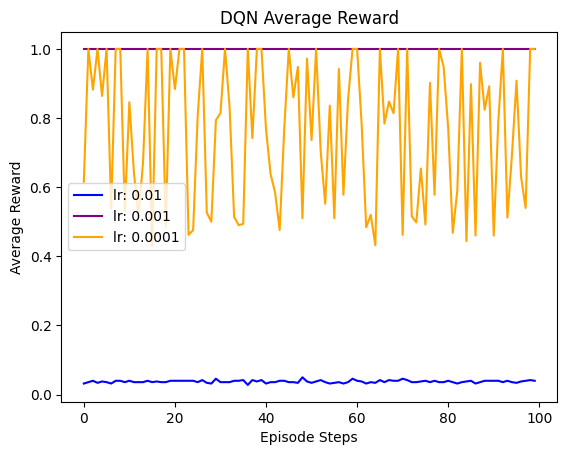

In [8]:
plt.title("DQN Average Reward")
# plt.plot(total_rewards_0_0, color = "red", label = f"lr: {learning_rate[0]}; iterations: {iterations[0]}")
plt.plot(total_rewards_0_1, color = "blue", label = f"lr: {learning_rate[0]}")
# plt.plot(total_rewards_1_0, color = "green", label = f"lr: {learning_rate[1]}; iterations: {iterations[0]}")
plt.plot(total_rewards_1_1, color = "purple", label = f"lr: {learning_rate[1]}")
# plt.plot(total_rewards_2_0, color = "gold", label = f"lr: {learning_rate[2]}; iterations: {iterations[0]}")
plt.plot(total_rewards_2_1, color = "orange", label = f"lr: {learning_rate[2]}")
plt.legend()
plt.xlabel("Episode Steps")
plt.ylabel("Average Reward")
plt.savefig("dqn_average_reward.png")
plt.show()

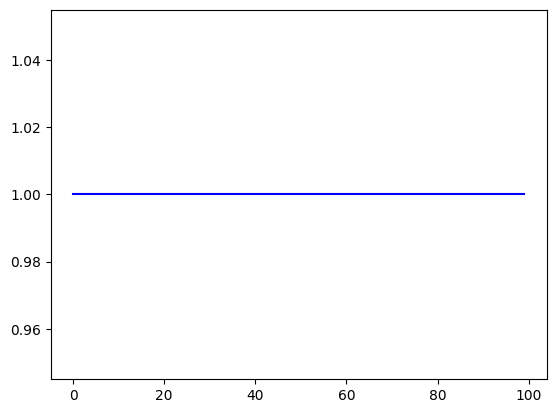

In [9]:
plt.plot(total_rewards_1_1, color = "blue")
plt.show()

In [12]:
def record_video(model = None, env = None, video_name = None):
    print("Recording a video...")
    video_frames = []
    obs, _ = env.reset()
    done = False

    while not done:
        frame = eval_env.render()
        video_frames.append(frame)
        action, _ = model.predict(obs, deterministic = True)
        obs, reward, done, truncated, info = env.step(action)
        if truncated:
            break

    env.close()

    # save the video
    os.makedirs("videos", exist_ok = True)
    video_path = os.path.join("videos", f"{video_name}.mp4")
    imageio.mimsave(video_path, video_frames, fps = 30)
    print(f"Video saved to {video_path}")


# record_video(model = DQN.load("dqn_0_0"), env = eval_env, video_name = "dqn_1e-1_100k")
record_video(model = DQN.load("dqn_0_1"), env = eval_env, video_name = "dqn_1e-1_200k")
# record_video(model = DQN.load("dqn_1_0"), env = eval_env, video_name = "dqn_1e-3_100k")
record_video(model = DQN.load("dqn_1_1"), env = eval_env, video_name = "dqn_1e-3_200k")
# record_video(model = DQN.load("dqn_2_0"), env = eval_env, video_name = "dqn_1e-5_100k")
record_video(model = DQN.load("dqn_2_1"), env = eval_env, video_name = "dqn_1e-5_200k")

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Recording a video...


[swscaler @ 0x6d94f00] Warning: data is not aligned! This can lead to a speed loss


Video saved to videos/dqn_1e-1_200k.mp4
Recording a video...


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x698ff00] Warning: data is not aligned! This can lead to a speed loss


Video saved to videos/dqn_1e-3_200k.mp4
Recording a video...


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x5671f00] Warning: data is not aligned! This can lead to a speed loss


Video saved to videos/dqn_1e-5_200k.mp4


In [11]:
file = open("times.txt", "w")
# file.write(str(time_0_0) + "\n")
file.write(str(time_0_1) + "\n")
# file.write(str(time_1_0) + "\n")
file.write(str(time_1_1) + "\n")
# file.write(str(time_2_0) + "\n")
file.write(str(time_2_1) + "\n")
file.close()

NameError: name 'time_1_1' is not defined